 <p style="font-size:32px;text-align:center"> <b> In-vehicle coupon recommendation </b> </p>    

# 1 Problem statement : 
This data was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the  person whether he will accept the coupon if he is the driver

# 2 Performance Metric

Primary Metric(s): 
* F1 SCORE(Tells about the predoctive power of the model with the combination of  recall and precision)
* ROC-AUC (How well our model is able to differentiate between the classes)

Secondary  Metric
* Log Loss(Tells  how close the prediction probability is to the corresponding actual/true value)

# 3 Constraints

*  Very good interpretablity
*  Very good performance on test data with low latencey

#  4 Train and Test Construction 
Build train and test by randomly splitting in the ratio of 75:25 as we don't have a lot of data  </p>

# =^=^=^=^=^=^=^=^=^=^=^=^=^=^=^=^=^=^=^=^=^=^=^=^=^=^=^=^=^=^

#  Exploratory Data Analysis 

In [1]:
import pandas as pd
import numpy as np

import missingno 
#Missingno is an excellent and simple to use Python library that provides a series of visualisations
#to understand the presence and distribution of missing data within a pandas dataframe.
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt


import seaborn as sns
sns.set_style("darkgrid")


In [2]:
data = pd.read_csv('in-vehicle-coupon-recommendation.csv')

In [3]:
data.head()

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8              1~3   
2        never       NaN                  4~8              1~3   
3        never       NaN                  4~8              1~3   
4        never       NaN                  4~8              1~3   

  toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                1                 0                 0              0   
1                1                 0                 0              0   
2                1                 1                 0              0   
3                1                 1                 0              0   
4                1                 1                 0              0   

  direction_opp  Y  
0             1  1  
1             1  0  
2             1  1  
3             1  0  
4             1  0  

[5 rows x 26 columns]

In [4]:
data.describe()

temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12684.000000  12684.000000           12684.0       12684.000000   
mean      63.301798      0.414144               1.0           0.561495   
std       19.154486      0.492593               0.0           0.496224   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  
count       12684.000000    12684.000000   12684.000000  12684.000000  
mean            0.119126        0.214759       0.785241      0.568433  
std             0.323950        0.410671       0.410671      0.495314  
min             0.000000        0.000000       0.000000      0.000000  
25%             0.000000        0.000000       1.000000      0.000000  
50%             0.000000        0.000000       1.000000      1.000000  
75%             0.000000        0.000000       1.000000      1.000000  
max             1.000000        1.000000       1.000000      1.000000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [6]:
print('There are total {} samples with {} attributes '.format(data.shape[0],data.shape[1]))

There are total 12684 samples with 26 attributes 


In [7]:
object_type = []
category_count = 0
int_type = []
features = data.columns
max_cardinality_feature = 0
max_cardinality=-1
for feature in features:
    category_count = category_count + data[feature].nunique()
    if data[feature].nunique()>max_cardinality:
        max_cardinality = data[feature].nunique()
        max_cardinality_feature = feature
    print('Feature --> {} has {} catgories .\nCategories with value count of each are --> \n{}'.format(feature,data[feature].nunique(),data[feature].value_counts()))
    if data[feature].dtype=='O':
        object_type.append(feature)
    else:
        int_type.append(feature)
        
    print('\n')
    print('==*=='*10)
    print('\n')
    
print('{} is the feature with max cardinality having {} features'.format(max_cardinality_feature,max_cardinality))

Feature --> destination has 3 catgories .
Categories with value count of each are --> 
No Urgent Place    6283
Home               3237
Work               3164
Name: destination, dtype: int64


==*====*====*====*====*====*====*====*====*====*==


Feature --> passanger has 4 catgories .
Categories with value count of each are --> 
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: passanger, dtype: int64


==*====*====*====*====*====*====*====*====*====*==


Feature --> weather has 3 catgories .
Categories with value count of each are --> 
Sunny    10069
Snowy     1405
Rainy     1210
Name: weather, dtype: int64


==*====*====*====*====*====*====*====*====*====*==


Feature --> temperature has 3 catgories .
Categories with value count of each are --> 
80    6528
55    3840
30    2316
Name: temperature, dtype: int64


==*====*====*====*====*====*====*====*====*====*==


Feature --> time has 5 catgories .
Categories with value count of each are --> 
6PM     3230
7

In [8]:
print('Total number of categories is ', category_count)
print('\n')
print('There are {} integer type attributrs (including the target attribute) .'.format(len(int_type)))
print('Interger type attributes (including the target attribute) are -----> ')
print(*int_type,sep = ',')
print('\n')
print('There are {} Object/string type attributes .'.format(len(int_type)))
print('Object/string type attributes  are ---> ')
print(*object_type,sep = ',')


Total number of categories is  123


There are 8 integer type attributrs (including the target attribute) .
Interger type attributes (including the target attribute) are -----> 
temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y


There are 8 Object/string type attributes .
Object/string type attributes  are ---> 
destination,passanger,weather,time,coupon,expiration,gender,age,maritalStatus,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50


#### 1.1 Checking For Missing Values

In [9]:
features = data.columns
vals = [val for val in data.isna().sum()/len(data)*100]
count = [val for val in data.isna().sum()]
df = pd.DataFrame(data = list(zip(features,count,vals)),columns=['feature','Count','Missing value percentage'])
df[df.Count!=0]

feature  Count  Missing value percentage
14                   car  12576                 99.148534
15                   Bar    107                  0.843582
16           CoffeeHouse    217                  1.710817
17             CarryAway    151                  1.190476
18  RestaurantLessThan20    130                  1.024913
19      Restaurant20To50    189                  1.490066

1. Only 6 columns has missing values and out of those 6, 5 has alomst 1 % (12576 out of 12684)of mssing values
2. For car columns more than 99 percent of the values are missing (Better to remove this attribute)
3. Columns 
    - Bar (107 out of 12684)
    - CoffeeHouse (217 out of 12684)
    - CarryAway (151 out of 12684)
    - RestaurantLessThan20 (130 out of 12684)
    - Restaurant20To50 (189 out of 12684)
    #### has missing values around only 1%. We can use simple imputation techniques to fill the missing values

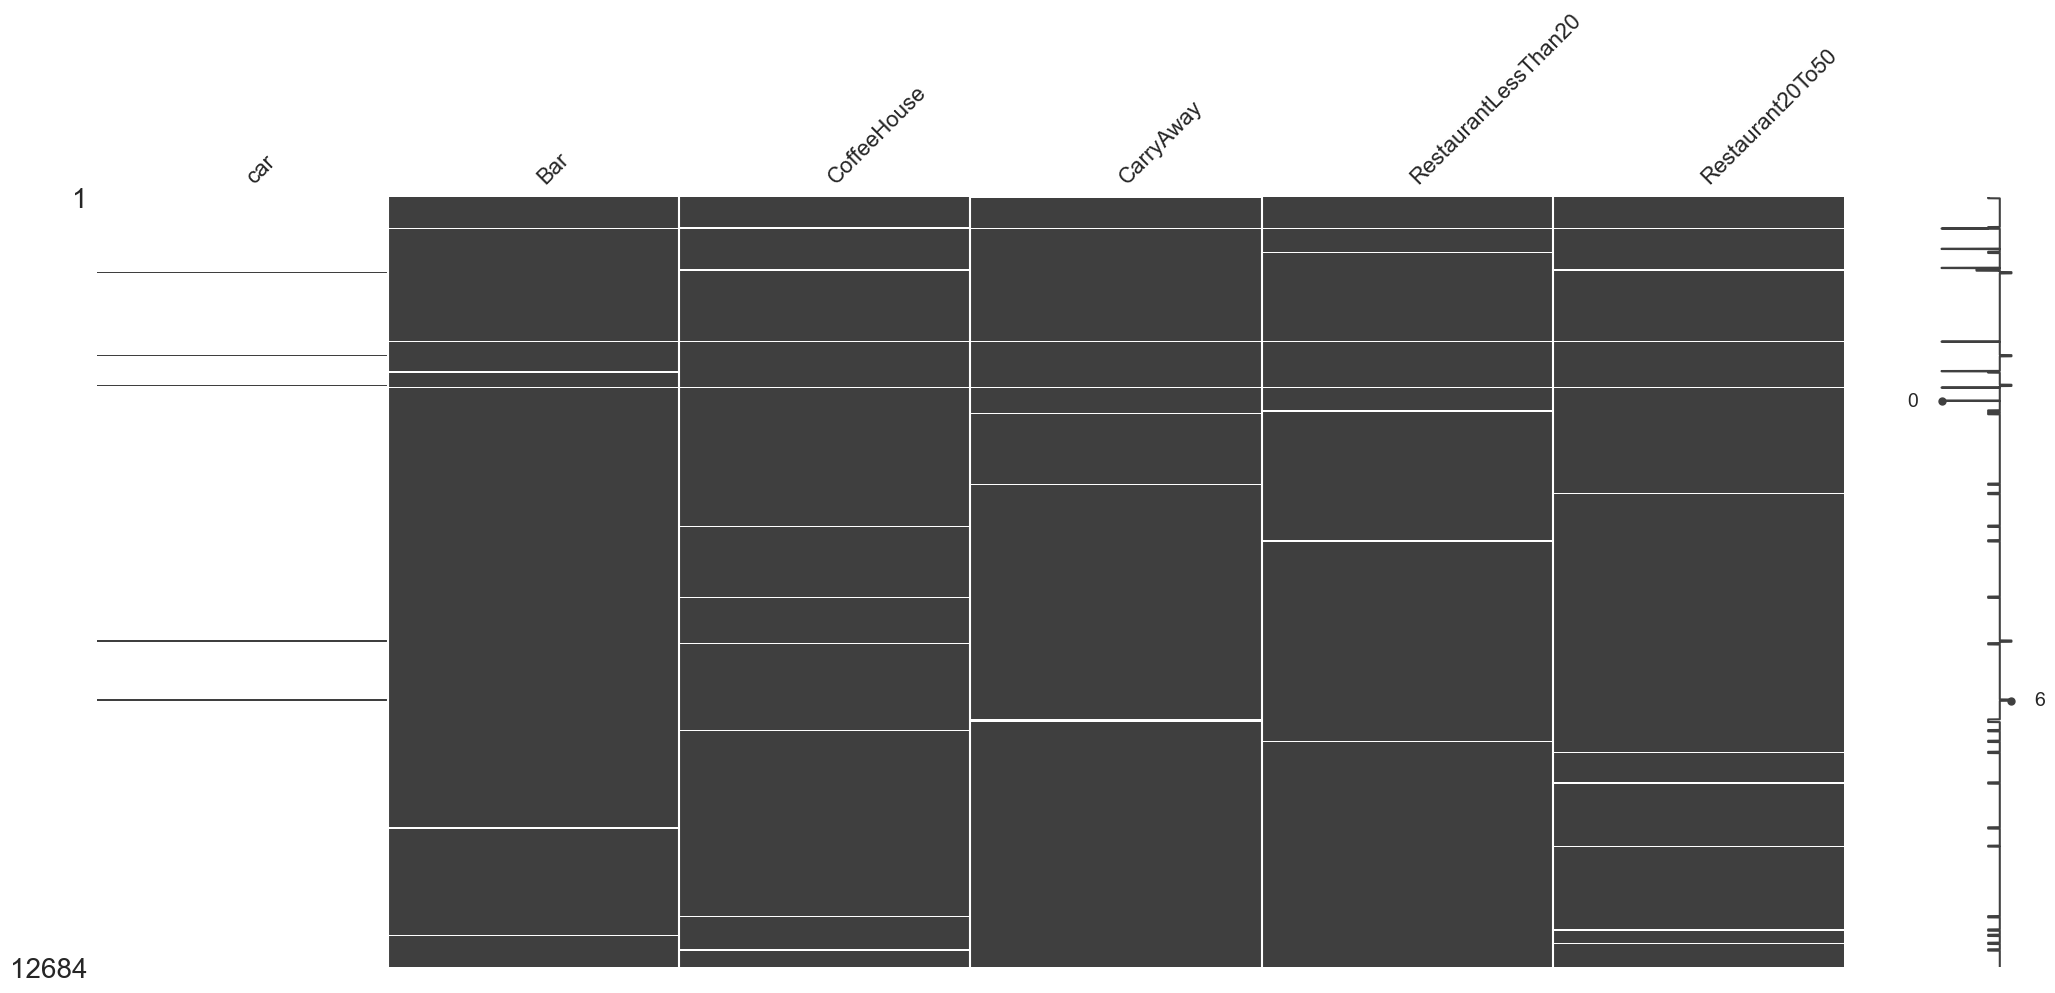

In [10]:
missingno.matrix(data[['car','Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']])
plt.show()

This plot shows the distribution of the missing data in the dataframe. The right side of the plot is a sparkline that ranges from 0 on the left to the total number of columns in the dataframe on the right. A closeup can be seen above. When a row has a value in each column, the line will be at the maximum right position. As missing values start to increase within that row the line will move towards the left

In [11]:
# inspecting car columns specifically
print(data['car'].value_counts())
print('\n')
print('Car column has ',data['car'].isna().sum(),'missing values out of ',len(data))


Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64


Car column has  12576 missing values out of  12684


1. Since there are a lots of missing values for car feature we can either completely remvov it fill it with 'Missing' value and use it as a feature 
2. We create 2 sets of data and keep the on better performance
     - car feature removed (data)
     - car feature value filled with 'Missing' value (data2)

In [12]:
data_2 = data.copy(deep = True)
data.drop(labels=['car'],axis=1,inplace=True)

#### 1.2 Imputation

In [13]:
def fill_most_freq(data,columns):
    ''' fills missing values by the modt frequent value in the column '''
    for col in columns:
        value = data[col].value_counts().index[0]
        data[col] = data[col].fillna(value)

In [14]:
#filling missing car column value with "missing"
data_2.car.fillna('Misssing',inplace = True)

In [15]:
#filling the values for the rest of the columns for both datasets
fill_most_freq(data,['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50'])
fill_most_freq(data_2,['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50'])

In [16]:
#chacking if theres any missing value now after imputation
data.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [17]:
#chacking if theres any missing value now after imputation for data_2
data_2.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

#### 1.3 Checking for duplicates

In [18]:
print('There are {} duplicate rows in the dataset'.format(data.duplicated().sum()))
print('Number of samples before removing duplicates -->',data.shape[0])

There are 74 duplicate rows in the dataset
Number of samples before removing duplicates --> 12684


In [19]:
data.drop_duplicates(keep='last',inplace=True)
data_2.drop_duplicates(keep='last',inplace=True)
print('Number of samples after removing duplicates -->',data.shape[0])
print('Number of samples after removing duplicates -->',data_2.shape[0])


Number of samples after removing duplicates --> 12610
Number of samples after removing duplicates --> 12610


### 2 Correlation

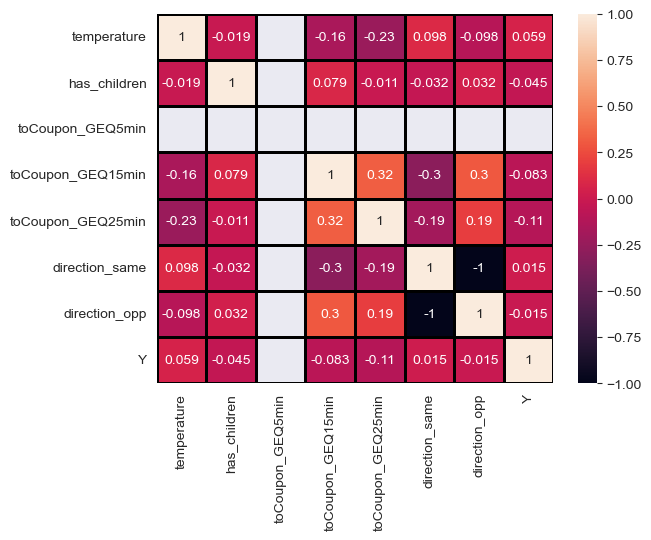

In [20]:
#checking for correlation between the features
data.corr()

sns.heatmap(data.corr(),annot = True,linecolor='black',linewidths=2)
plt.show()

- features 'direction_same' and 'direction_opp' are fully negatively correlated to each other that means they have opposite values which is confirmed by there names and values also. One of these two should be removed
- feature 'toCoupon_GEQ5min' don't have any correlatio value because it has only one value (1). We will not remove it as this feature can be combined with features 'toCoupon_GEQ15min' and 'toCoupon_GEQ25min' to form a single feature


In [21]:
#dropping 'direction_same ' from both data and data_2
data.drop('direction_same',inplace = True,axis = 1)
data_2.drop('direction_same',inplace = True,axis = 1)

In [22]:
def get_ordinal(columns_list):
    arr = data[columns_list].to_numpy()
    ordinal_list = []
    for line in arr:
        if line[0]==1 and line[1]==0 and line[2]==0:  # if only 5 min drive
            ordinal_list.append(0)
        elif line[0]==1 and line[1]==1 and line[2]==0:  # if 15 min drive
            ordinal_list.append(1)
        else:
            ordinal_list.append(2)                             # if 25 min drive
    return ordinal_list

In [23]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_opp', 'Y'],
      dtype='object')

#  **Univariate And Distribution Analysis**

In [24]:
def univar_analysis(feature,fontsize1 = 10,fontsize2 = 9,labelrotation = 45,data = data):
    '''Returns 2 subplots for a feature with one having count plot of each category and second having count plot wrt y'''
    fig,ax  = plt.subplots(1,2,figsize = (10,7))
    ax = ax.flatten()
    countplot = sns.countplot(data = data,x = data[feature],ax = ax[0],hatch = '/',ec = 'pink')
    for patch in countplot.patches:
        countplot.annotate(patch.get_height(),(patch.get_x(),patch.get_height()),fontsize = fontsize1)
    ax[0].set_title('Count of each category  of {}'.format(feature))
    ax[0].tick_params(axis='x', labelrotation=labelrotation)

    countplot = sns.countplot(data = data,x = data[feature],ax = ax[1],hue = 'Y',hatch = '/',ec = 'pink')
    for patch in countplot.patches:
        countplot.annotate(patch.get_height(),(patch.get_x()+0.02,patch.get_height()+1),fontsize = fontsize2)
    ax[1].set_title('Count of each category of {} w.r.t. Y'.format(feature))
    ax[1].tick_params(axis='x', labelrotation=labelrotation)
    plt.subplots_adjust(right=1.5)
    plt.show()
    
    temp = pd.DataFrame(sorted(list(data[feature].unique())),columns=[feature])
    temp['Total_Count'] = list(data.groupby(feature).Y.count())
    Accepted = list(data[data.Y==1].groupby(feature).Y.count())
    Rejected = list(data[data.Y==0].groupby(feature).Y.count())
    temp['Acceptance rate'] = round(Accepted/temp['Total_Count']*100,3) 
    temp['Rejection rate'] = round(Rejected/temp['Total_Count']*100,3)
    return  temp

##### 1. Y Attribute (Dependent varibale)

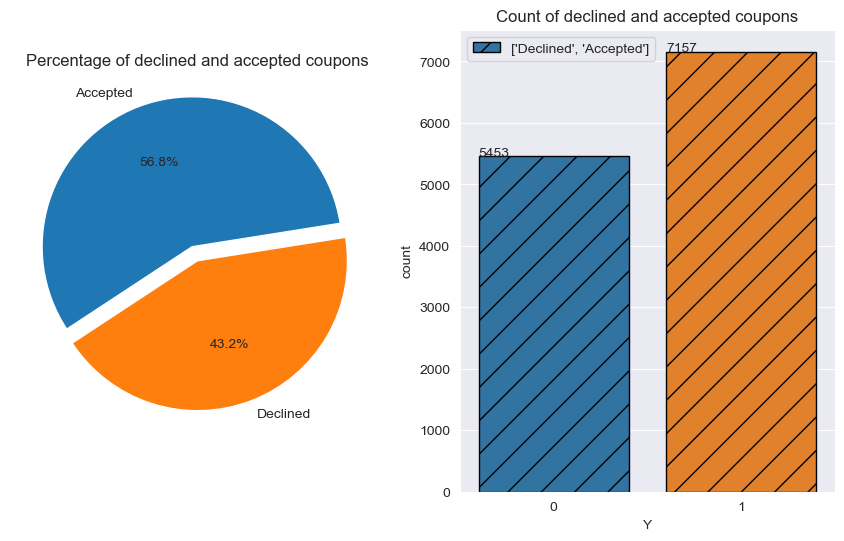

In [25]:
fig,ax = plt.subplots(ncols=2,nrows=1,figsize = (6,6))
ax = ax.flatten()

#pie chart
labels = ['Accepted','Declined']
vals = [data[data.Y==1]['Y'].sum(), len(data[data.Y==0]['Y'])]
ax[0].pie( vals,labels = labels, startangle=9, autopct='%1.1f%%',explode =( 0.1,0))
ax[0].set_title('Percentage of declined and accepted coupons')

#count plot
ax[1].set_title('Count of declined and accepted coupons')
plot = sns.countplot(x = data['Y'],ax = ax[1],label = ['Declined','Accepted'],hatch = '/',ec = 'black')
plot.set_label(['Declined','Accpeted'])
plot.legend()
for patch in plot.patches:
    plot.annotate(patch.get_height(),(patch.get_x(),patch.get_height()+3))
plt.subplots_adjust(right=1.5)
plt.show()

#### 2 Passanger

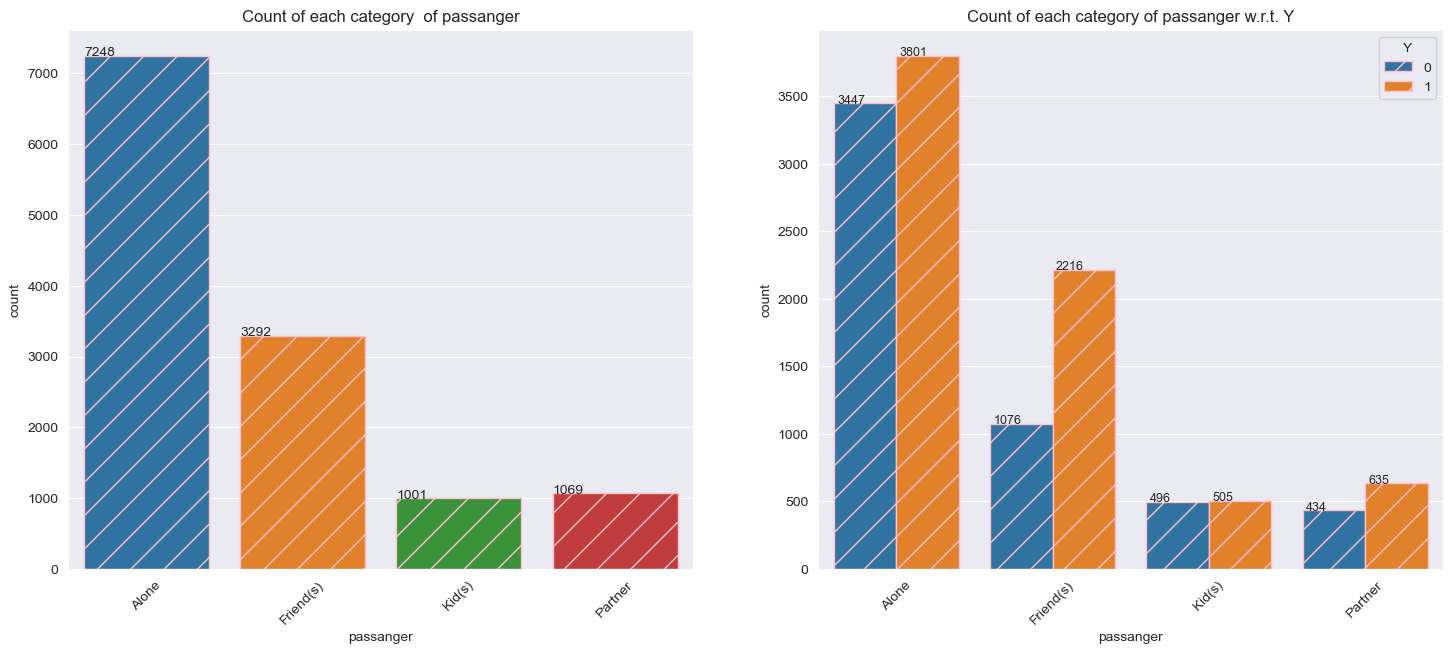

passanger  Total_Count  Acceptance rate  Rejection rate
0      Alone         7248           52.442          47.558
1  Friend(s)         3292           67.315          32.685
2     Kid(s)         1001           50.450          49.550
3    Partner         1069           59.401          40.599

In [26]:
univar_analysis('passanger')

- When with friends there is good chance of coupon getting accepted when comapred to being anone,with partner or kids
- Most drivers were going outside alone

#### 3 Destination

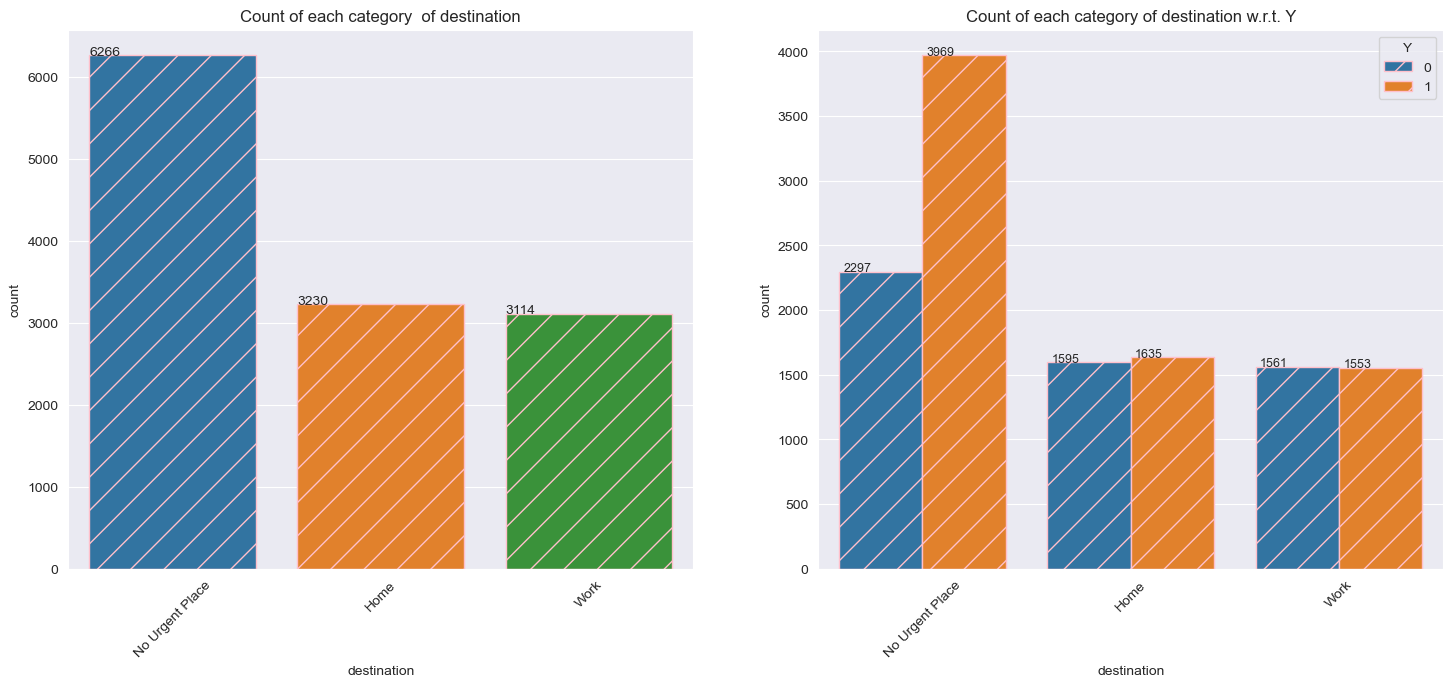

destination  Total_Count  Acceptance rate  Rejection rate
0             Home         3230           50.619          49.381
1  No Urgent Place         6266           63.342          36.658
2             Work         3114           49.872          50.128

In [27]:
univar_analysis('destination')

- Most of the drivers were going to 'no urgent place'
- 'no urgent place' destination has the highest acceptance rate almost 63% which means the driver is most likely to accept the coupon when he/she is free or the driver has the time to go to the shop
-  destinations 'Home' and 'Work' has similar sort of acceptance rates 50.61% and 49.87% respectively 

#### 4 Weather

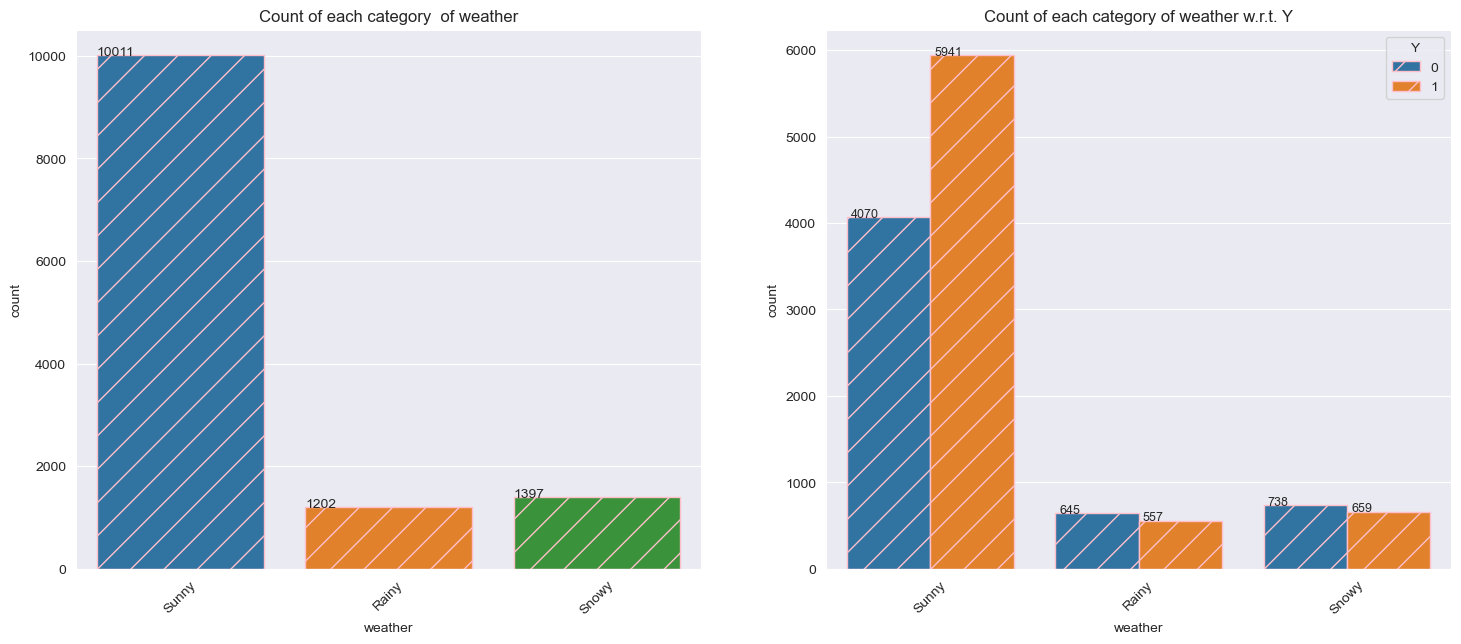

weather  Total_Count  Acceptance rate  Rejection rate
0   Rainy         1202           46.339          53.661
1   Snowy         1397           47.173          52.827
2   Sunny        10011           59.345          40.655

In [28]:
univar_analysis('weather')

- The driver will accept the coupon(almost 60%) more often if the weather is clear outside and not raining or snowing outside
- Bad weather affects the couon acceptance rate significantly

#### 5 Temperature

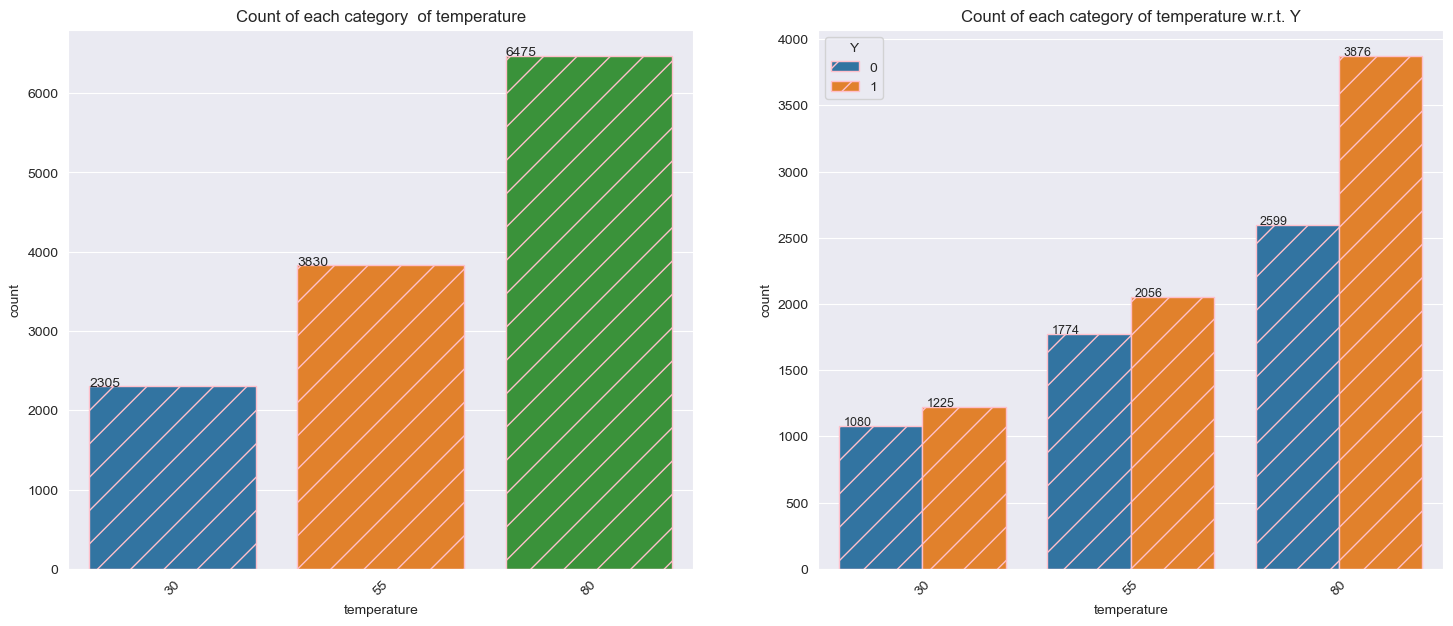

temperature  Total_Count  Acceptance rate  Rejection rate
0           30         2305           53.145          46.855
1           55         3830           53.681          46.319
2           80         6475           59.861          40.139

In [29]:
univar_analysis('temperature')

For referece 80 F = 26 C , 55 F = 12.7 C ,30 F = -1.11 C 
- The driver is more likely to accept the coupon if the temperature is on the warmer side .


#### 6 Time

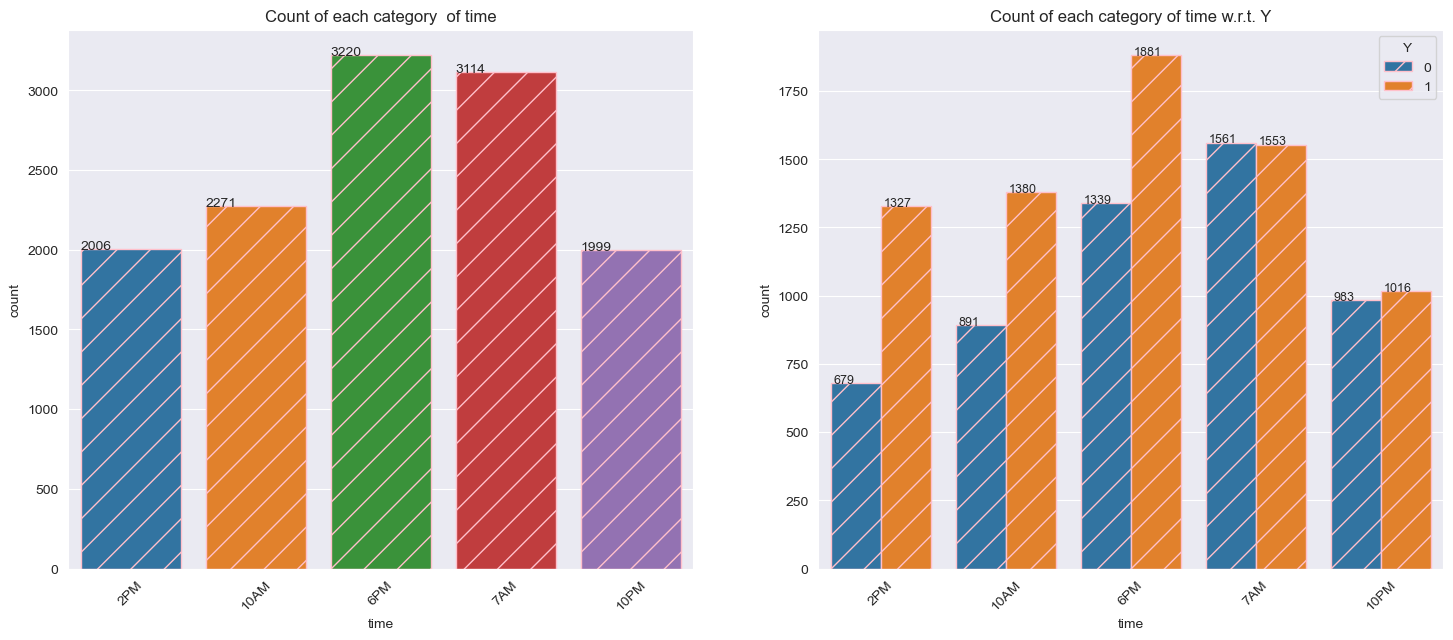

time  Total_Count  Acceptance rate  Rejection rate
0  10AM         2271           60.766          39.234
1  10PM         1999           50.825          49.175
2   2PM         2006           66.152          33.848
3   6PM         3220           58.416          41.584
4   7AM         3114           49.872          50.128

In [30]:
univar_analysis('time')

- 6 PM , 2 PM and 7 AM  has the heighsest  acceptance rate it might be the case because
    1. 7 AM people go to office/school/work
    2. 2 PM - Lunch time
    3. 6 PM  - people coming back from office/worf

#### 7 Coupon

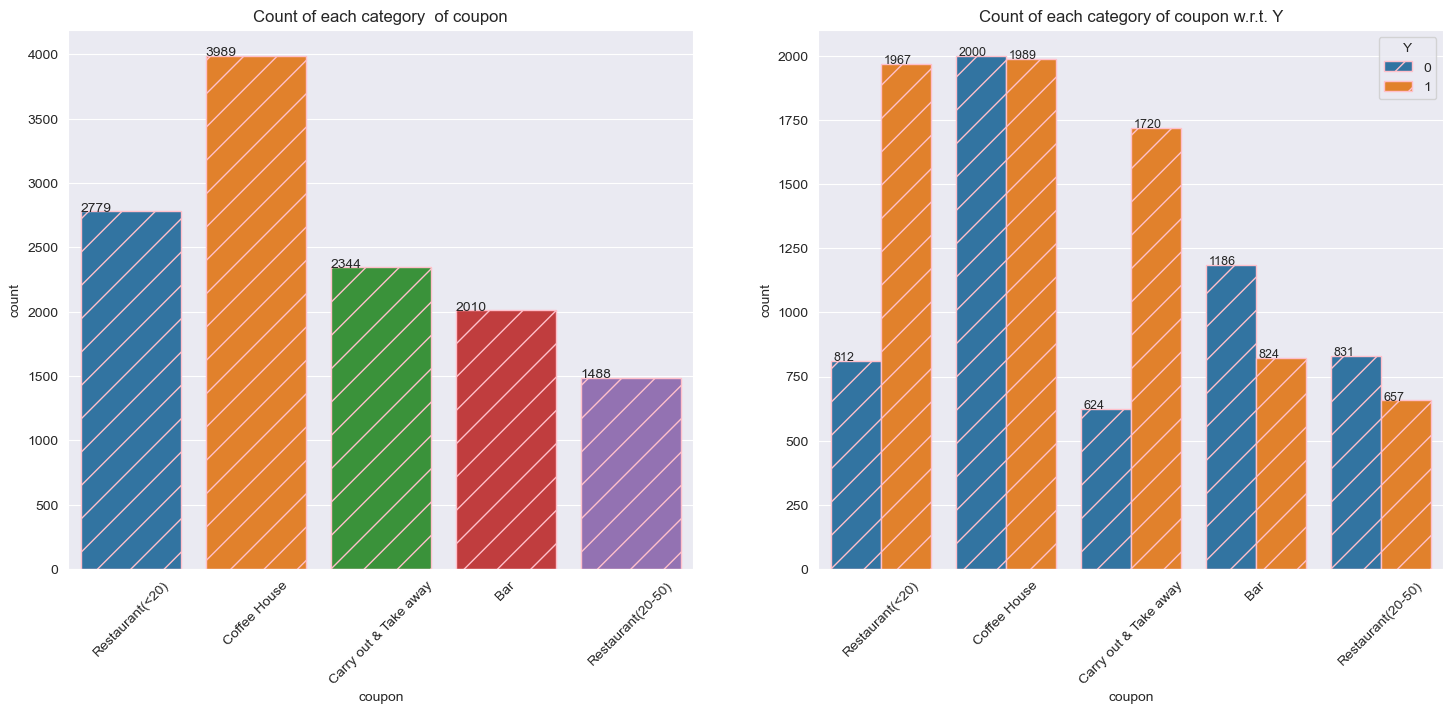

coupon  Total_Count  Acceptance rate  Rejection rate
0                    Bar         2010           40.995          59.005
1  Carry out & Take away         2344           73.379          26.621
2           Coffee House         3989           49.862          50.138
3      Restaurant(20-50)         1488           44.153          55.847
4        Restaurant(<20)         2779           70.781          29.219

In [31]:
univar_analysis('coupon')

- Coupons like 'Restaurant(<20)' and 'Carry out & Take away' has the best acceptance rate 70.78% and 73.37.
- People are more inclined to accept the coupon if driving distance/time is less 
- People like to take away the coupons because then they can eat the items in the comfort of their house
- 'Bar' coupons are the worst-performing ones having an acceptance rate of only 40.995%. It might be the case because they don't want to drink and then drive

#### 8 Expiration

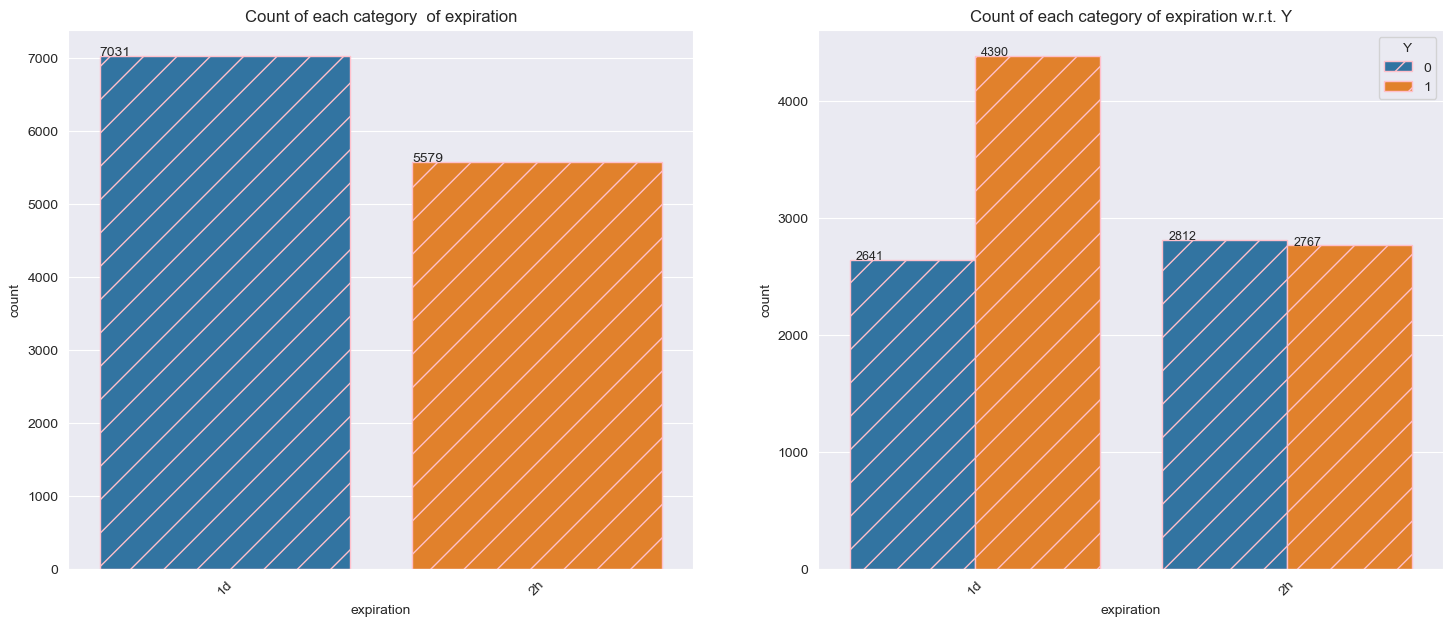

expiration  Total_Count  Acceptance rate  Rejection rate
0         1d         7031           62.438          37.562
1         2h         5579           49.597          50.403

In [32]:
univar_analysis('expiration')

- coupons with 2h expiry period dont perform very well as there is very less time for the driver
- Coupons with expiry period of 1d perform well(62.4% accepatnce percentage) as the driver has 24hrs to use the coupon

#### 9 Gender

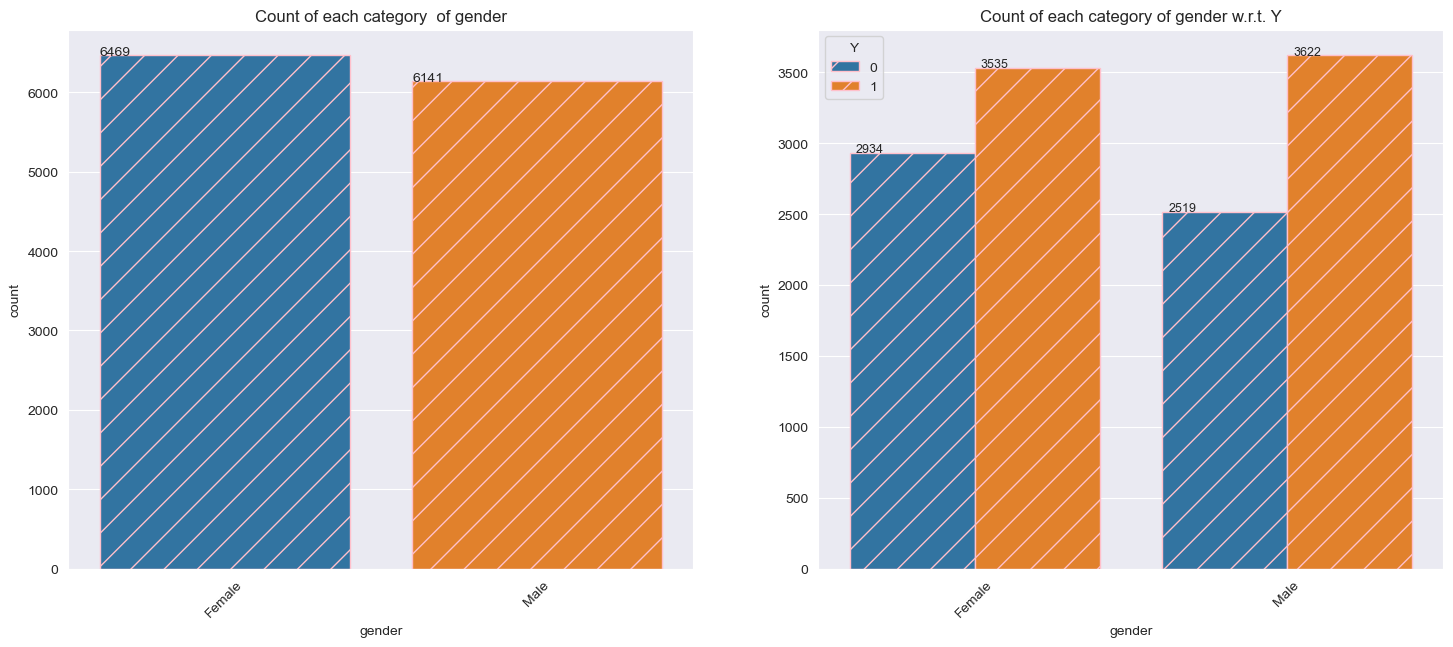

gender  Total_Count  Acceptance rate  Rejection rate
0  Female         6469           54.645          45.355
1    Male         6141           58.981          41.019

In [33]:
univar_analysis('gender')

- Both genders demonstrate nearly identical behaviour, but males are more inclined to take the coupon.


#### 10 Age

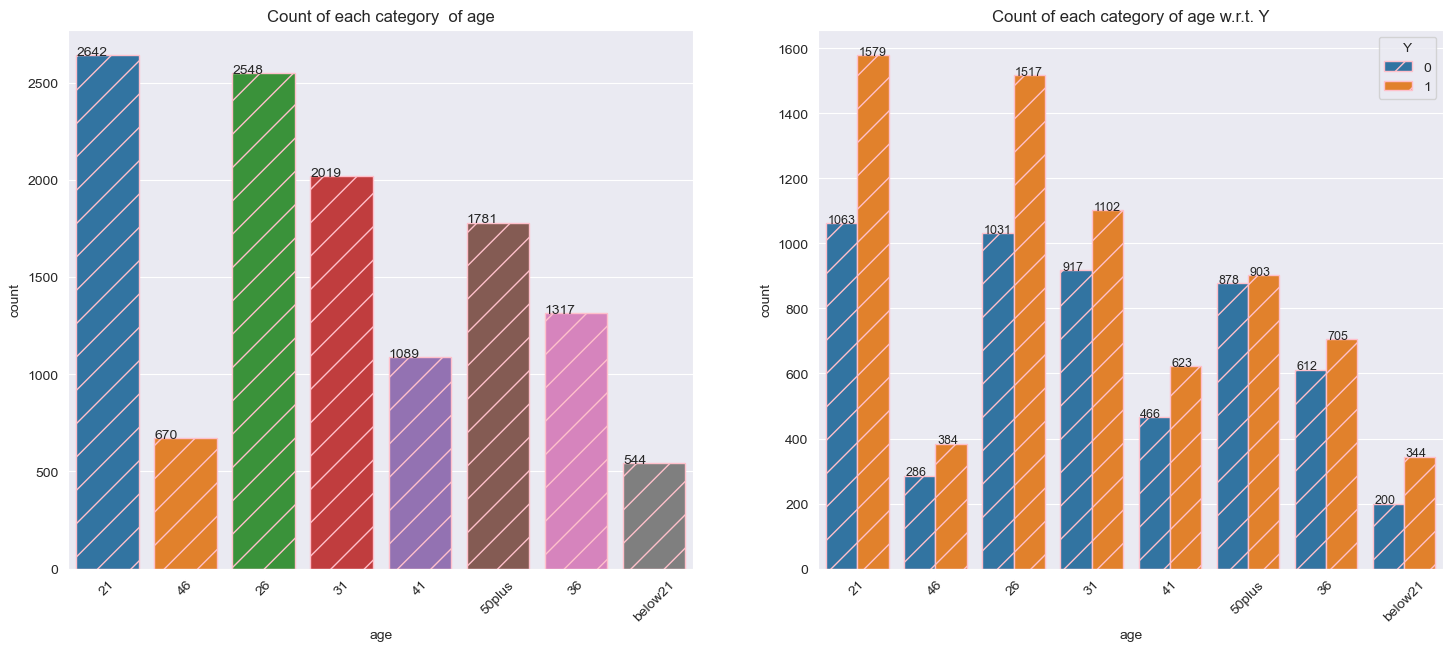

age  Total_Count  Acceptance rate  Rejection rate
0       21         2642           59.765          40.235
1       26         2548           59.537          40.463
2       31         2019           54.581          45.419
3       36         1317           53.531          46.469
4       41         1089           57.208          42.792
5       46          670           57.313          42.687
6   50plus         1781           50.702          49.298
7  below21          544           63.235          36.765

In [34]:
univar_analysis('age')

In [35]:
print('Acceptance rate of people between 21-26 age ',(1579+1517)/(2642+2548)*100,'%')

Acceptance rate of people between 21-26 age  59.65317919075145 %


- people of age 'below21' has the best acceptance rate(63.2%) 
- '50plus' has the worst acceptance rate(50.7%). It might be because they cook at home or try to save money
- Overall, people between 21-26 age has the best acceptance rate if we consider the total number of samples!

#### 11 Marital Status

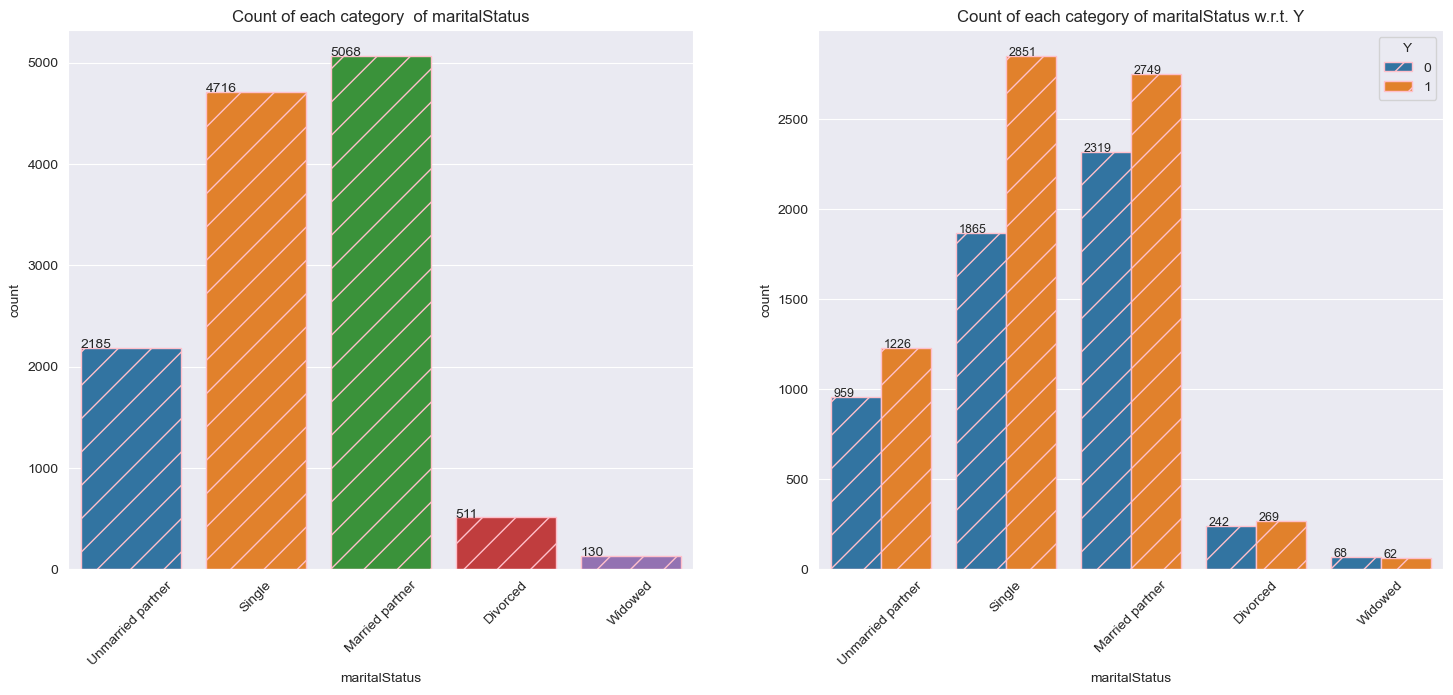

maritalStatus  Total_Count  Acceptance rate  Rejection rate
0           Divorced          511           52.642          47.358
1    Married partner         5068           54.242          45.758
2             Single         4716           60.454          39.546
3  Unmarried partner         2185           56.110          43.890
4            Widowed          130           47.692          52.308

In [36]:
univar_analysis('maritalStatus')

- Single drivers accept more coupons than the couples
- Most of the drivers were single or married

#### 12 Has_Children

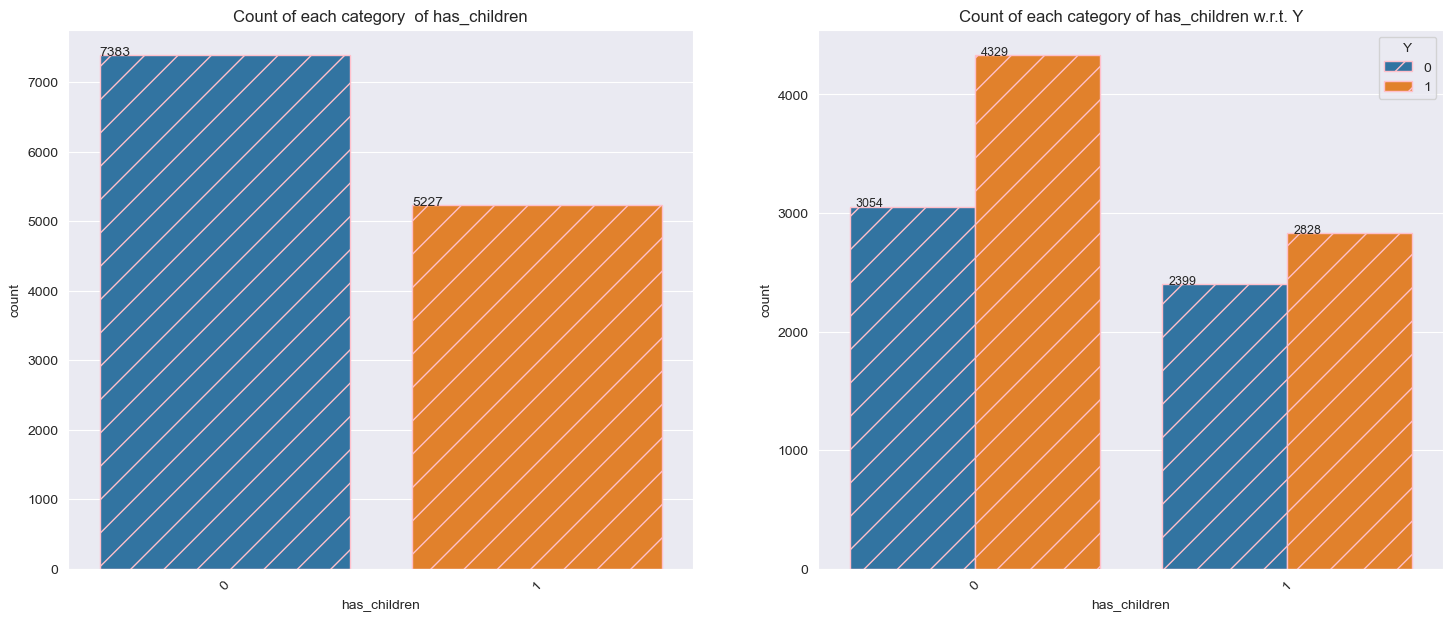

has_children  Total_Count  Acceptance rate  Rejection rate
0             0         7383           58.635          41.365
1             1         5227           54.104          45.896

In [37]:
univar_analysis('has_children')

- Drivers who don't have any children accept more coupons

#### 13 Education

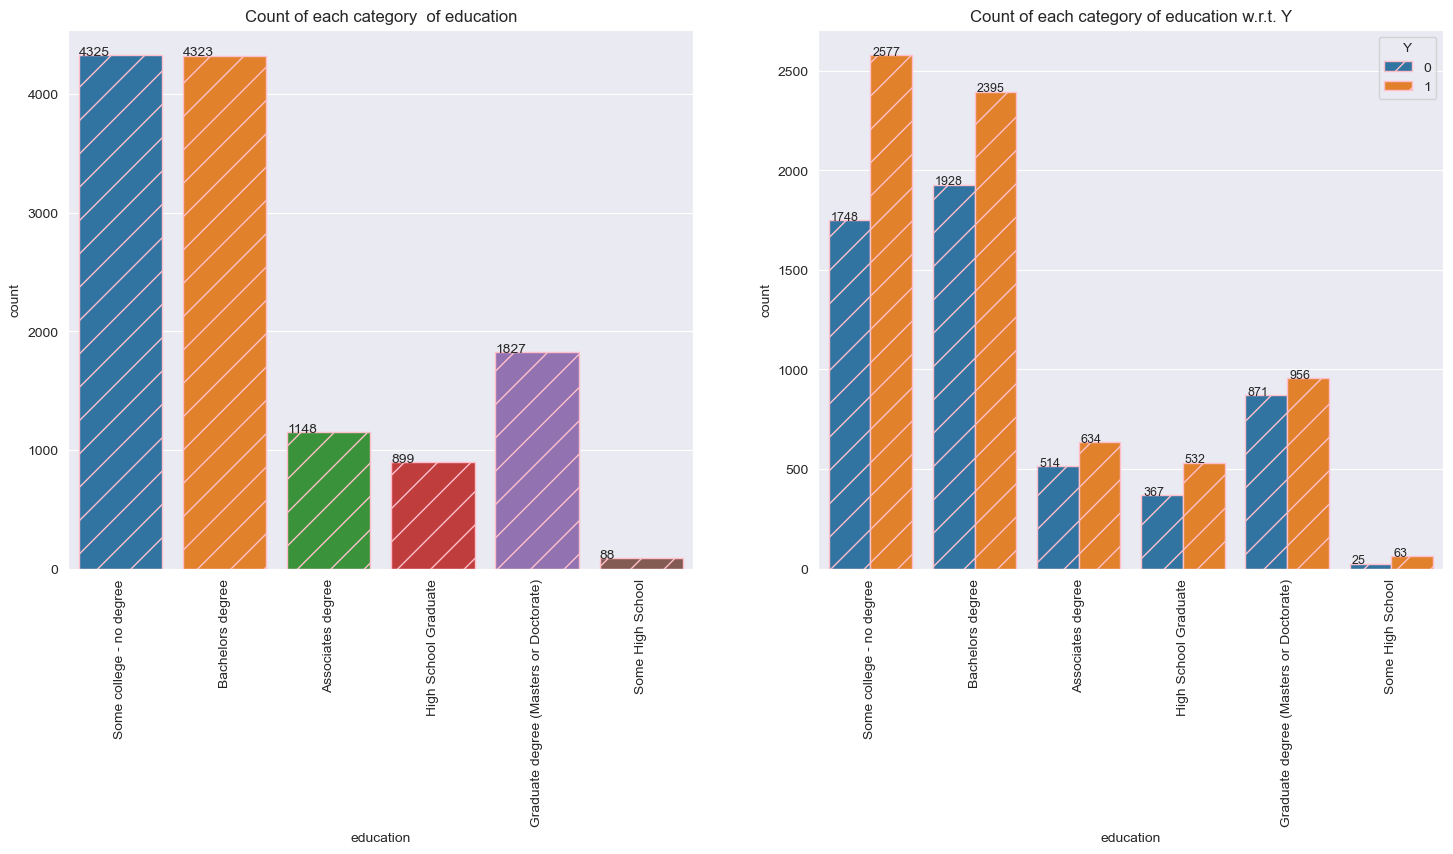

education  Total_Count  Acceptance rate  \
0                       Associates degree         1148           55.226   
1                        Bachelors degree         4323           55.401   
2  Graduate degree (Masters or Doctorate)         1827           52.326   
3                    High School Graduate          899           59.177   
4                        Some High School           88           71.591   
5                Some college - no degree         4325           59.584   

   Rejection rate  
0          44.774  
1          44.599  
2          47.674  
3          40.823  
4          28.409  
5          40.416

In [38]:
univar_analysis('education',labelrotation=90)

- Most of the drivers had an education level of 'Some college - no degree' or 'Bachelors degree'
- 'Some High School'  has the best acceptance rate, 71.5%. 
- 'Graduate degree (Masters or Doctorate)' holders has the lowest acceptance rate(52.3%)

#### 14 Income

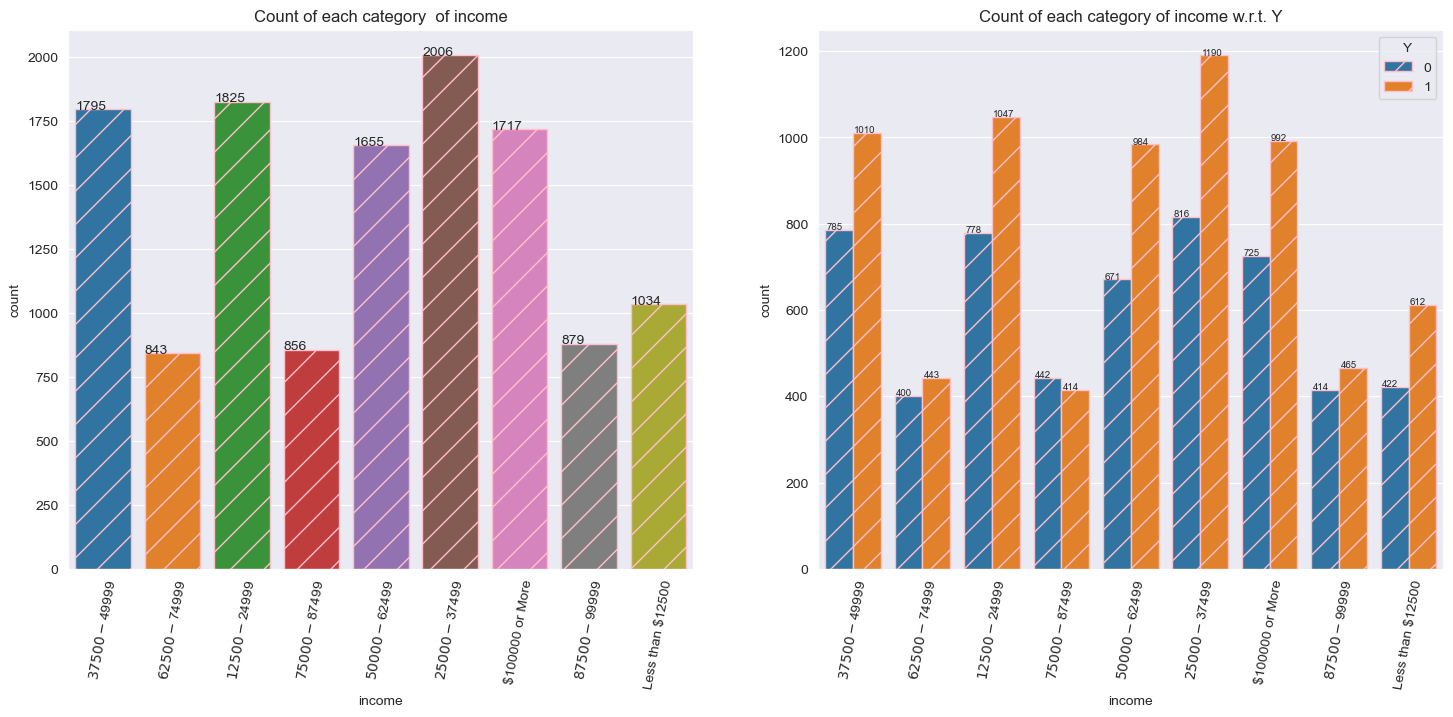

income  Total_Count  Acceptance rate  Rejection rate
0   $100000 or More         1717           57.775          42.225
1   $12500 - $24999         1825           57.370          42.630
2   $25000 - $37499         2006           59.322          40.678
3   $37500 - $49999         1795           56.267          43.733
4   $50000 - $62499         1655           59.456          40.544
5   $62500 - $74999          843           52.550          47.450
6   $75000 - $87499          856           48.364          51.636
7   $87500 - $99999          879           52.901          47.099
8  Less than $12500         1034           59.188          40.812

In [39]:
univar_analysis('income',labelrotation=80,fontsize2=7)

- Drivers with income between, $75000−$87499 have the lowest acceptance rate
- There is no clear trend that higher income has a higher acceptance rate
- people with income 'Less than $12500' and '$25000− $37499' have the highest acceptance rate

#### 15 Bar

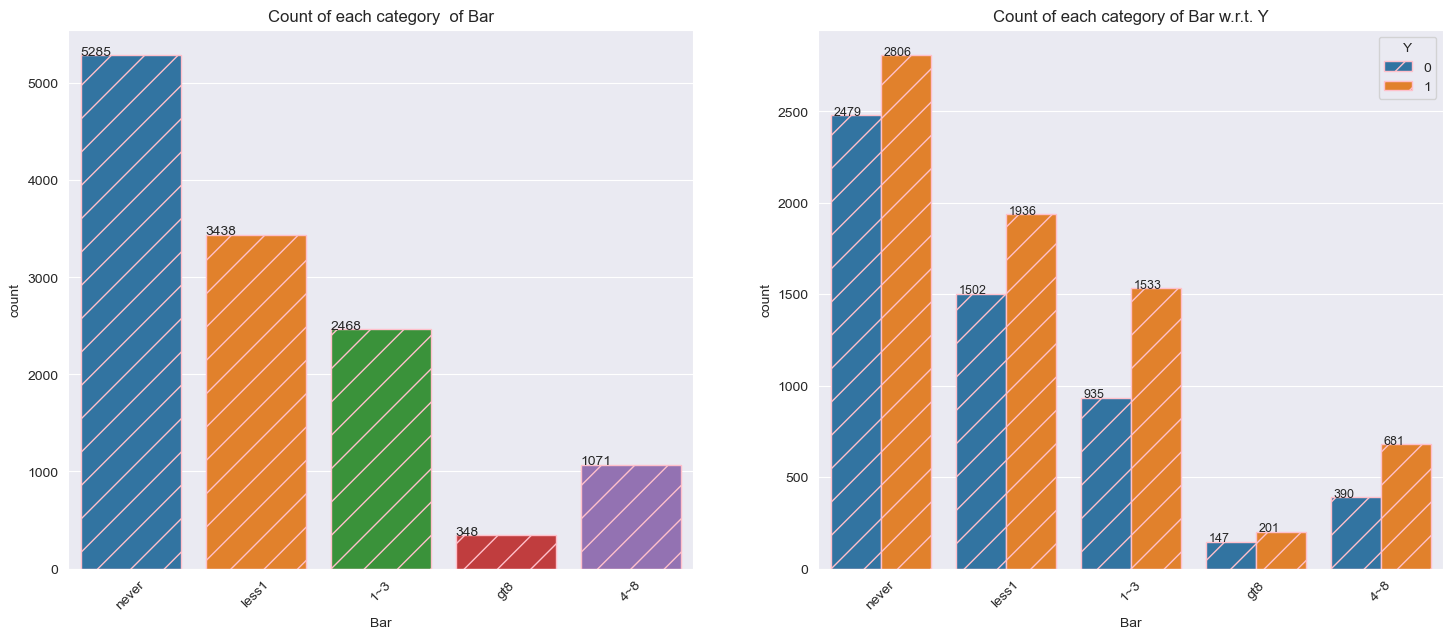

Bar  Total_Count  Acceptance rate  Rejection rate
0    1~3         2468           62.115          37.885
1    4~8         1071           63.585          36.415
2    gt8          348           57.759          42.241
3  less1         3438           56.312          43.688
4  never         5285           53.094          46.906

In [40]:
univar_analysis('Bar')

- Most people have never visited the bar
- very few people visited the bar more than 8 times in a month
-  people visiting the bar 1~3,4~8 times in a month have the highest coupon acceptance rate

#### 16 CoffeeHouse

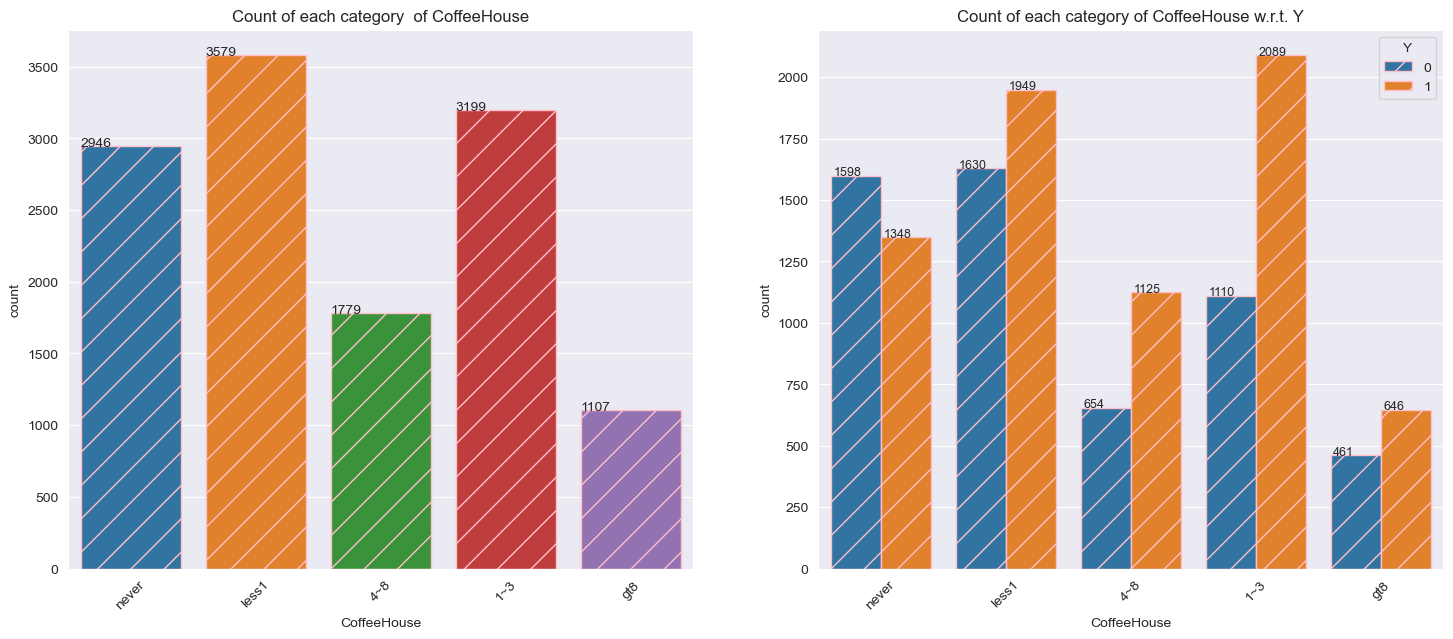

CoffeeHouse  Total_Count  Acceptance rate  Rejection rate
0         1~3         3199           65.302          34.698
1         4~8         1779           63.238          36.762
2         gt8         1107           58.356          41.644
3       less1         3579           54.457          45.543
4       never         2946           45.757          54.243

In [41]:
univar_analysis('CoffeeHouse')

- Most of the people visited the CoffeeHouse less than 1 time every month
- people going to the coffeehouse 1~3 and 4~8 times every month are more likely to accept the coupon

#### 17 CarryAway

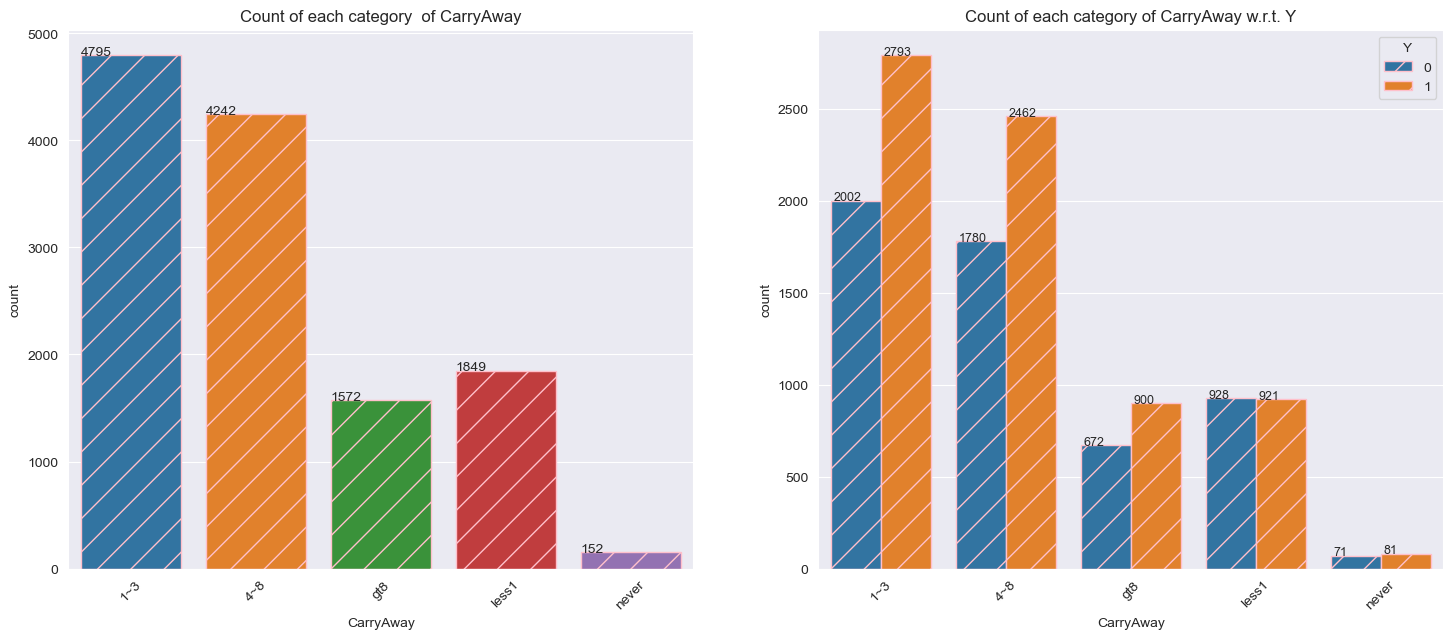

CarryAway  Total_Count  Acceptance rate  Rejection rate
0       1~3         4795           58.248          41.752
1       4~8         4242           58.039          41.961
2       gt8         1572           57.252          42.748
3     less1         1849           49.811          50.189
4     never          152           53.289          46.711

In [42]:
univar_analysis('CarryAway',fontsize2=9)

-  Taking Carry Away food seems to be normal as very few people (2001 out of, 12610) get takeaway food every month less than 1 time and never
- Majority of people go get CarryAway food 1~8 times per month

#### 18 RestaurantLessThan20

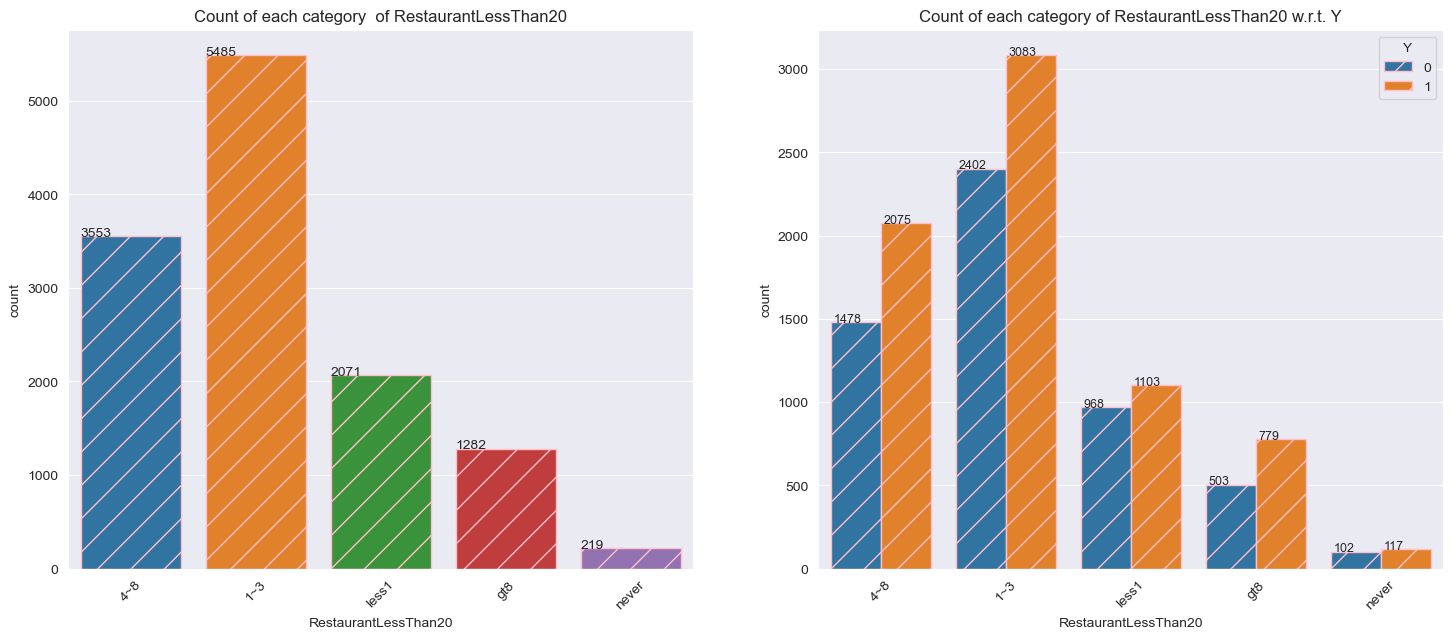

RestaurantLessThan20  Total_Count  Acceptance rate  Rejection rate
0                  1~3         5485           56.208          43.792
1                  4~8         3553           58.401          41.599
2                  gt8         1282           60.764          39.236
3                less1         2071           53.259          46.741
4                never          219           53.425          46.575

In [43]:
univar_analysis('RestaurantLessThan20',fontsize2=9)

- If the usual cost for an individual is around $20-$50 a month, then those who go to the restaurant more than 8 times tend to have a very high acceptance rate of coupons.
- People who visit Restaurant with average cost less than 20 frequently has good acceptance rate 

#### 19 Restaurant20To50

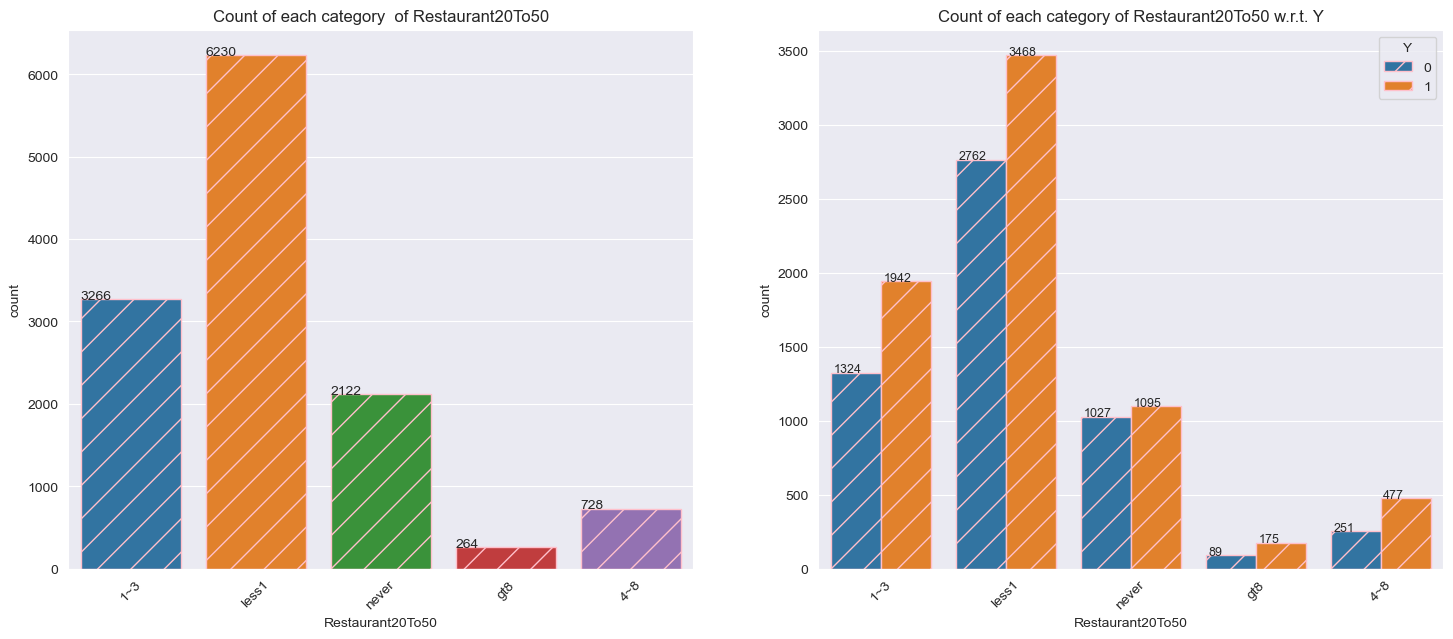

Restaurant20To50  Total_Count  Acceptance rate  Rejection rate
0              1~3         3266           59.461          40.539
1              4~8          728           65.522          34.478
2              gt8          264           66.288          33.712
3            less1         6230           55.666          44.334
4            never         2122           51.602          48.398

In [44]:
univar_analysis('Restaurant20To50')

- Frequent visitors are more likely to accept the coupon even if the average cost per person is 20 to 50 dollars

#### 20 toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min'

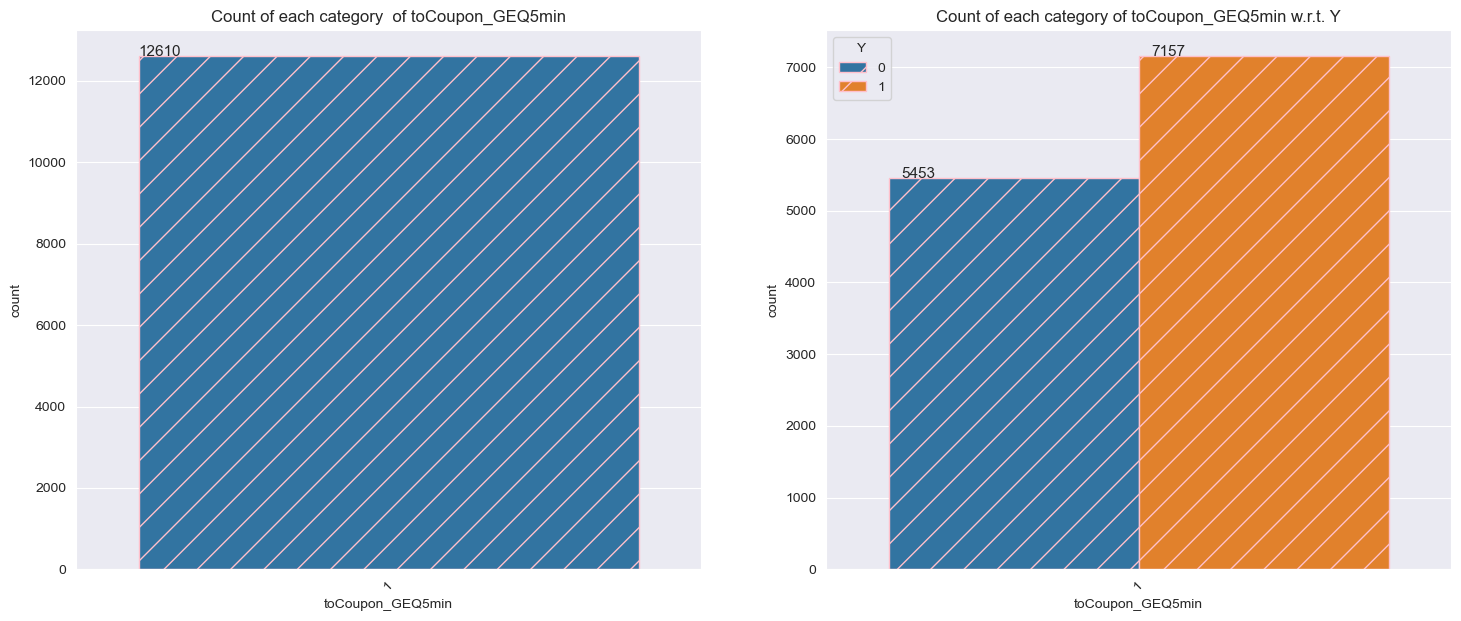

   toCoupon_GEQ5min  Total_Count  Acceptance rate  Rejection rate
0                 1        12610           56.757          43.243


=*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*=


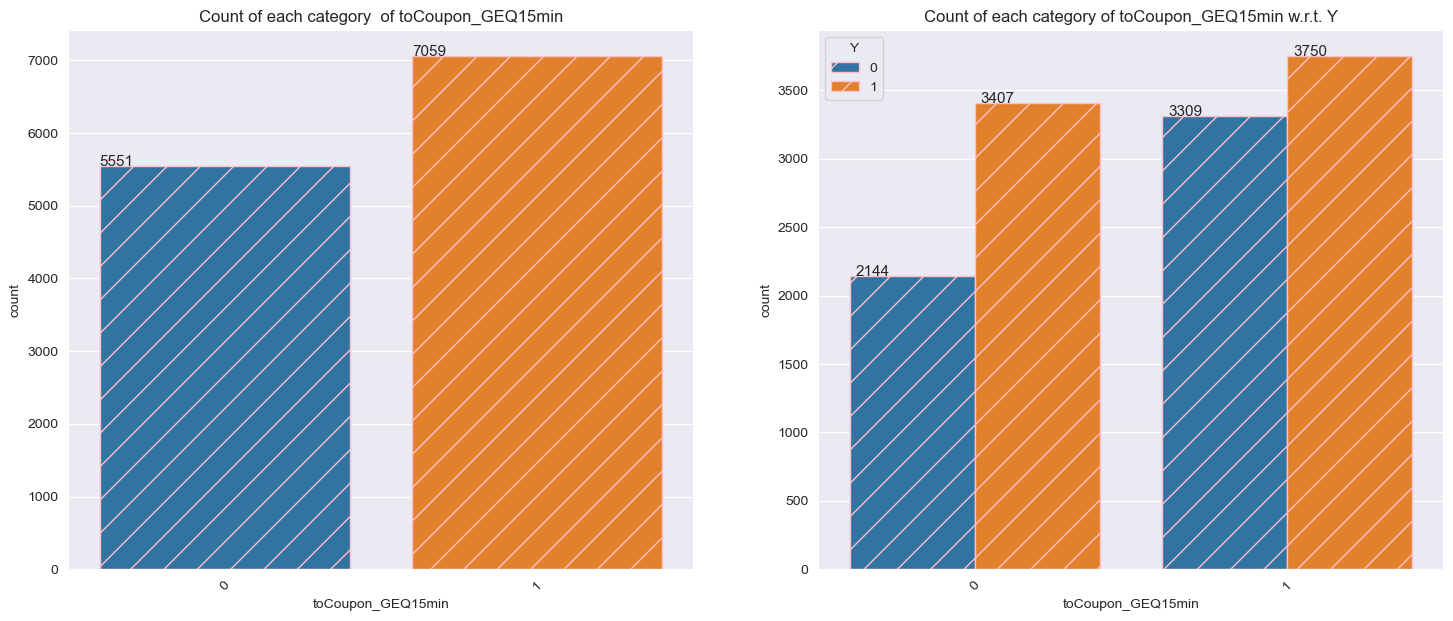

   toCoupon_GEQ15min  Total_Count  Acceptance rate  Rejection rate
0                  0         5551           61.376          38.624
1                  1         7059           53.124          46.876


=*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*=


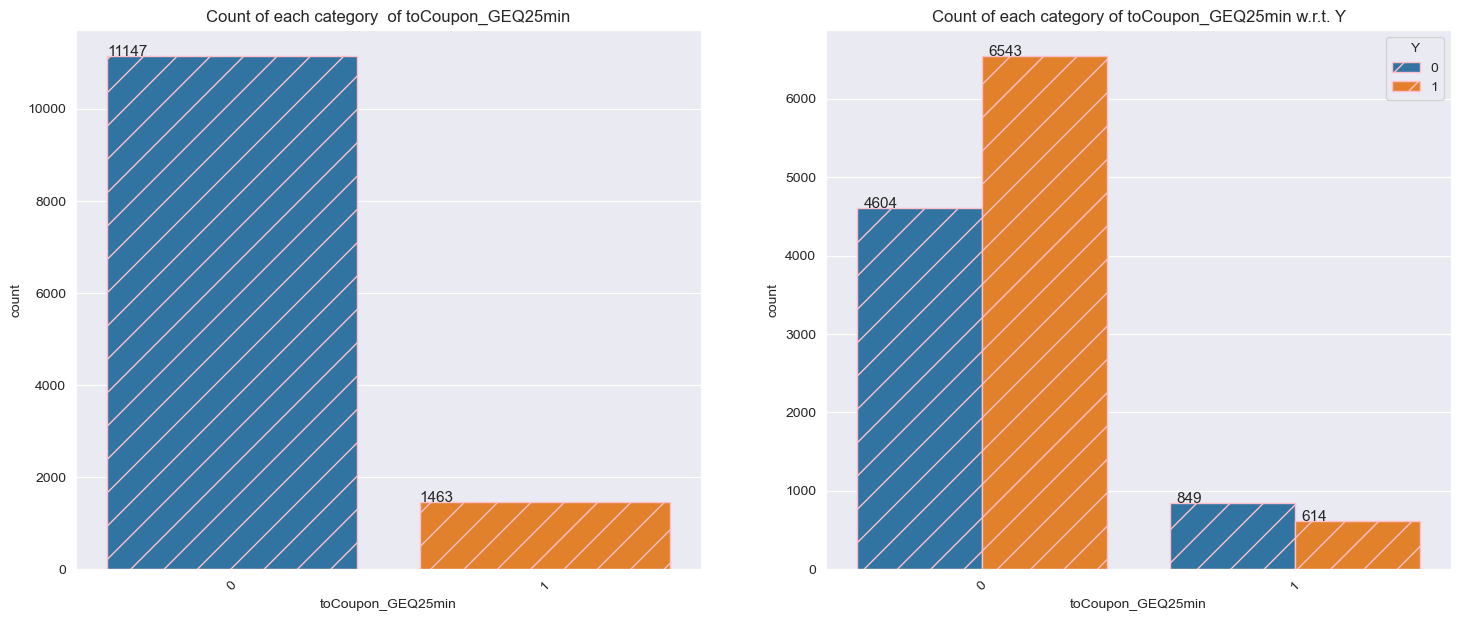

   toCoupon_GEQ25min  Total_Count  Acceptance rate  Rejection rate
0                  0        11147           58.697          41.303
1                  1         1463           41.969          58.031


=*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*=


In [45]:
for feature in ['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min']:
    print(univar_analysis(feature,fontsize1=11,fontsize2=11))
    print('\n')
    print('=*='*40)

- The amount of time it takes to drive to the restaurant or bar in order to redeem the coupon is an essential element for coupon acceptance.
- The restaurant close by has a higher rate of acceptance.
- When the drive to the restaurant/bar was longer than 25 minutes, not many coupons were not recommended.

#### 21 Occupation
- It's just got a lots and lot's of categories

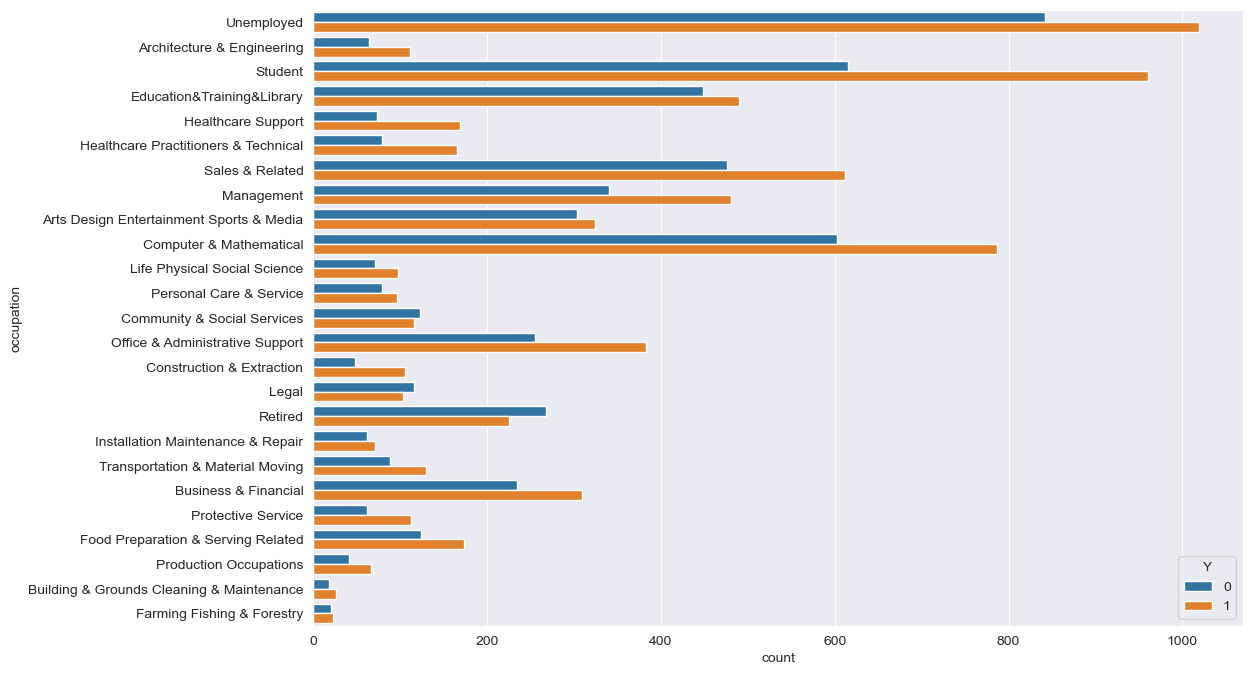

In [46]:
plt.figure(figsize=(12,8))
sns.countplot(y = data.occupation,hue = data.Y)
plt.show()

- Max people are un employed or students
- Very feq people work in in Farming Fishing and Forestry , Building and ground maintaince

#### 22 Car

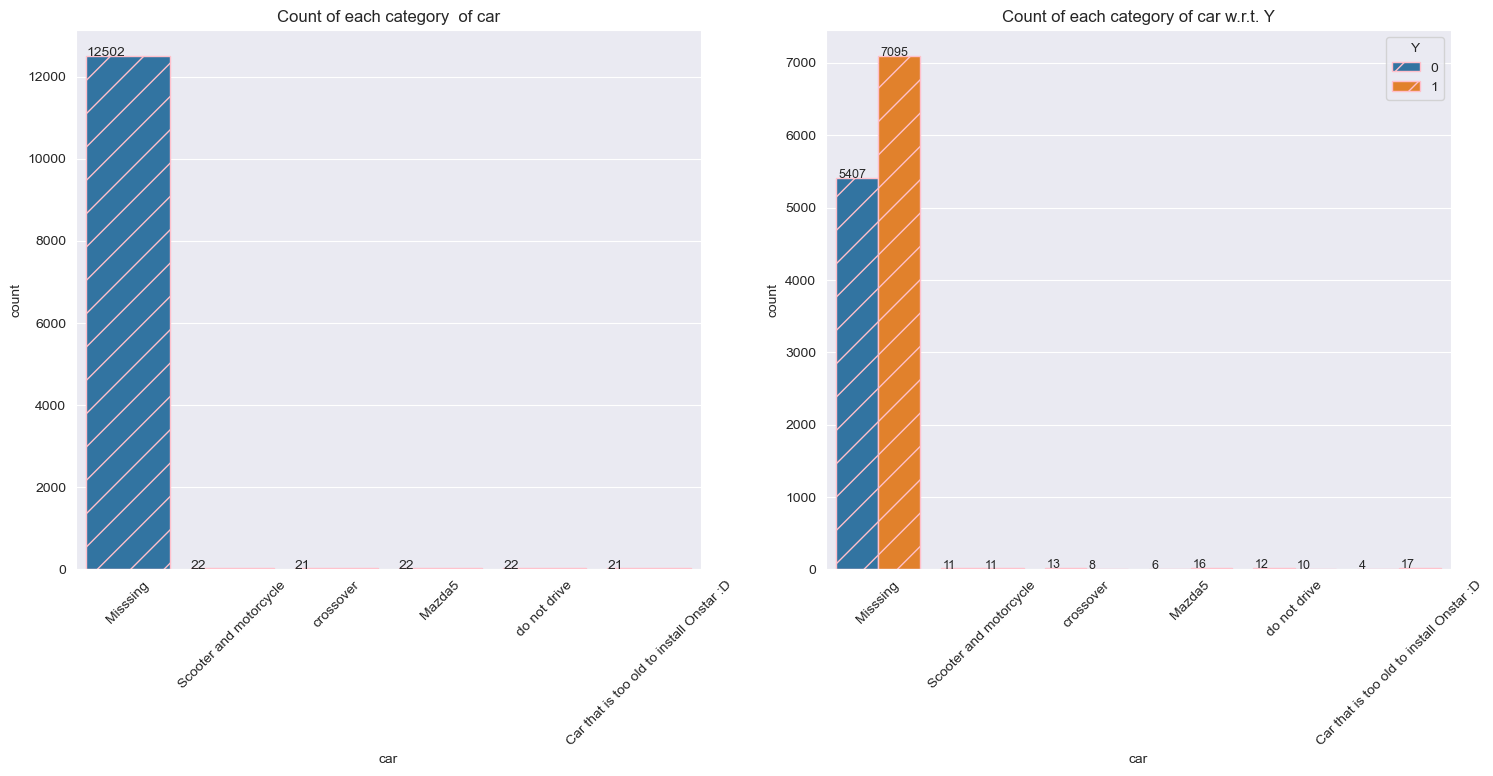

car  Total_Count  Acceptance rate  \
0  Car that is too old to install Onstar :D           21           80.952   
1                                    Mazda5           22           72.727   
2                                  Misssing        12502           56.751   
3                    Scooter and motorcycle           22           50.000   
4                                 crossover           21           38.095   
5                              do not drive           22           45.455   

   Rejection rate  
0          19.048  
1          27.273  
2          43.249  
3          50.000  
4          61.905  
5          54.545

In [47]:
univar_analysis('car',data = data_2)

- 'Car that is too old to install Onstar' has the heighest acceptance rate of 80.95 but its overall count is just 21
- Most values are Missing (12502) and has the accepatce rate of 56.75%

# Bi-Variate Analysis 

In [48]:
tempdf = data.copy(deep=True)
# Some Feature Engineering before Bi-Var analysis 
# Combining 'toCoupon_GEQ5min','toCoupon_GEQ15min', 'toCoupon_GEQ25min into one feature 
time_to_coupon = []
for v1,v2,v3 in zip(data.toCoupon_GEQ5min.values,data.toCoupon_GEQ15min.values, data.toCoupon_GEQ25min.values):
    if v1 == 1 and v2==0 and v3==0:
        time_to_coupon.append('5_Mins')
    elif v1 == 1 and v2==1 and v3==0:
        time_to_coupon.append('15_Mins')
    else:
        time_to_coupon.append('25_Mins')
    
tempdf['time_to_coupon'] = time_to_coupon
#data_2['time_to_coupon'] = time_to_coupon
tempdf.drop(columns=["toCoupon_GEQ5min","toCoupon_GEQ15min","toCoupon_GEQ25min"],inplace=True)
#data_2.drop(columns=["toCoupon_GEQ5min","toCoupon_GEQ15min","toCoupon_GEQ25min"],inplace=True)

# Renaming Restaurant on the basis of the average bill

tempdf.rename(columns = {'RestaurantLessThan20':'Cheap Restaurant','Restaurant20To50':'Expensive Restaurant'}, inplace = True)

In [49]:
###we Will have categorise income and occupation before analysis coz its getting very hatd to viz

#Mapping Income to following categories low,Medium,High and very high
income_map =  {'Less than $12500':'low', '$12500 - $24999':'low', '$25000 - $37499':'low'
      ,'$37500 - $49999':'medium', '$50000 - $62499':'medium', '$62500 - $74999':'medium',
      '$75000 - $87499':'high' , '$87500 - $99999':'high', '$100000 or More':'very high'}

#Mapping Temperature to following categories low,Medium,High 
temp_map = {80 :'High',55 : 'Medium',30:'low'}


#Mapping Temperature to following categories FarmingRelated,Technicalstudies ,Sales&Coroporate .Unemployed ,Services&Suppport     
#Art&Media&Sports,Maintaince&Transport ,Retired,Health&Medicine
      
occupation_map = {
   'Unemployed': 'Unemployed', 'Architecture & Engineering': 'Technicalstudies', 'Student':'Technicalstudies',
       'Education&Training&Library':'Technicalstudies', 'Healthcare Support':'Health&Medicine',
       'Healthcare Practitioners & Technical':'Health&Medicine', 'Sales & Related':'Sales&Coroporate',
       'Management':'Sales&Coroporate', 'Arts Design Entertainment Sports & Media':"Art&Media&Sports",
       'Computer & Mathematical':'Technicalstudies', 'Life Physical Social Science':'Technicalstudies',
       'Personal Care & Service':'Services&Suppport', 'Community & Social Services':'Services&Suppport',
       'Office & Administrative Support':'Services&Suppport', 'Construction & Extraction':'Maintaince&Transport',
       'Legal':'Sales&Coroporate', 'Retired':'Retired', 'Installation Maintenance & Repair':'Maintaince&Transport',
       'Transportation & Material Moving':'Maintaince&Transport', 'Business & Financial':'Sales&Coroporate',
       'Protective Service':'Services&Suppport', 'Food Preparation & Serving Related':'Services&Suppport',
       'Production Occupations':'Services&Suppport',
       'Building & Grounds Cleaning & Maintenance':'Maintaince&Transport',
       'Farming Fishing & Forestry':'FarmingRelated'}  
            
            
tempdf.temperature = tempdf.temperature.map(temp_map)
tempdf.occupation = tempdf.occupation.map(occupation_map)
tempdf.income = tempdf.income.map(income_map)

In [50]:
tempdf.occupation.value_counts()

Technicalstudies        4248
Sales&Coroporate        2671
Unemployed              1861
Services&Suppport       1632
Art&Media&Sports         627
Maintaince&Transport     549
Retired                  493
Health&Medicine          486
FarmingRelated            43
Name: occupation, dtype: int64

In [51]:
def bivariate_analysis(feature1,feature2,data,x,hue,title,loc,rotation1 =0,rotation2 = 90,annotation_fontsize = 8):
    
    fig,ax = plt.subplots(3,1,figsize = (20,20))
    ax = ax.flatten()
    df = pd.DataFrame(data.groupby([feature1,feature2]).size().reset_index())
    df.columns  = [feature1,feature2,'value']
    
    sns.barplot(data = df,x = feature2,hue = feature1,y = df.value,ax = ax[0])
    
    ax[0].set_title('{0}'.format(title))
    for tick in ax[0].get_xticklabels():
            tick.set_rotation(rotation1)
    ax[0].legend( loc= loc,fontsize=8)
    ax[0].grid(b=True, which='major', color='b', linestyle='-')
    
    col = feature1 +'_'+feature2
    
    data[col] = data[feature1].astype('str')+' & '+data[feature2].astype('str')
    countplot = sns.countplot(data = data,x = data[col],hue = data.Y,ax=ax[1])
    ax[1].set_title('effect of {0} and {1} on the acceptance of the coupon'.format(feature1,feature2))
    ax[1].grid(b=True, which='major', color='b', linestyle='-')
    for tick in ax[1].get_xticklabels():
        tick.set_rotation(rotation2)
        
    for patch in countplot.patches:
        countplot.annotate(patch.get_height(),(patch.get_x()+0.02,patch.get_height()+1),fontsize = annotation_fontsize)
        
    ax[2].set_title('Bar plot of {} and {} '.format(feature1,feature2))
    sns.barplot(data = data,x = feature1,y = data.Y,hue = feature2,estimator=np.mean,ax = ax[2],ci=None)
    ax[2].grid(b=True, which='major', color='b', linestyle='-')
    for tick in ax[2].get_xticklabels():
        tick.set_rotation(rotation2)
    plt.subplots_adjust(hspace=0.7)
    
    plt.show()
    
    data.drop(feature1 +'_'+feature2,inplace=True,axis=1)                      

#### 1 Effect of destination and passaengers on coupon acceptance

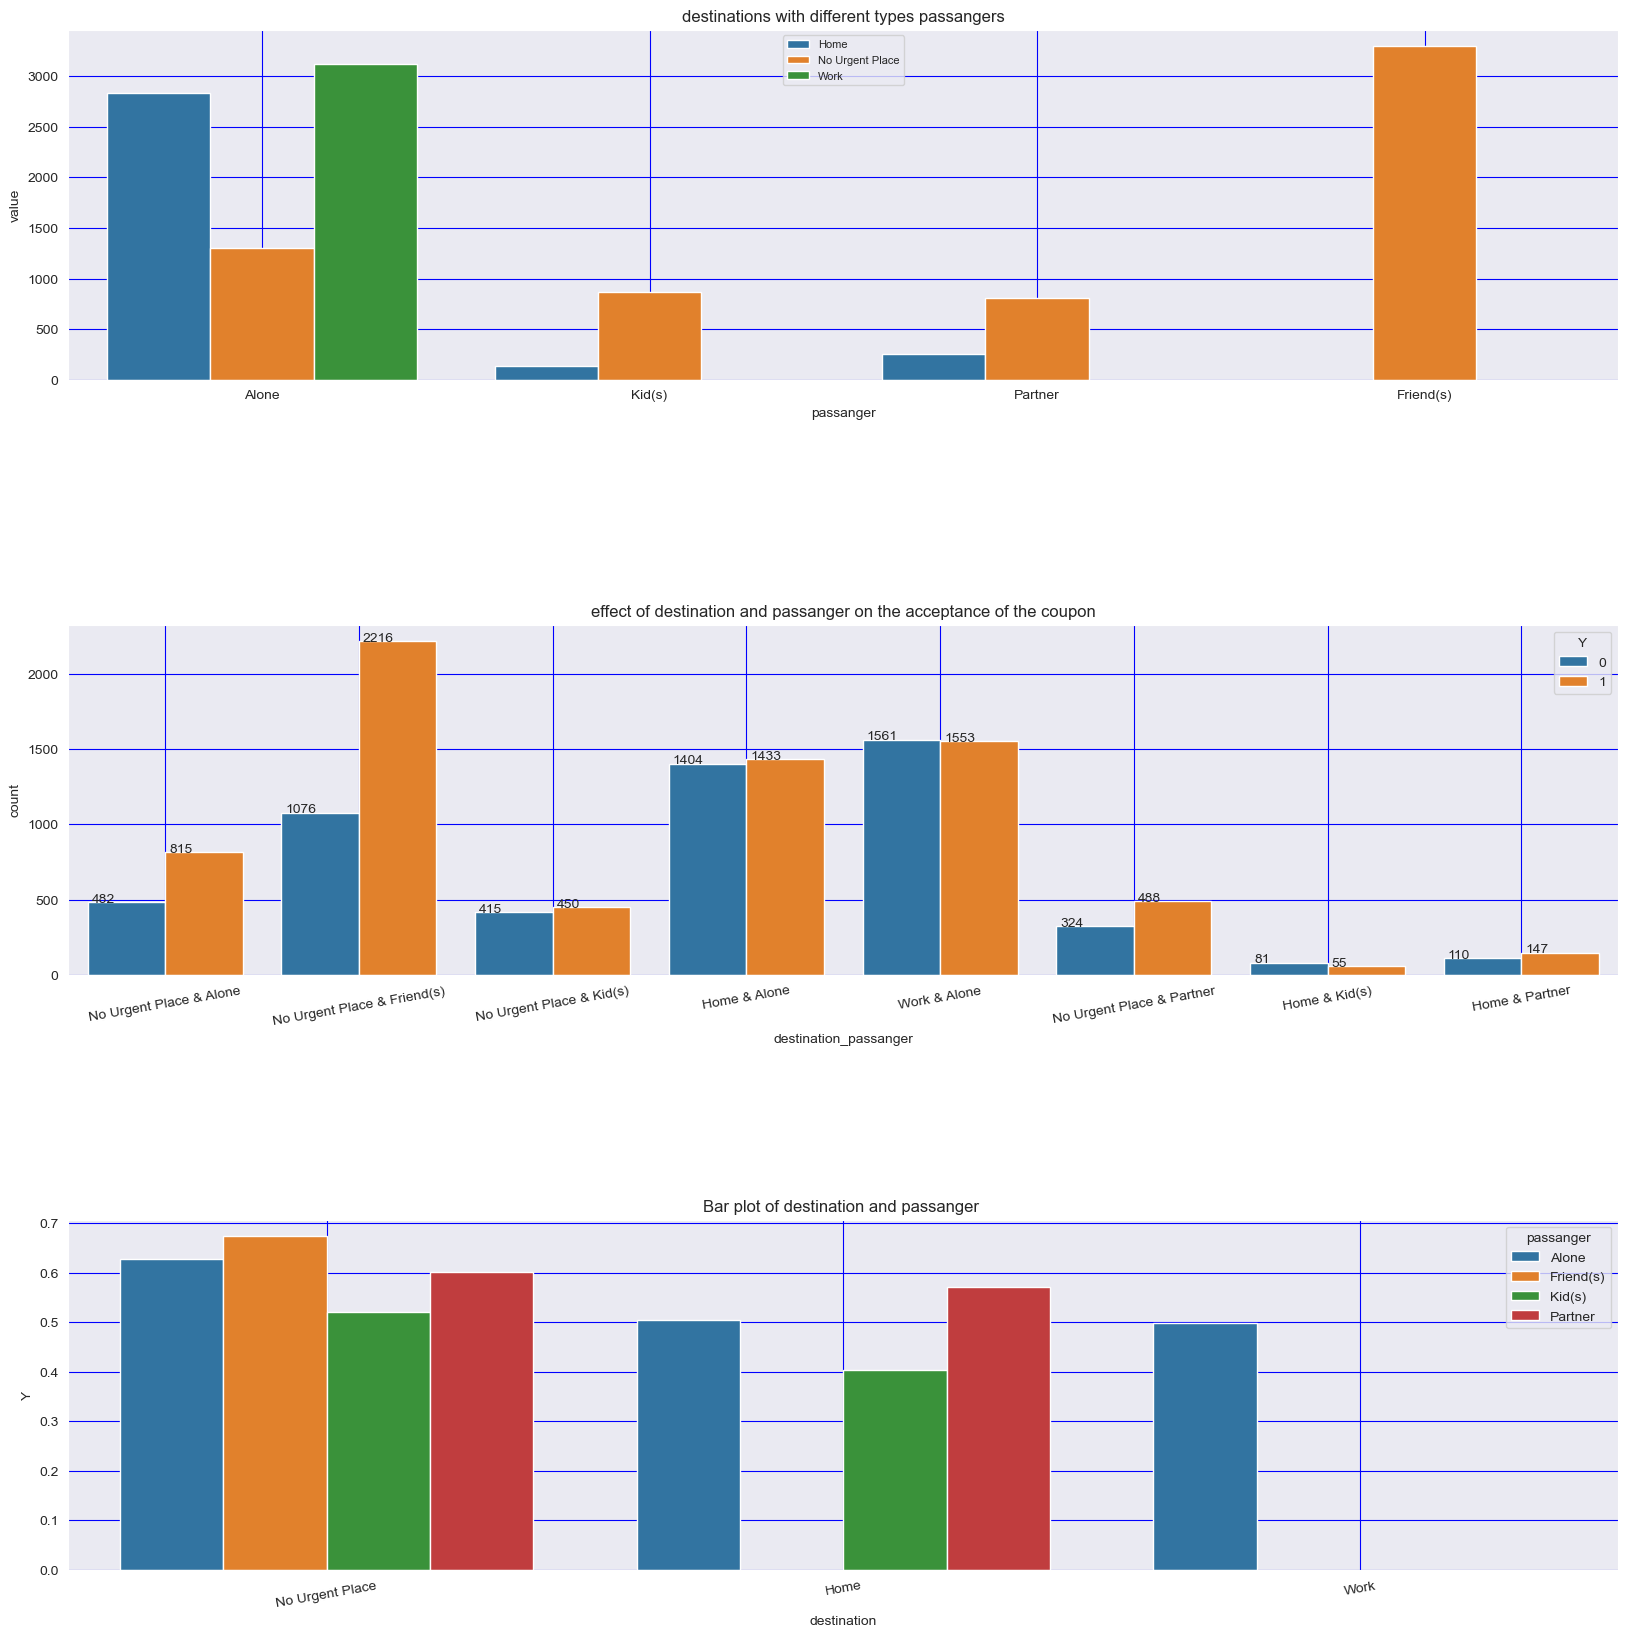

In [52]:
bivariate_analysis('destination','passanger',tempdf,'passanger','destination','destinations with different types passangers','upper center',annotation_fontsize=10,rotation2=10)

- When going with freinds drivers don't go to any urgent place
- Whenever the driver was alone most probably he/she was going to work or home
- When going with friends and and no urgent place the person is most likely to accept the coupon
- While going to work/home and being alone there are 50% chances of the coupon acceptance

#### 2 Effect of income and Type of restaurant ( cheap and expensive) on coupon acceptance

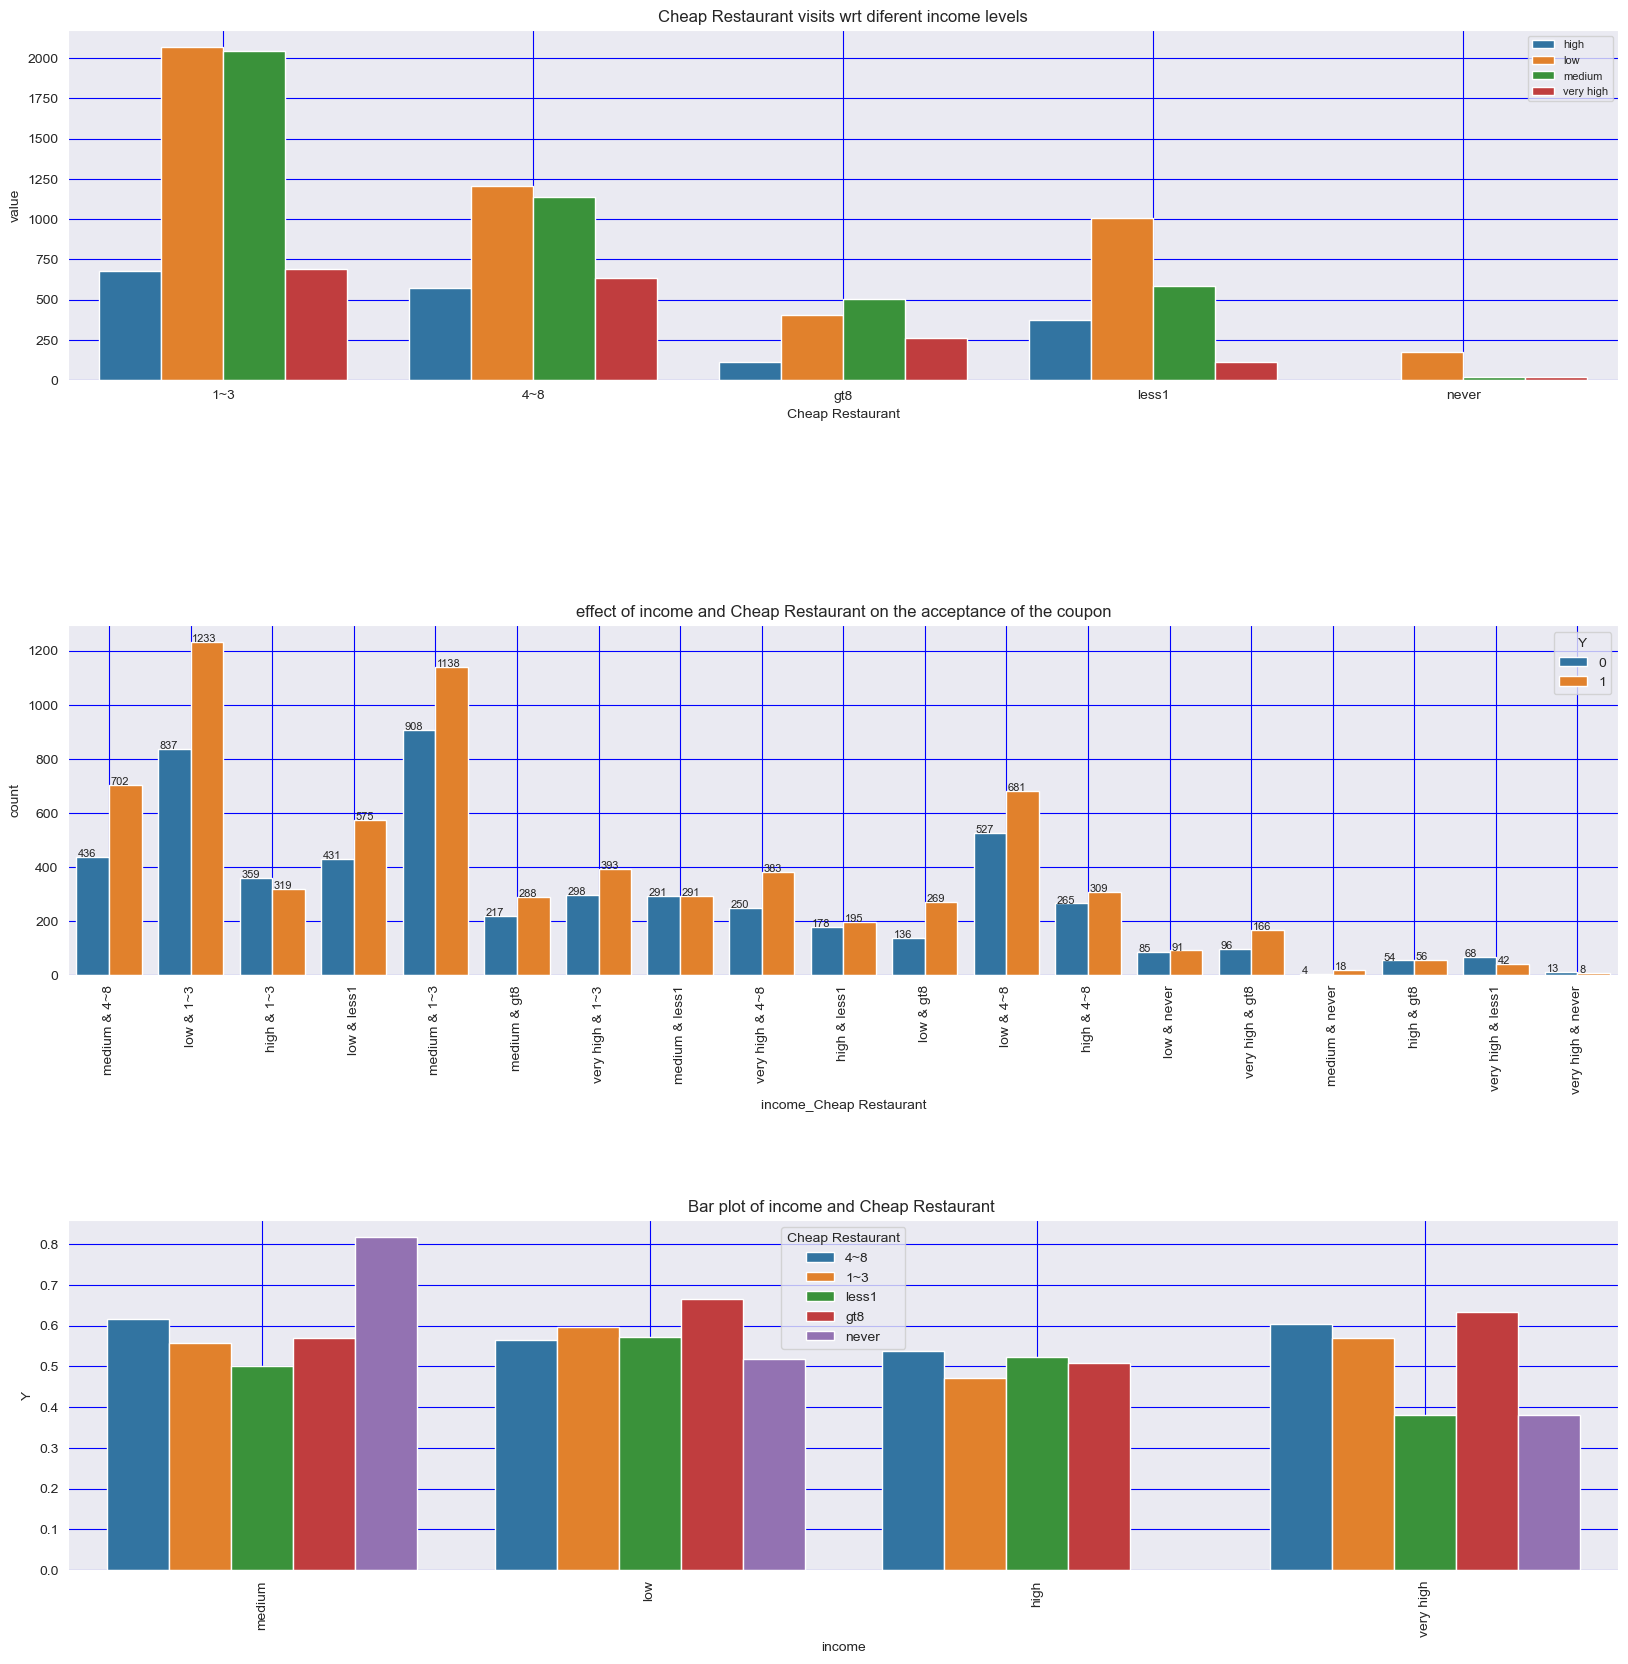

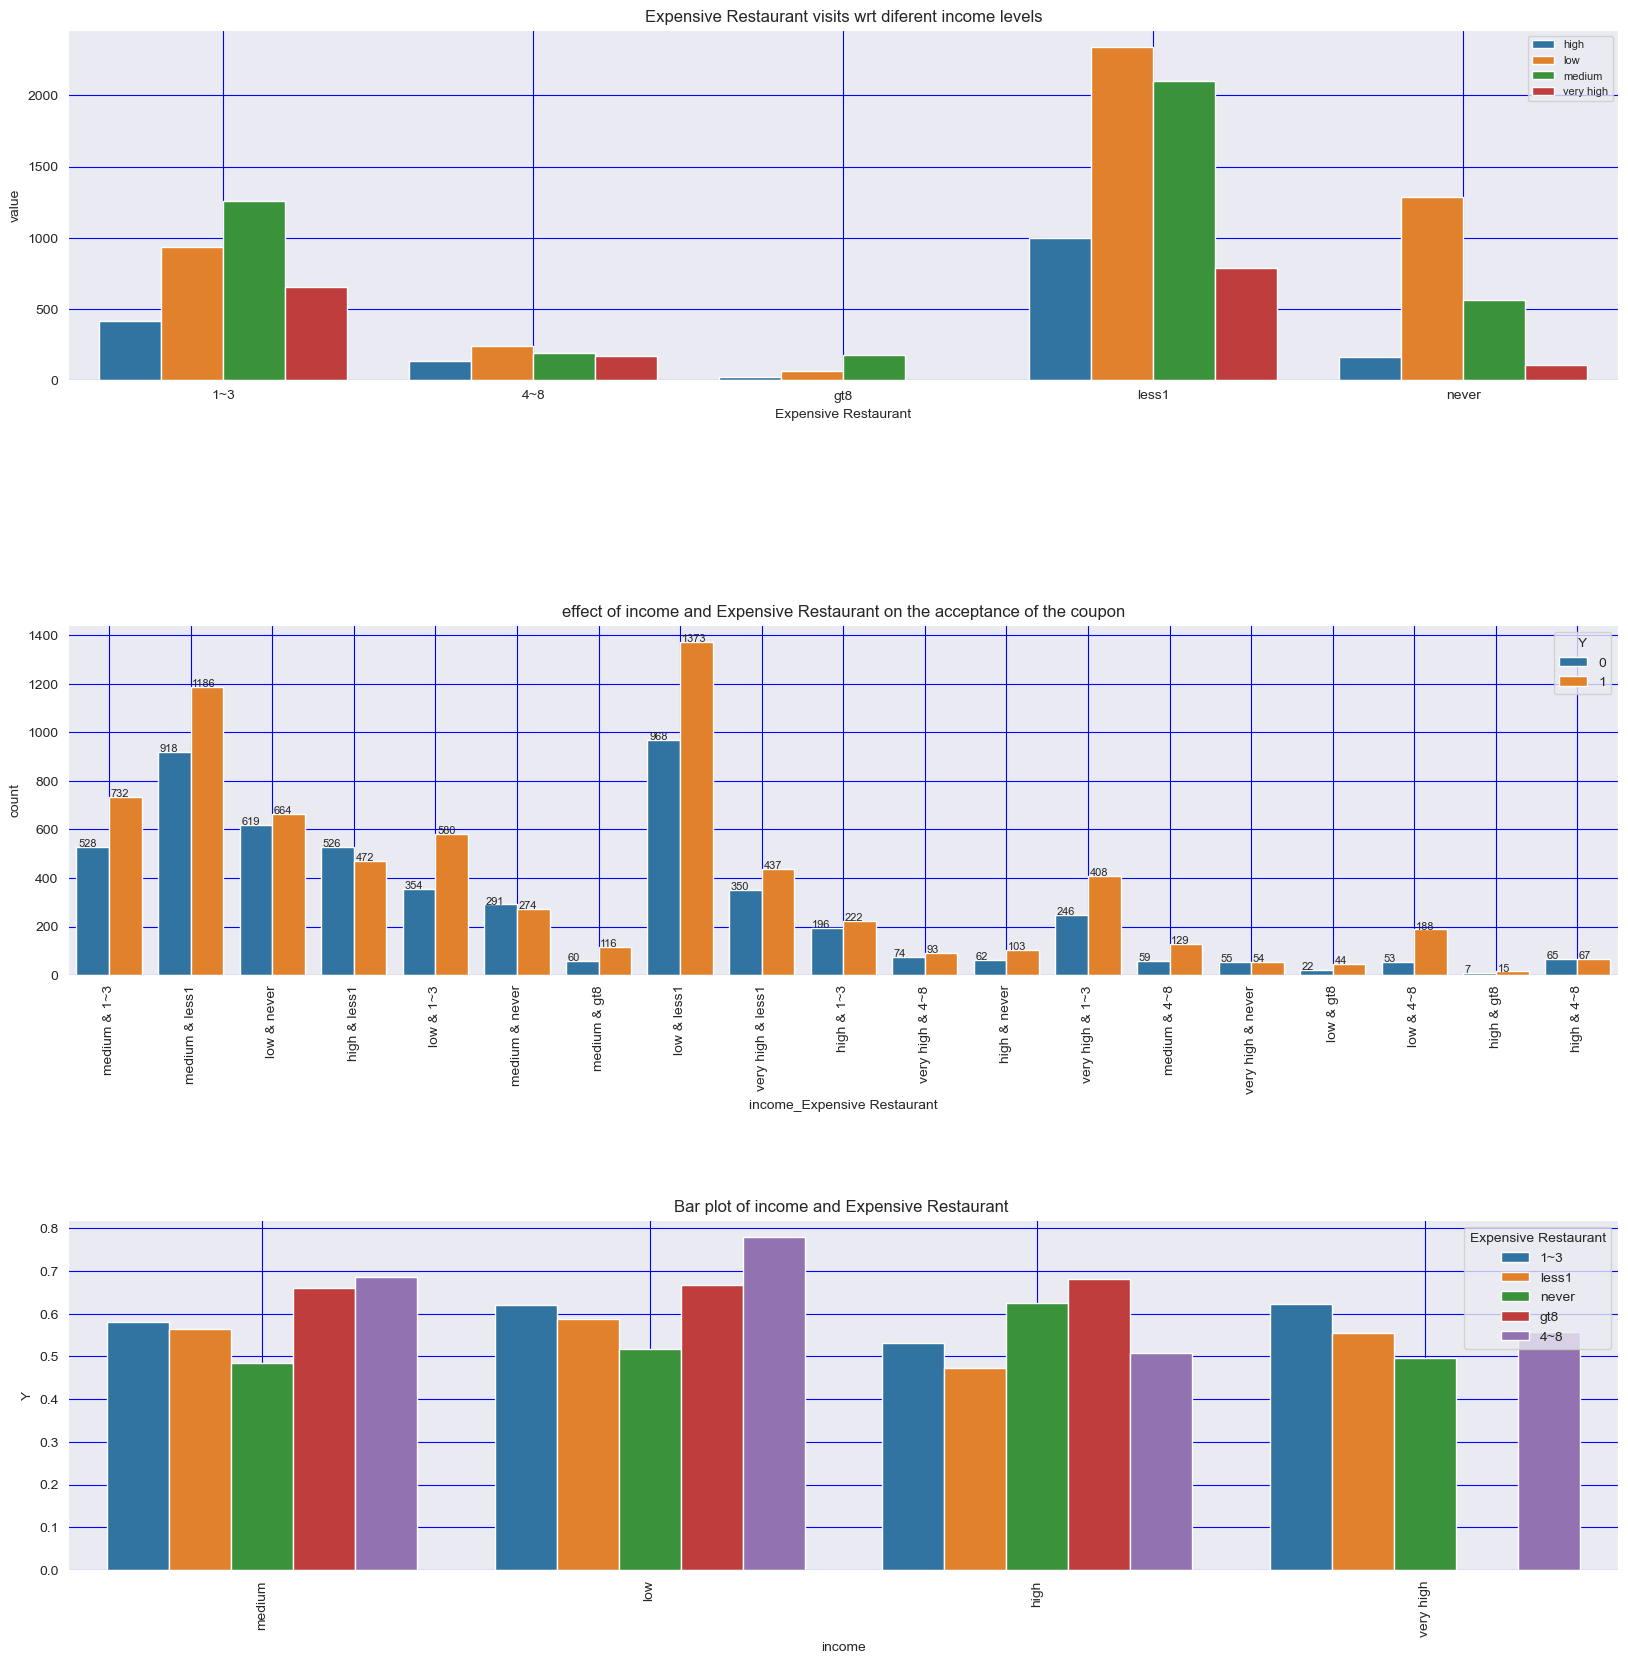

In [53]:
for restra in ['Cheap Restaurant', 'Expensive Restaurant']:
    bivariate_analysis('income',restra,tempdf,restra,'income',restra +' '+'visits wrt diferent income levels','upper right')

1.  Cheap Restaurant
    - people with low grade pay and visit less than 1 time have heigher chances of acceptance of the coupon
    - people with meduim pay and visit less than1 has 50-50 chances of going to cheap restra , similar for low pay and who never visit 
2. Expensive Restaurant
    - Most people only visit 1-3 times a month or they never go to these 
    - Income is a key factor and people with high pay are more likley to accept the coupon wrt the people with low -medium pay scale

#### 3 Effect of income and different types of coupons on coupon acceptance

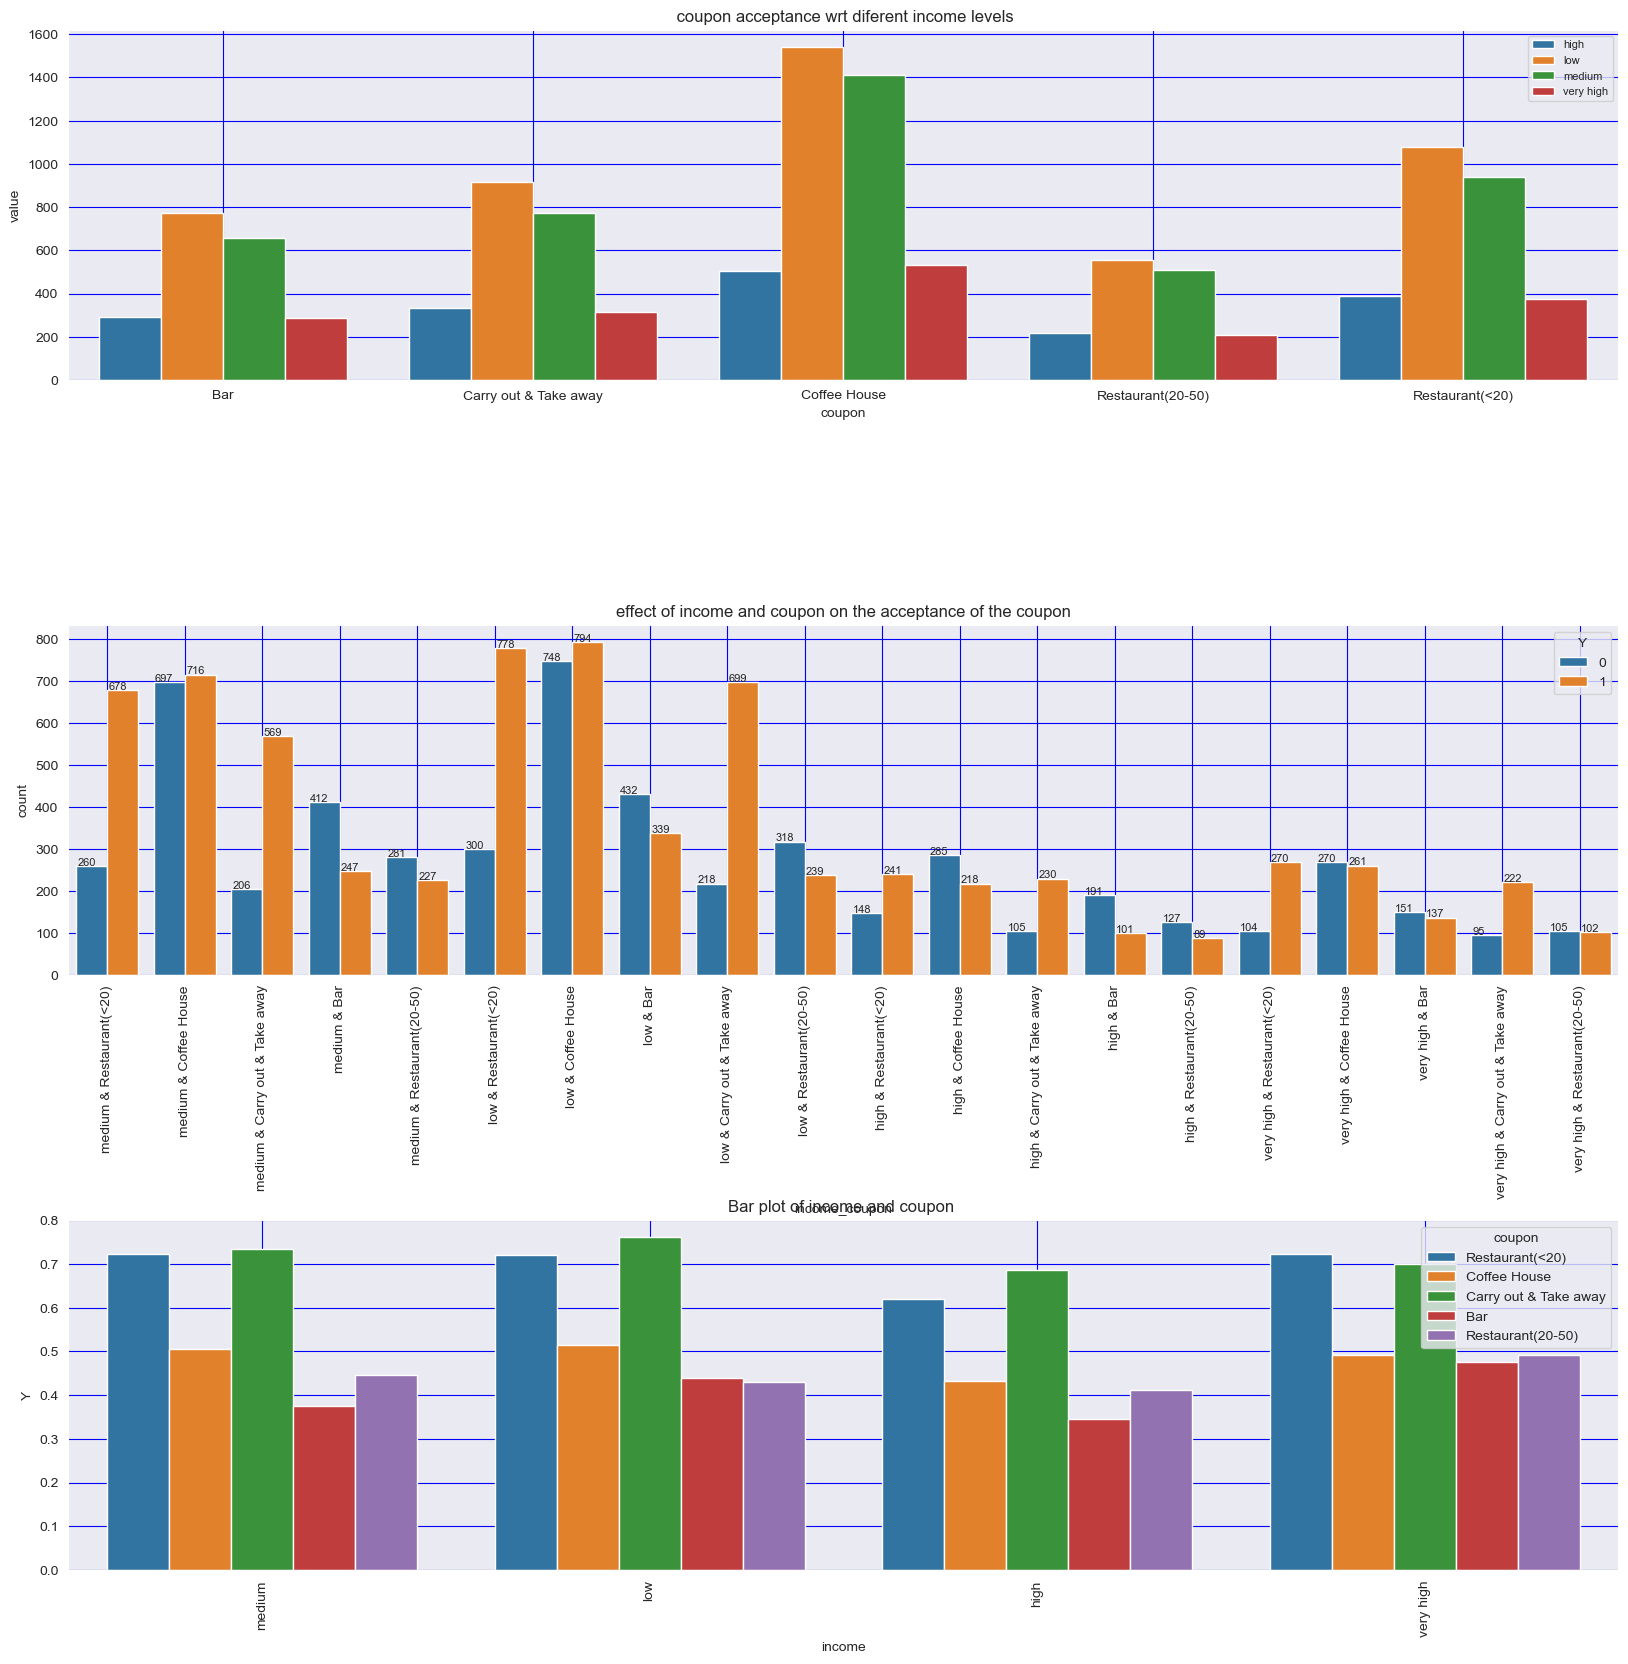

In [54]:
 bivariate_analysis('income','coupon',tempdf,'coupon','income',' coupon acceptance wrt diferent income levels','upper right')

- People of every pay grade  are very likely to accept a coupon of Restaurant(<20) which means cheaper the  restaurant is better chance of accepatance are
- For Coffe House its almost 50-50 for every pay scale
- Similar to Restaurant(<20) people are more intrested in Take away coupons which means people dont want the place to be far and maybe also want to have food in the comfort of their vehicle or home

#### 4 How does  income level and having children effect the sales of coupons

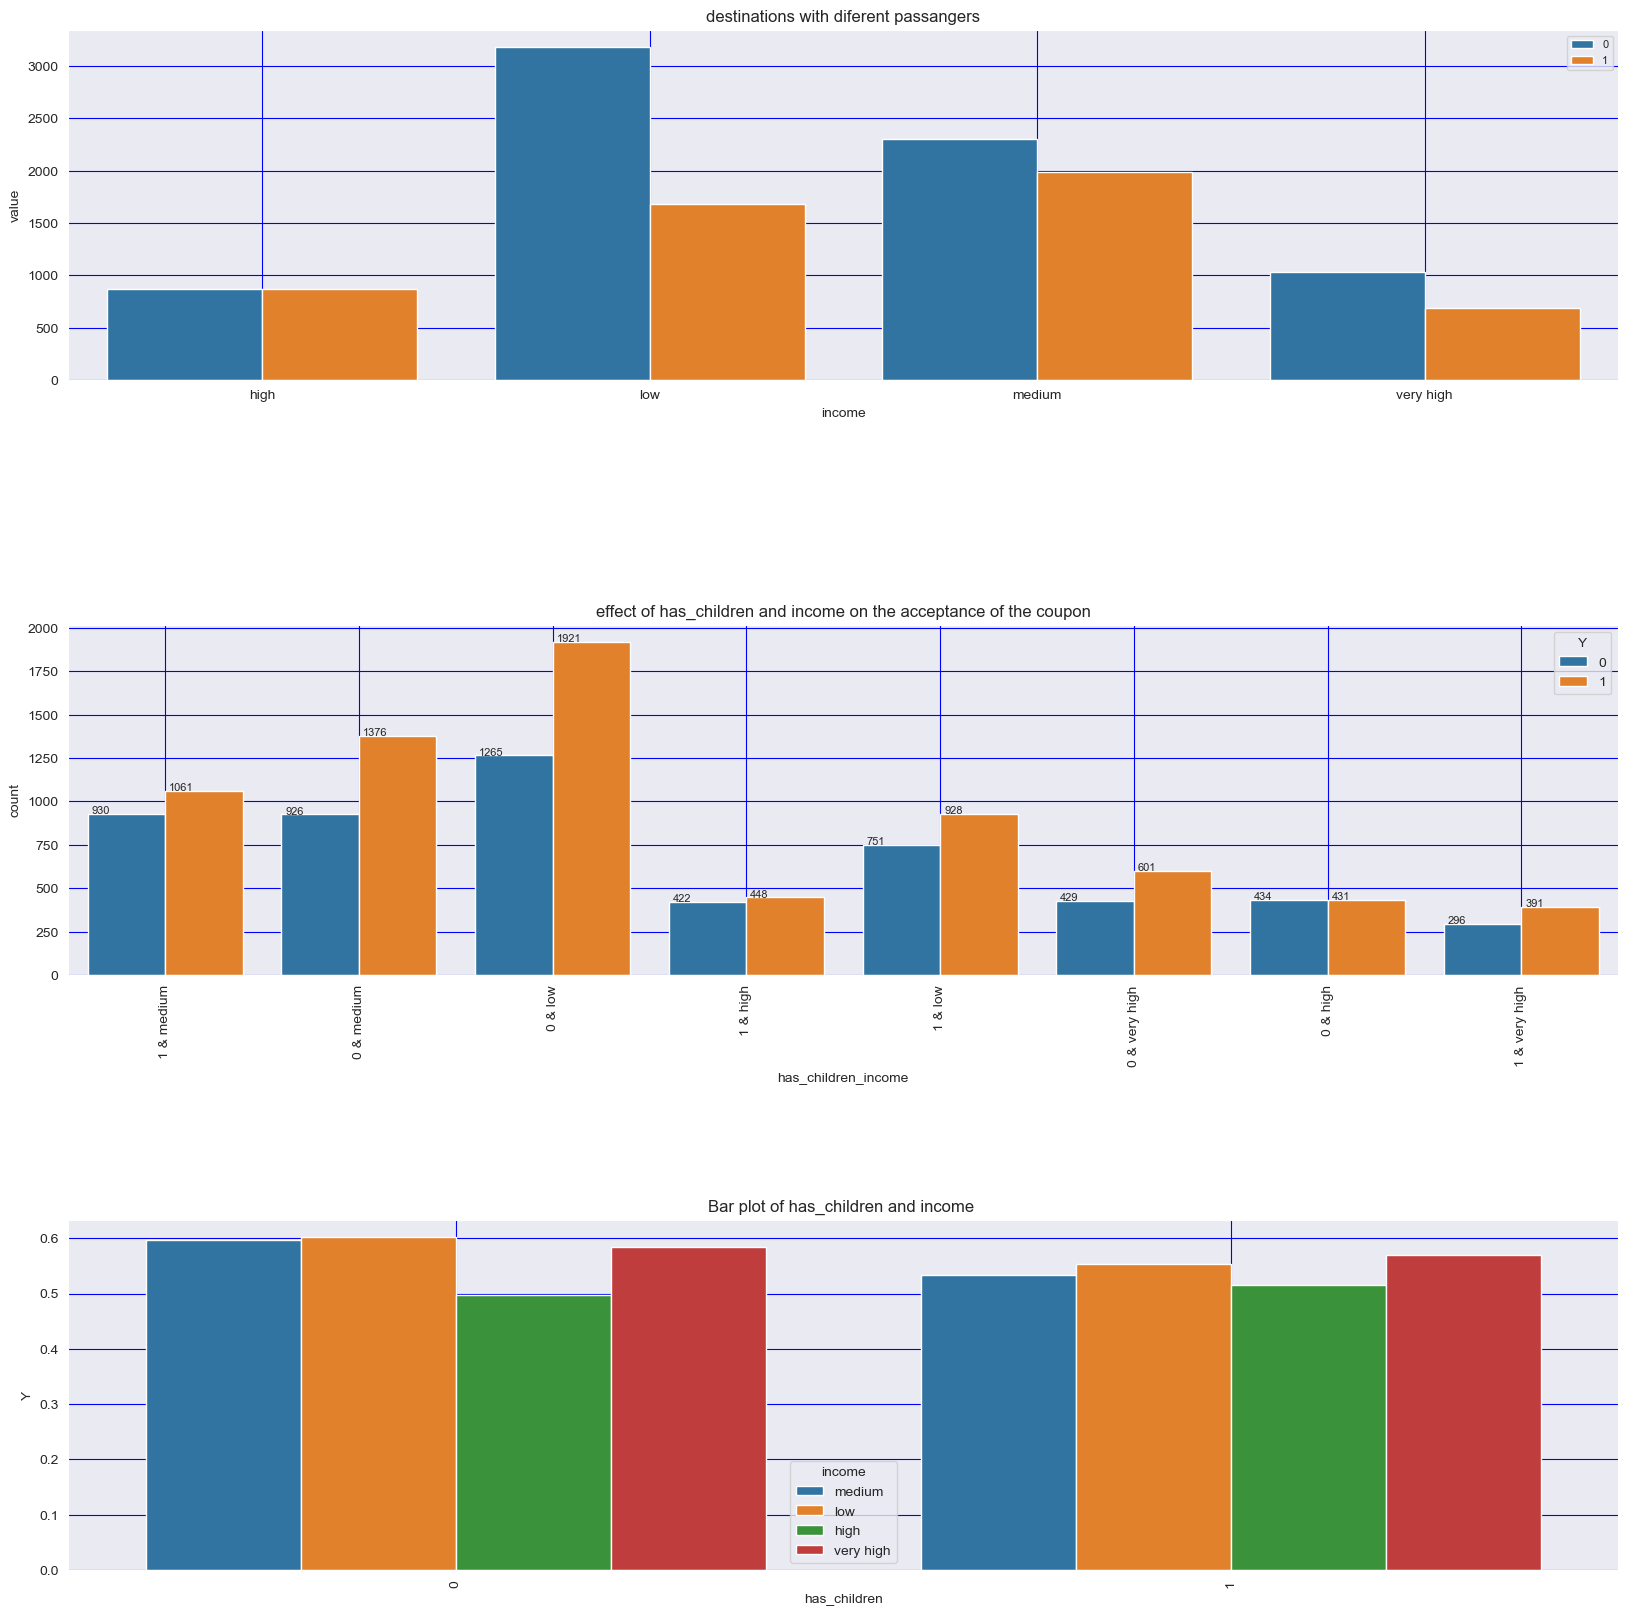

In [55]:
bivariate_analysis('has_children','income',tempdf,'has_children','income','destinations with diferent passangers','upper right',rotation2=90)                      

- As the pay level increases the chamce of having children increases
- People with no children and low pay scale are more likely to accept the coupon it means single people or people with no children  are more likely to have food from outside rather than cooking inside

#### 5 How does income levels  and  number of visits to diff types of cafes effect the coupon accaptance ?

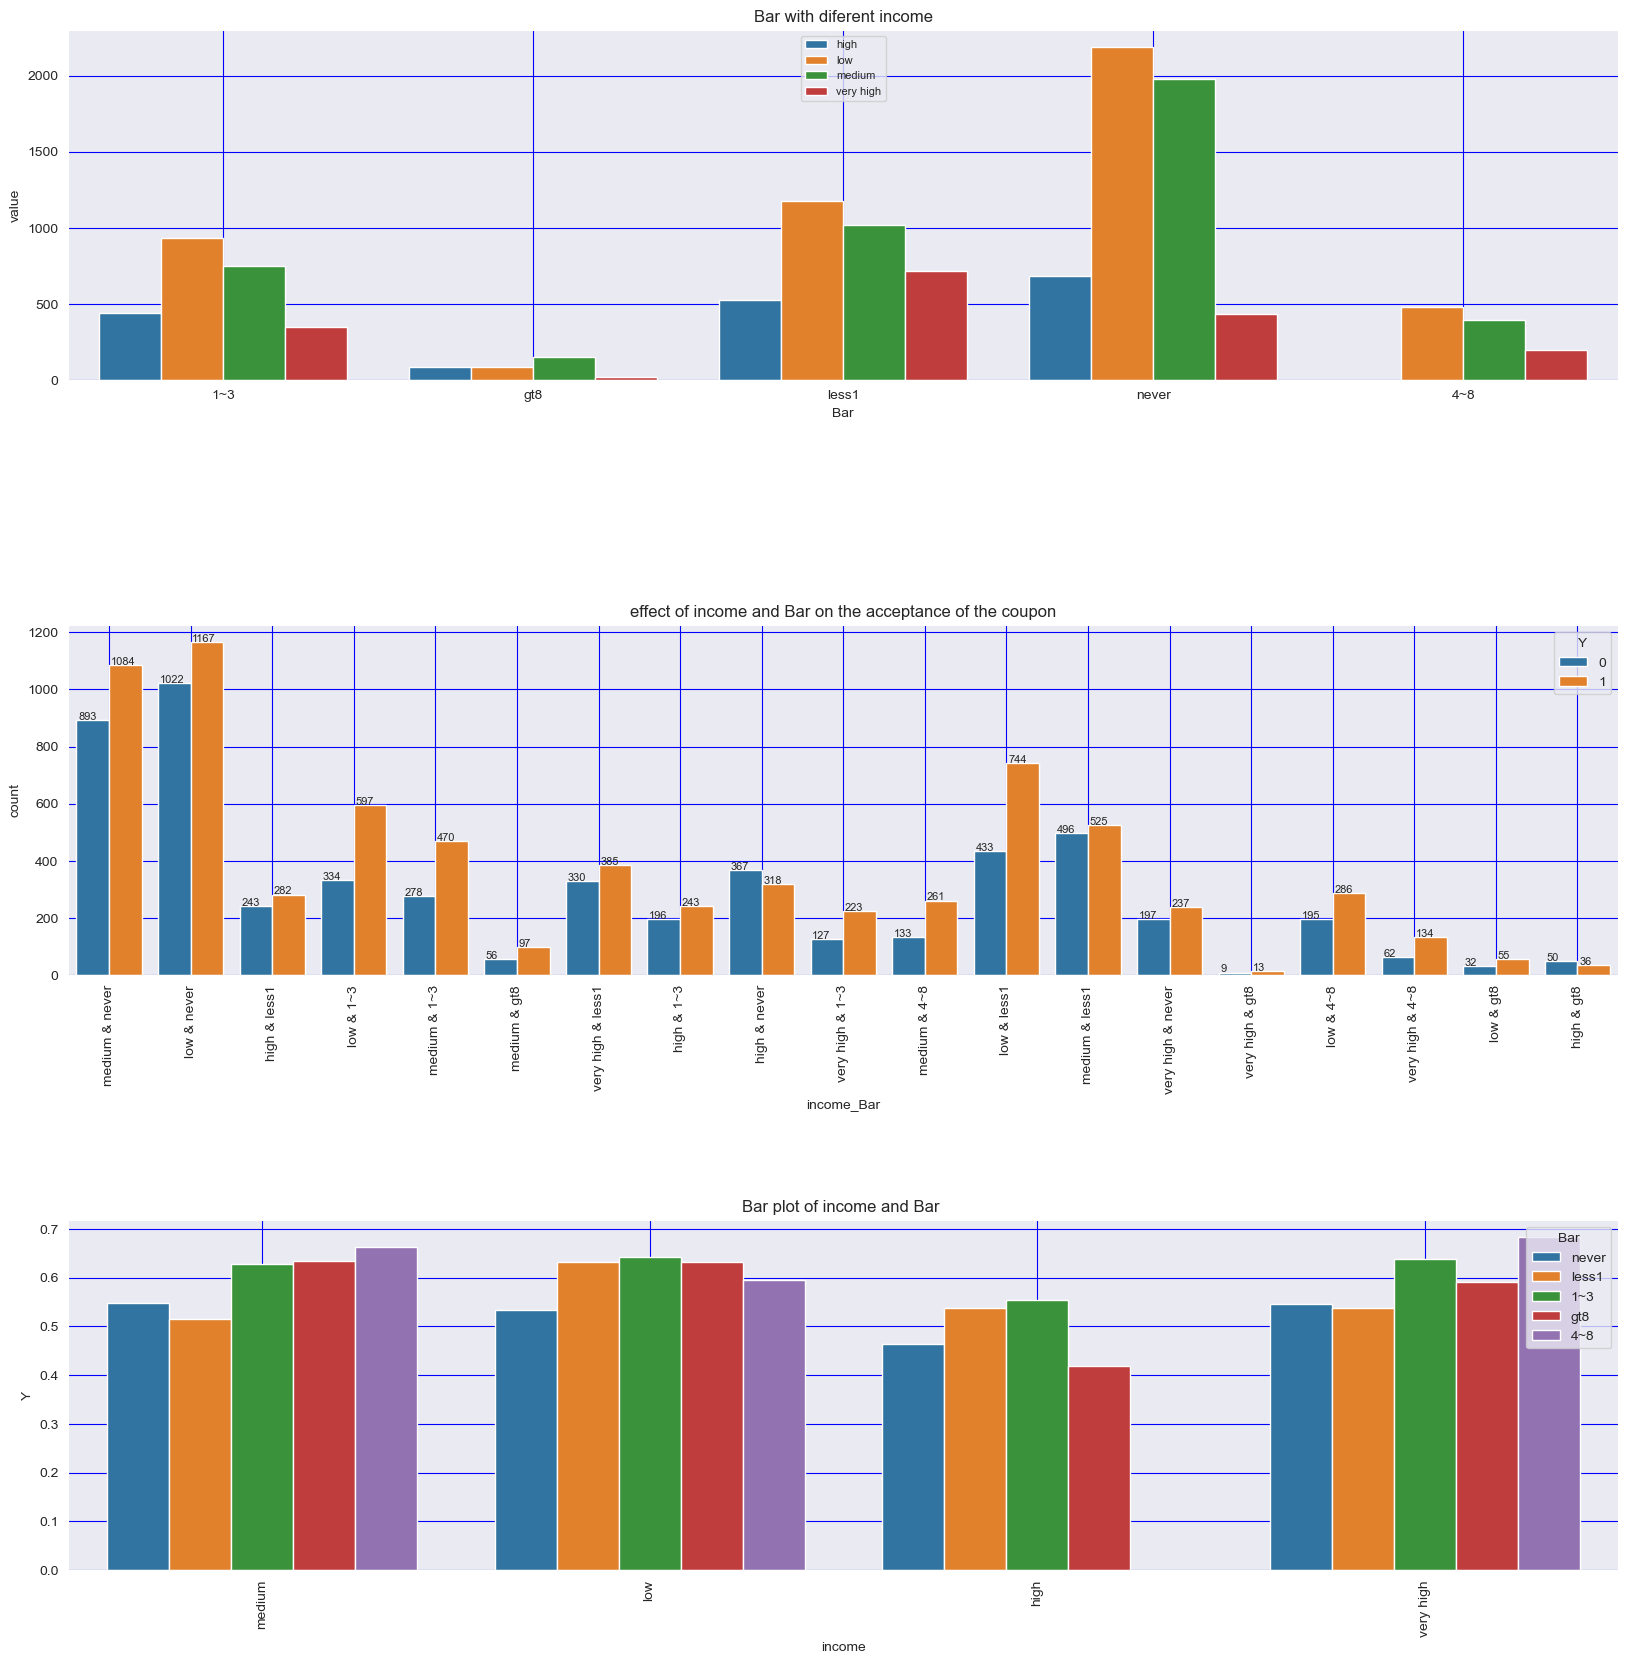

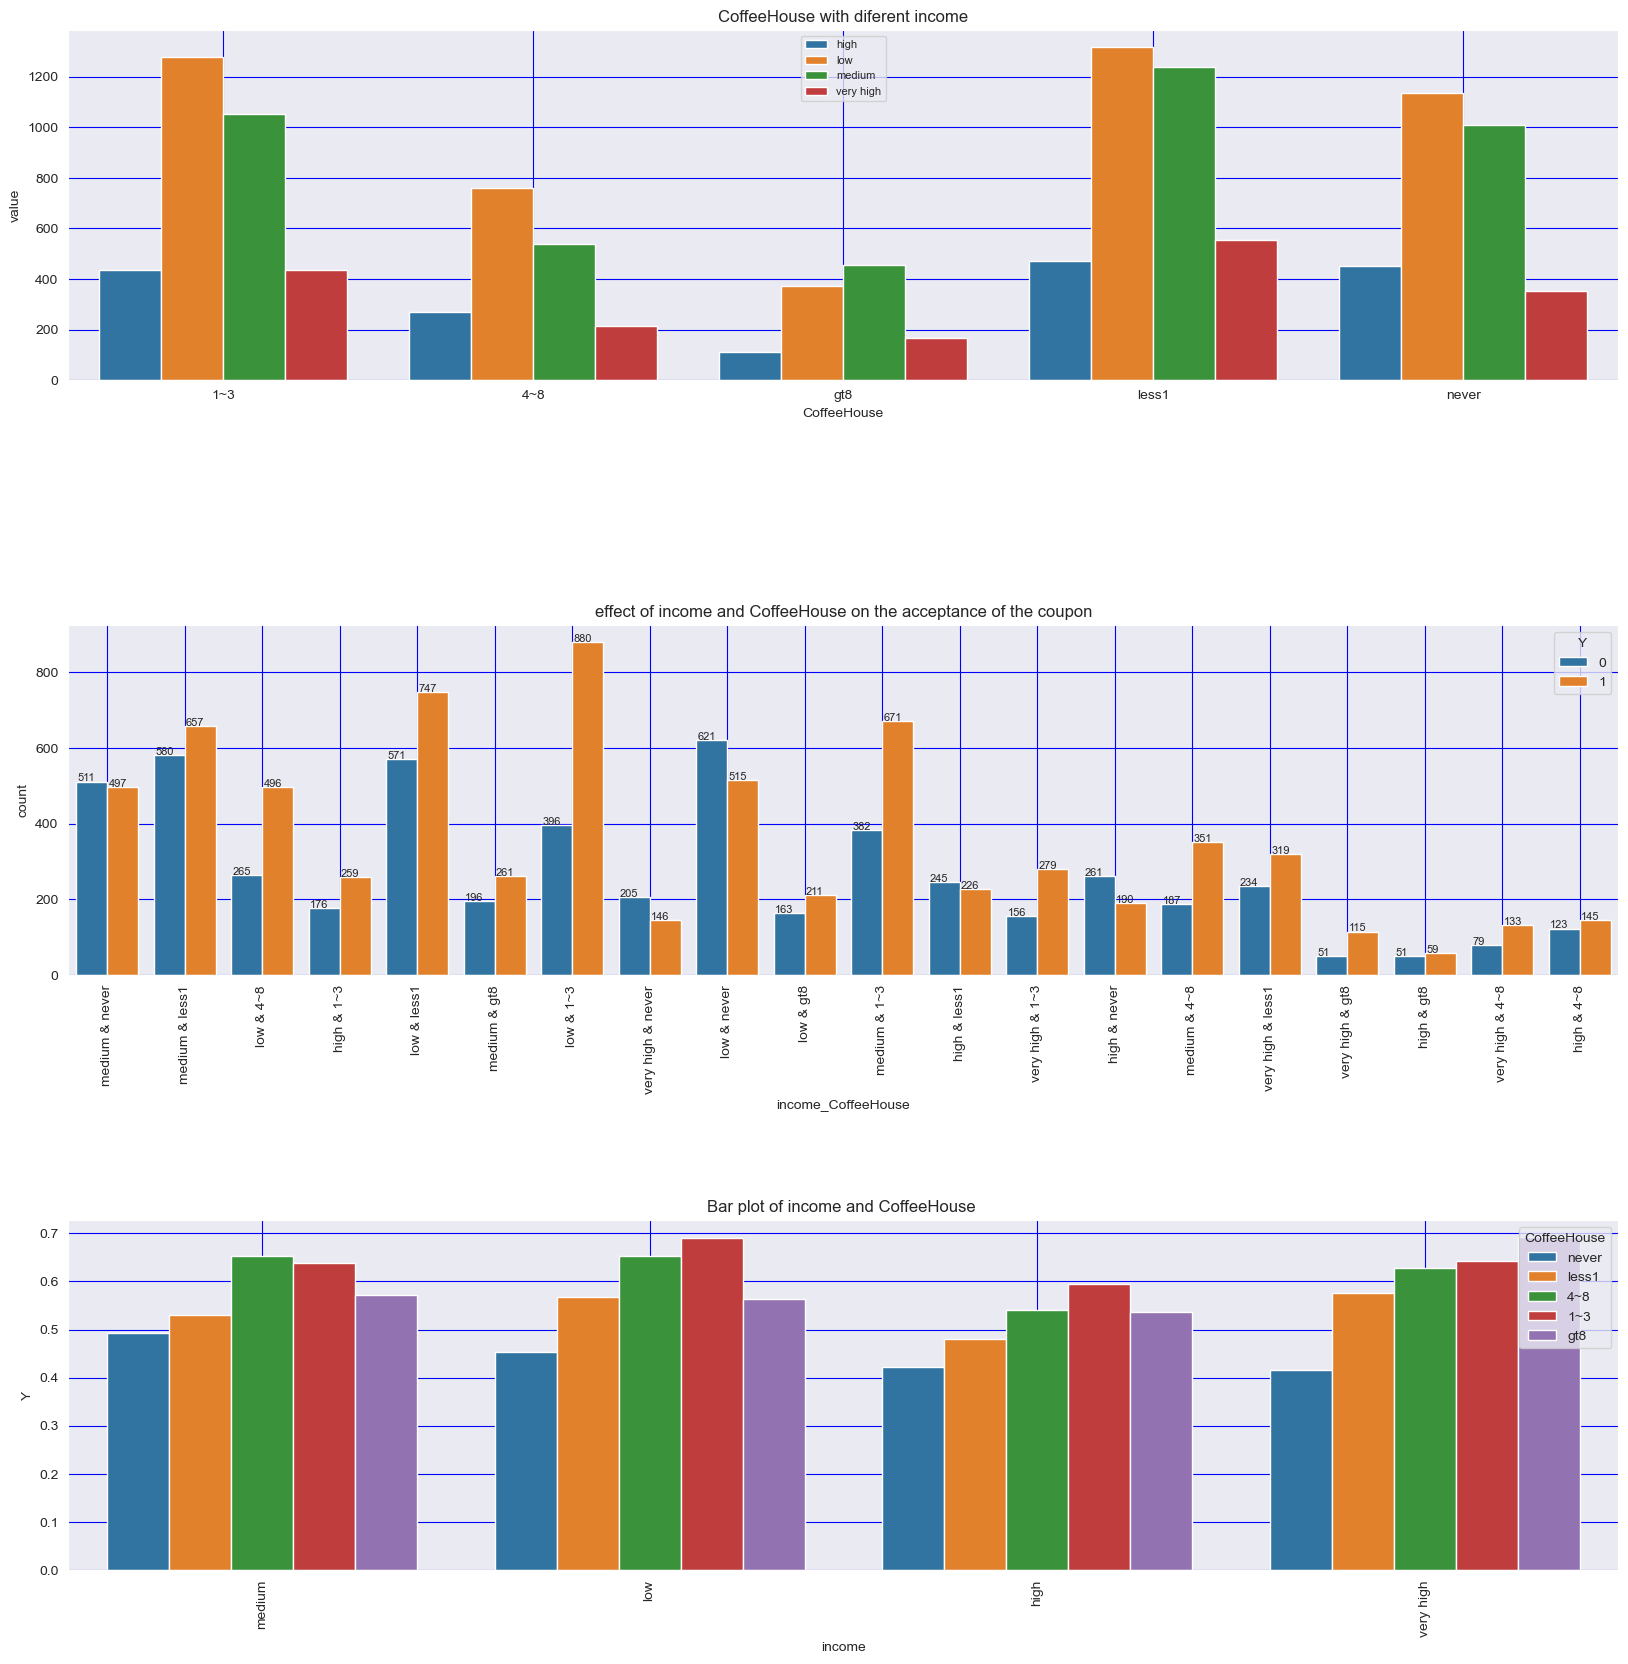

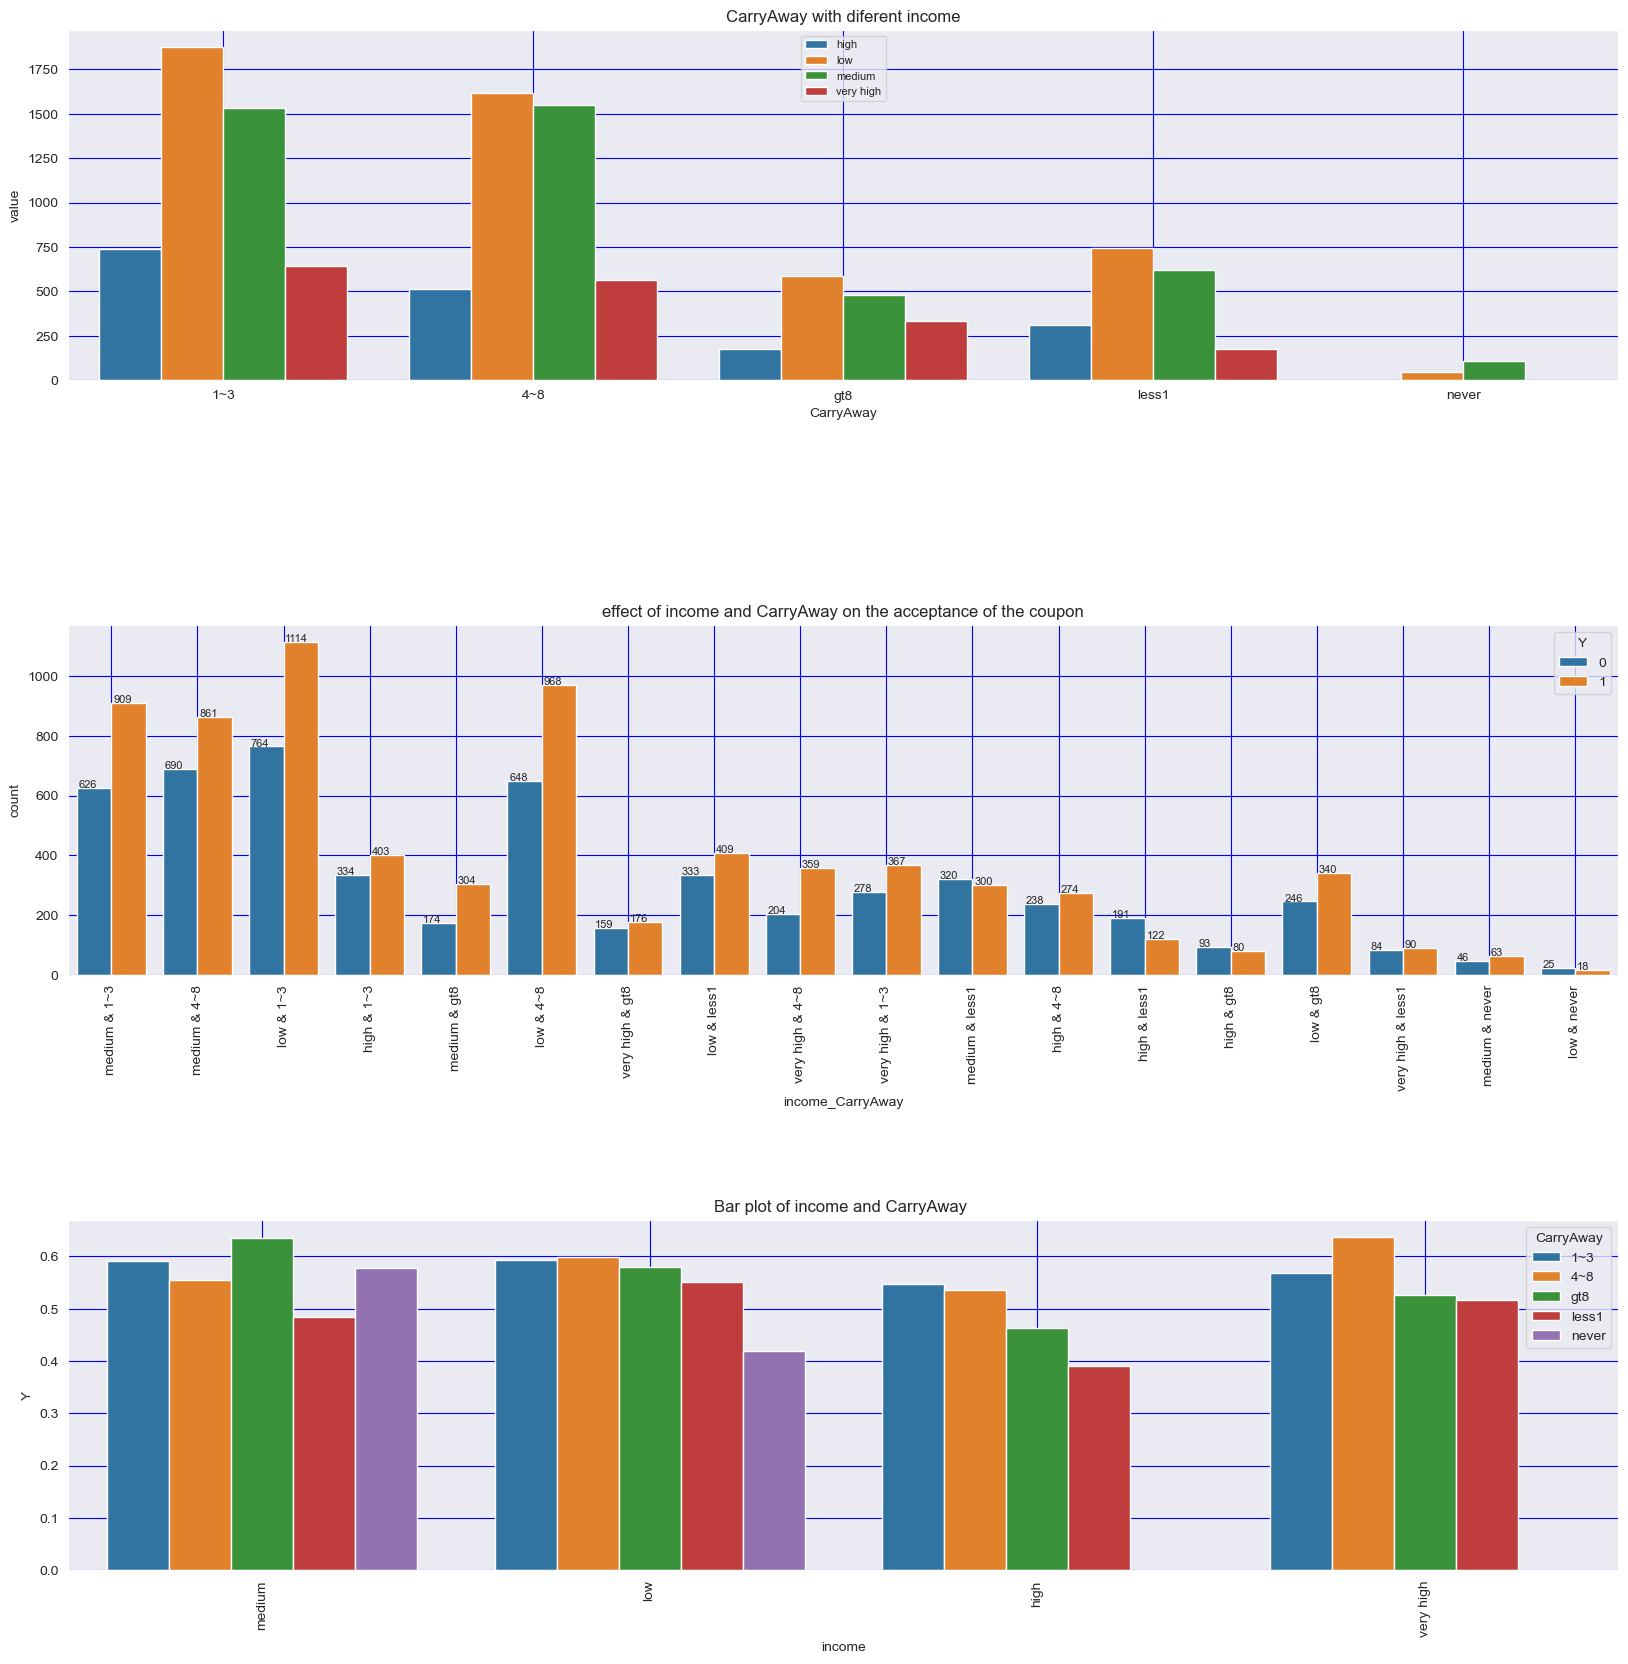

In [56]:
for feature in ['Bar', 'CoffeeHouse','CarryAway']:
    bivariate_analysis('income',feature,tempdf,'income',feature,feature + ' with diferent income','upper center')    
   

- People who have never tried the coupon before have a tendency to discard the recommendation, no matter what the coupon type or the individual's income level is.
- No matter the income level, people who have already been to one of the restaurants/cafes or carry away are likely to come back.
- For Bars best acceptance rate is for people with low level pay and visiting less tha 1 time per month
- For CoffeHouse Coupons people with low income level and visiting 1 to 3 times have the best acceptance rate
- People with low incomes and a habit of carrying away are a bit  likely to accept the coupon and also people across all pay levels with the habit of CarryAway and are more likely to accept the coupon again.

#### 6 Effect of education and  number of visits to different  types of Restaurant/cafes

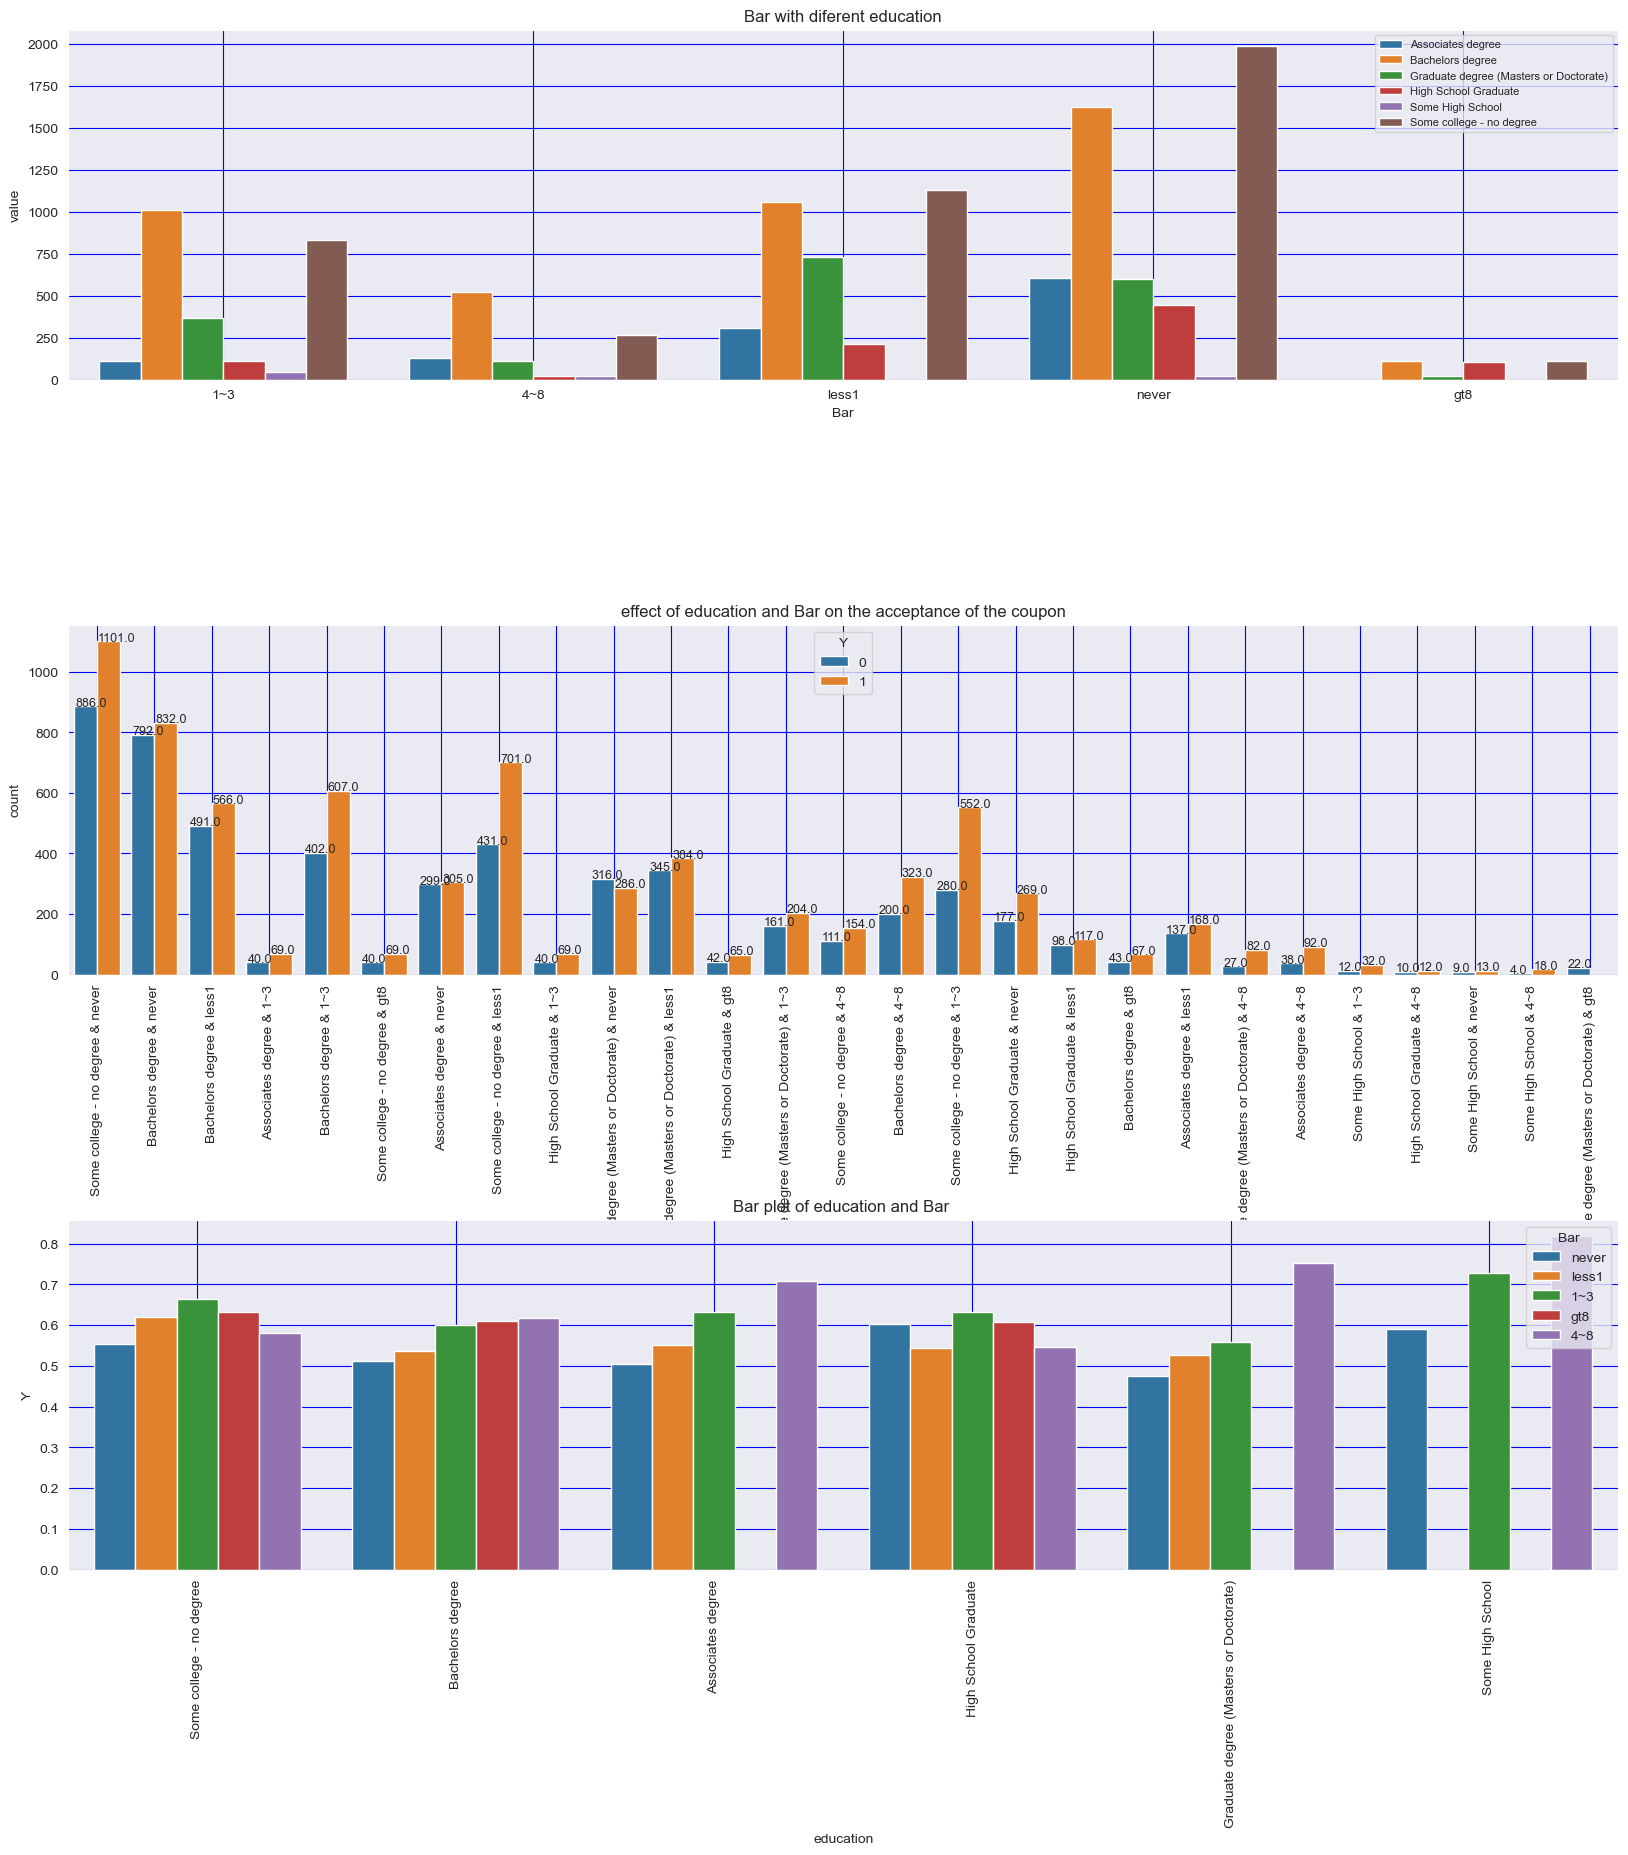

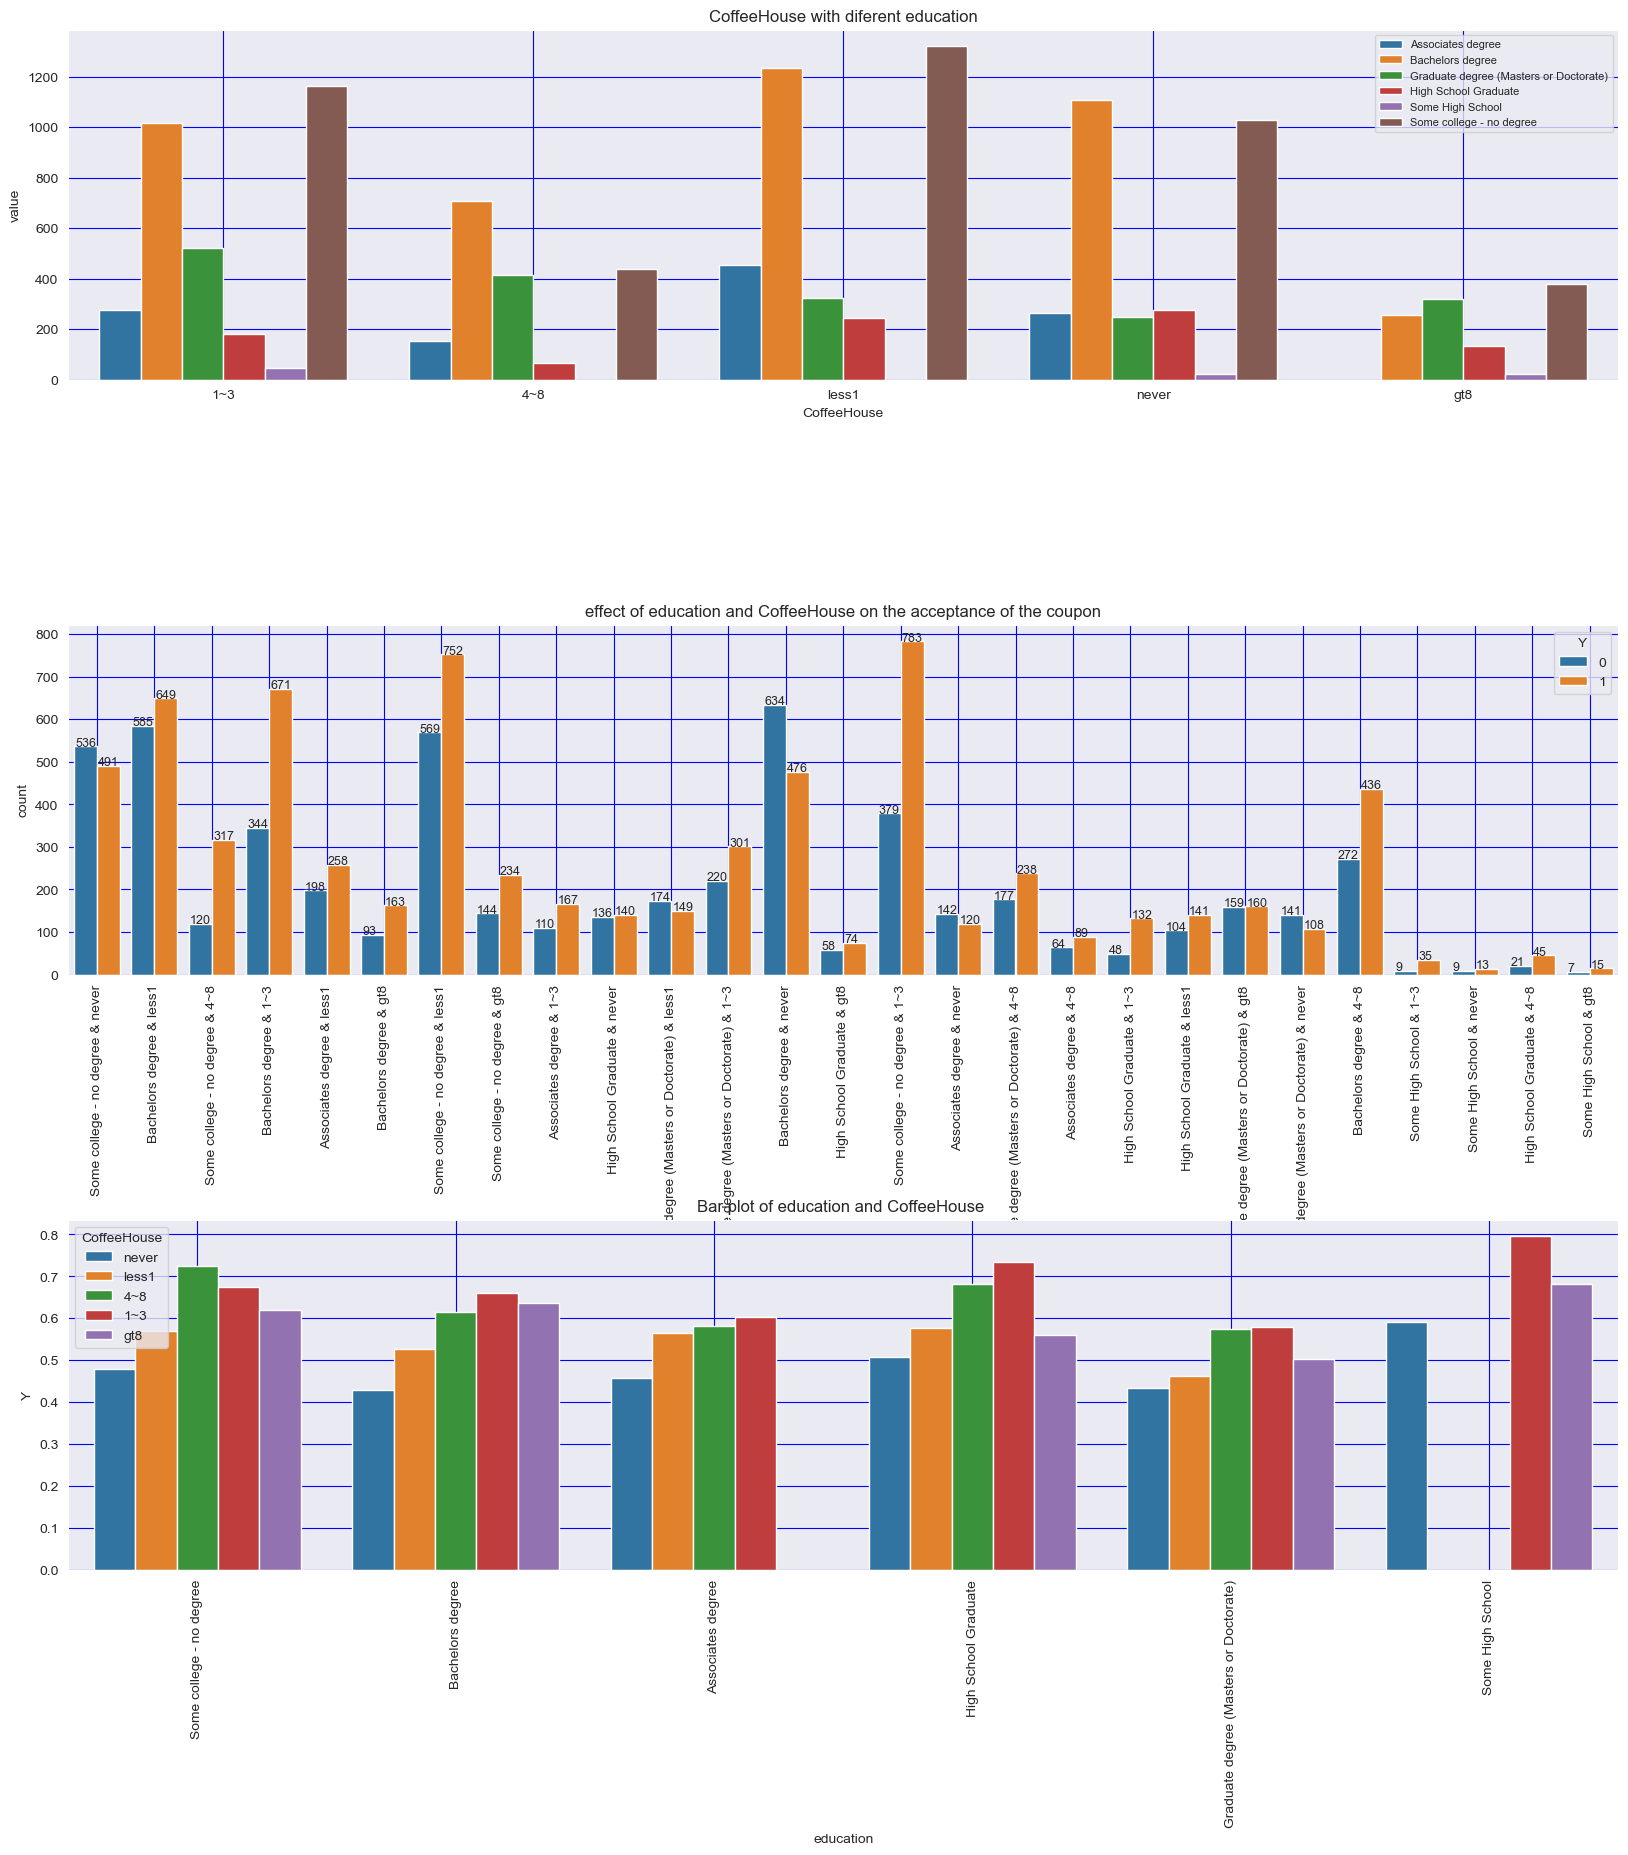

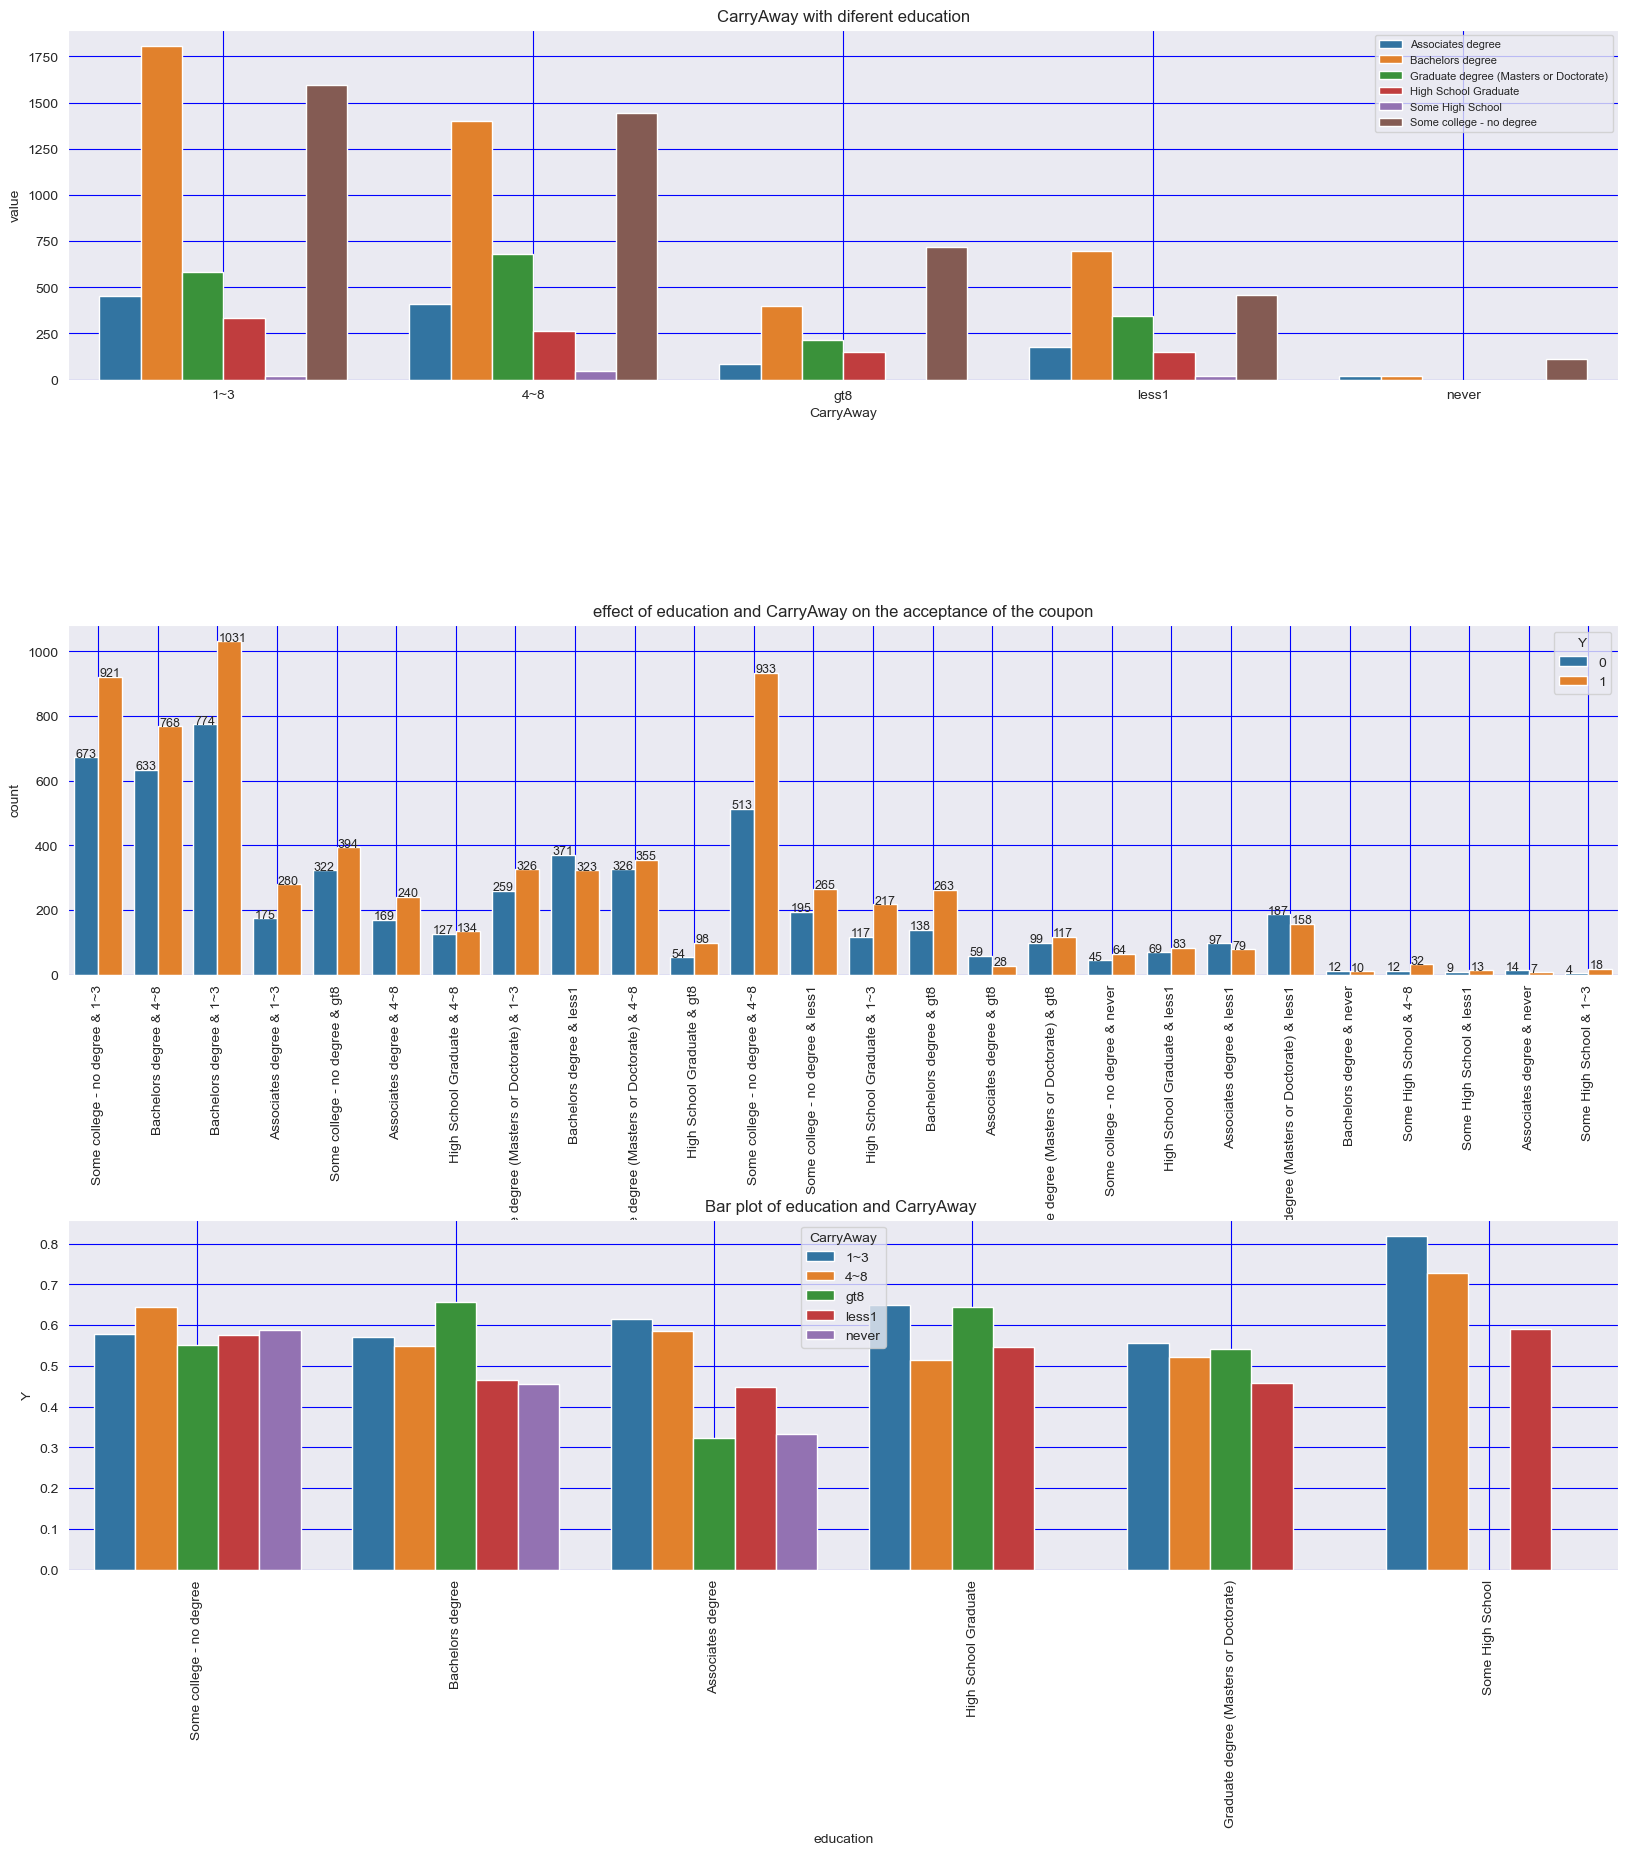

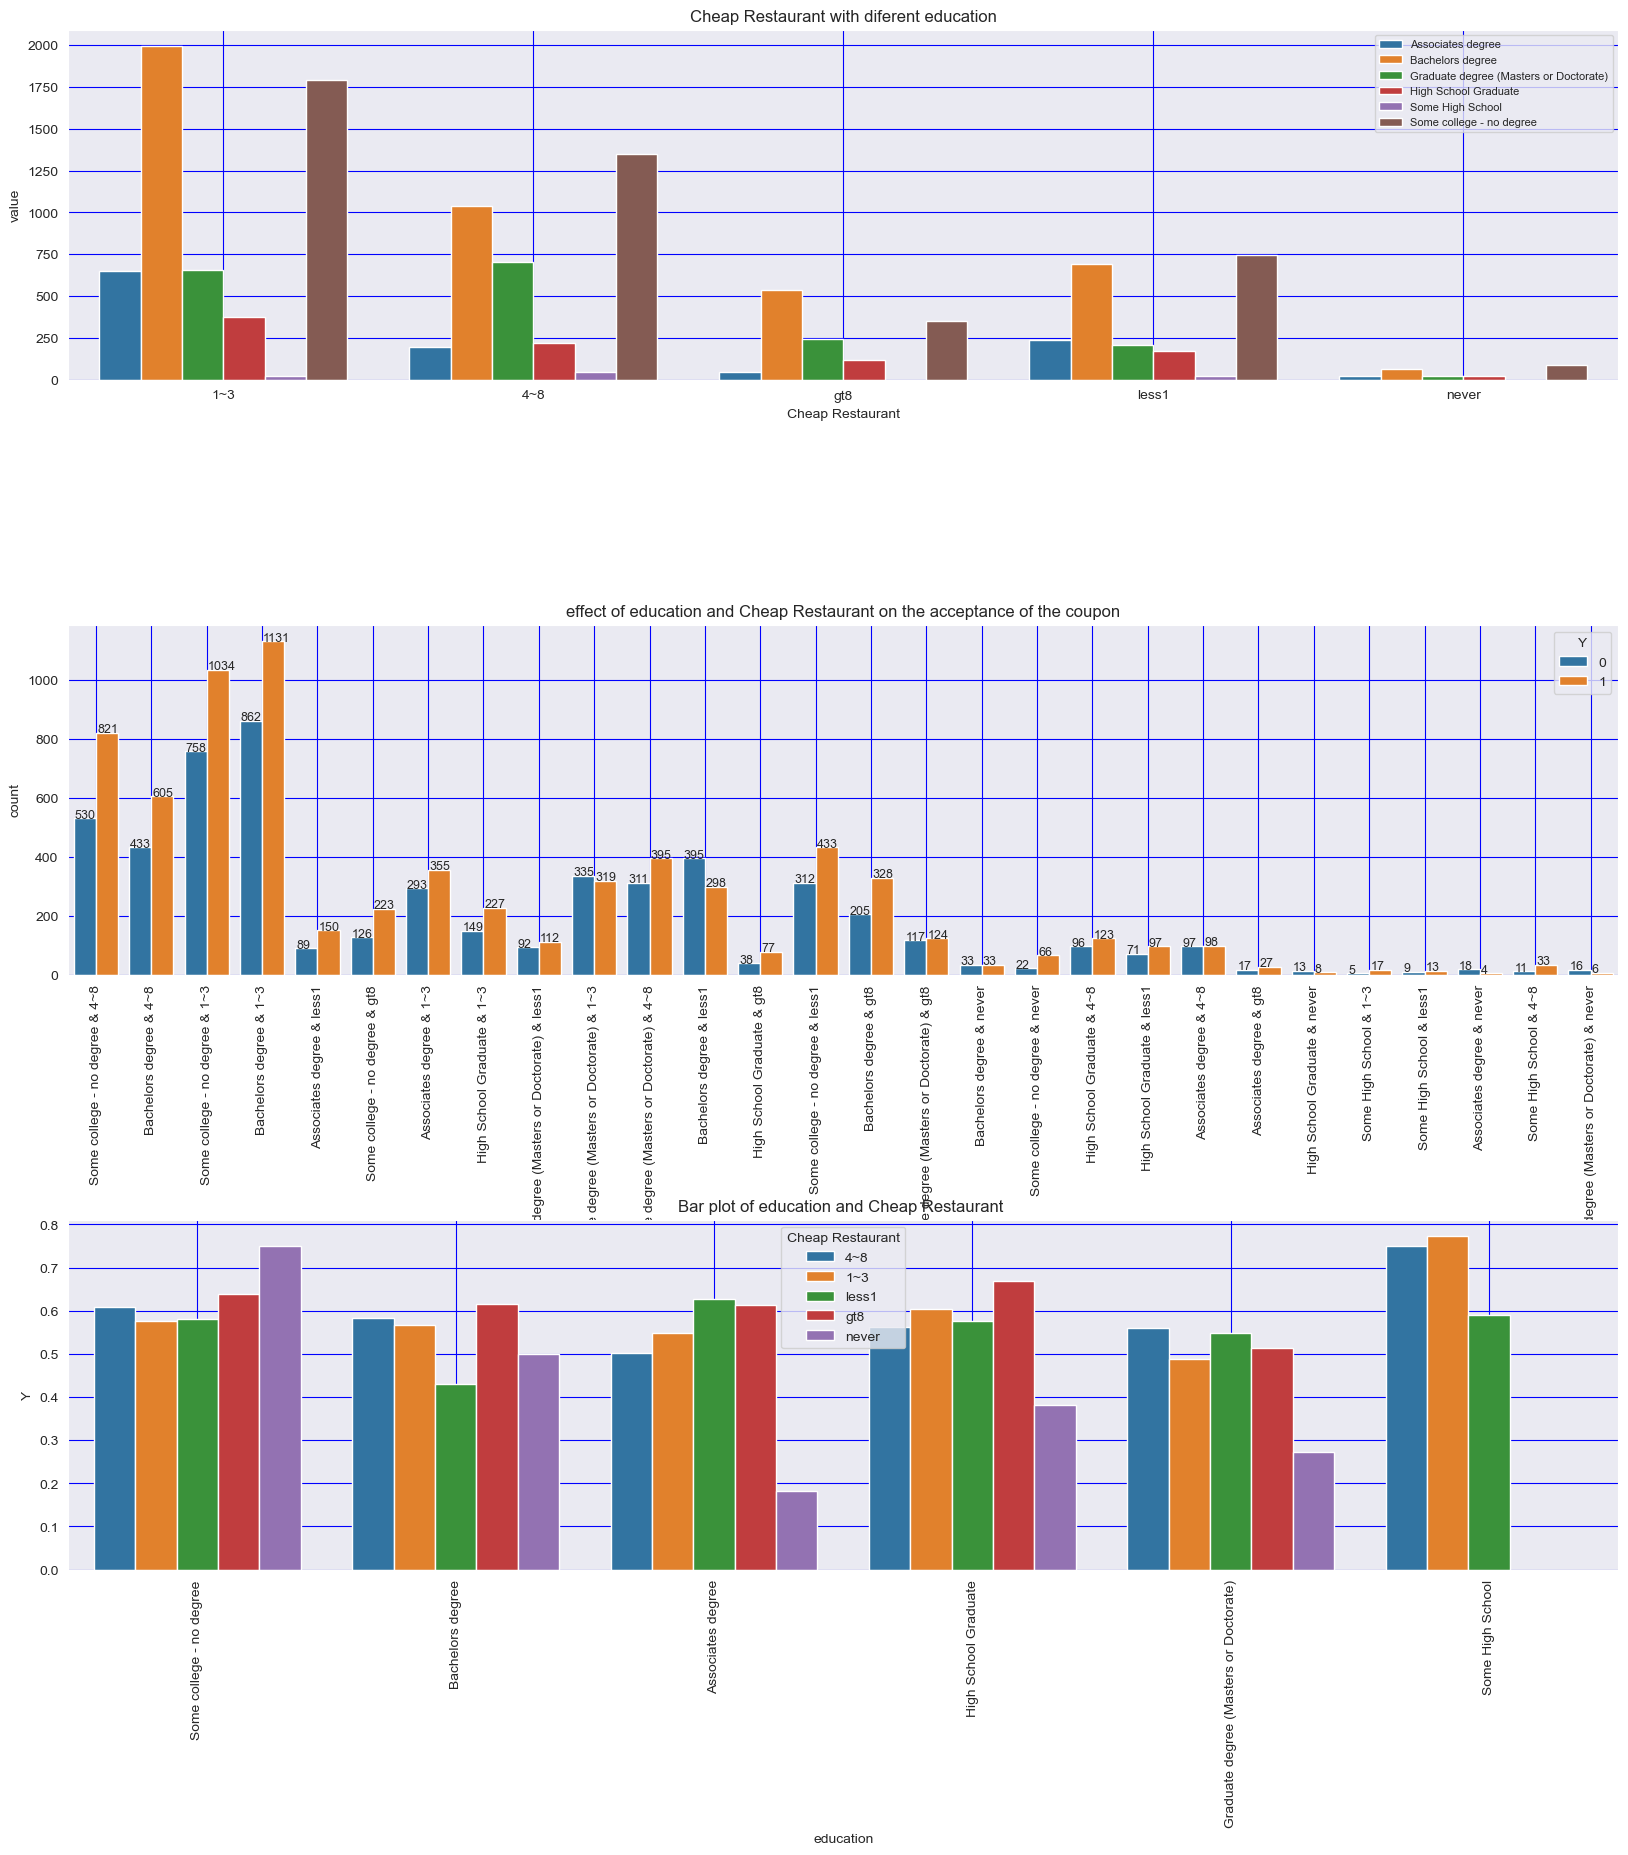

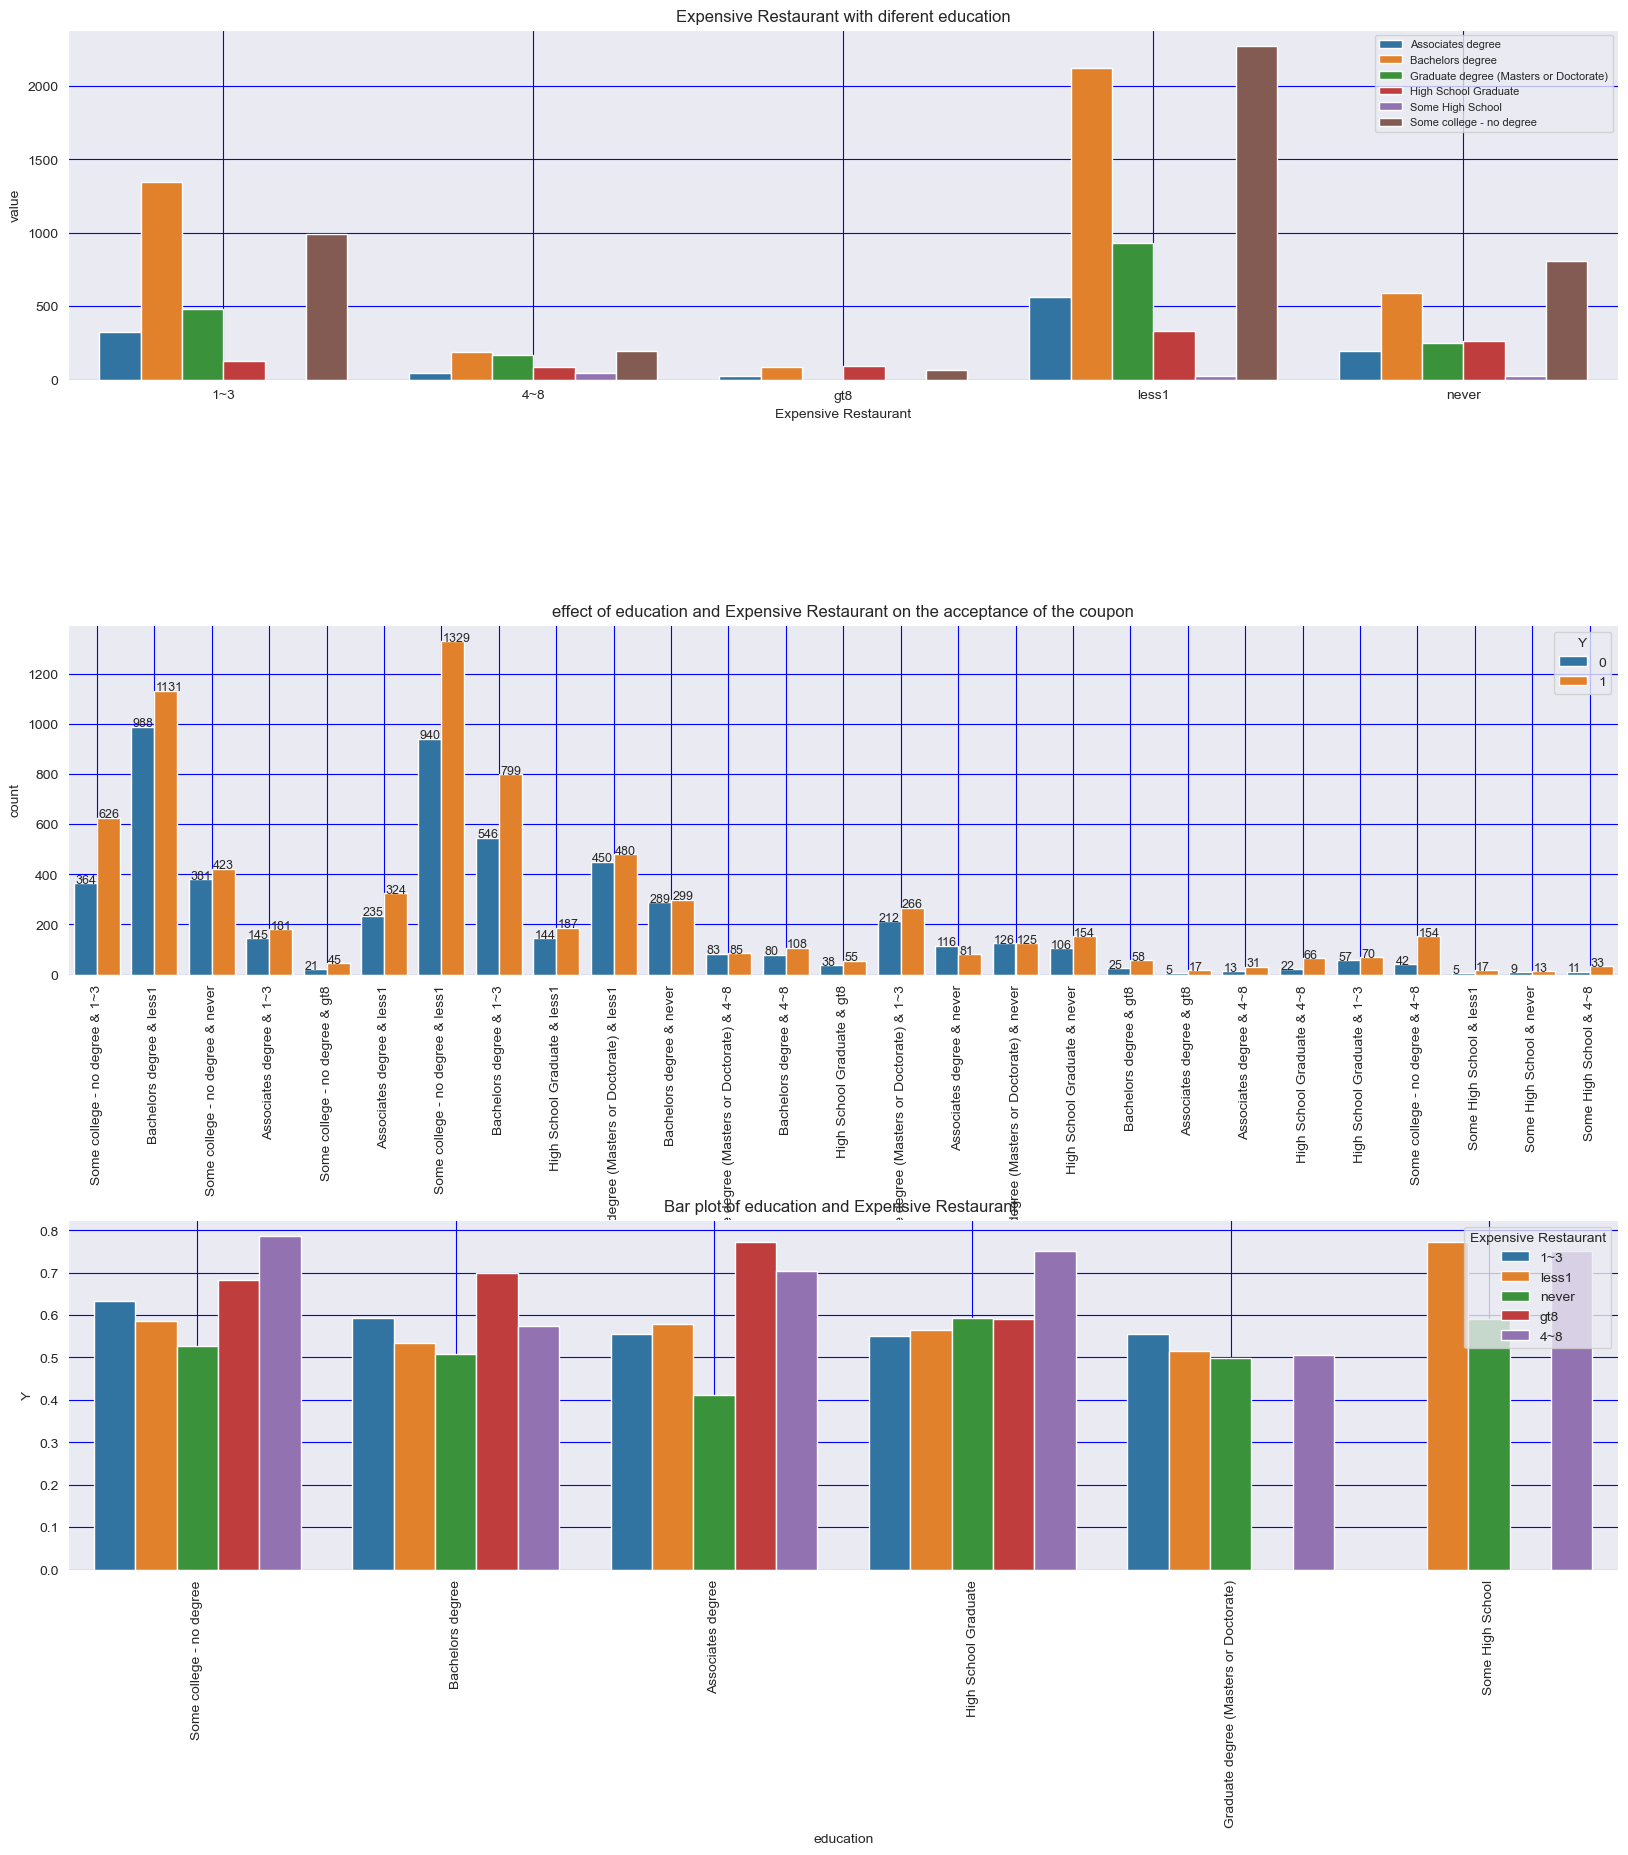

In [57]:
for feature in ['Bar', 'CoffeeHouse','CarryAway', 'Cheap Restaurant', 'Expensive Restaurant']:
    bivariate_analysis('education',feature,tempdf,'education',feature,feature + ' with diferent education','upper right',rotation2=90,annotation_fontsize=9)                    

- As the education level goes up chances of accepting the 'Bar' coupon decreases
-  frequent Bar coustomers are likely to accept the coupon regardless of the education level
- Carry Away coupons have the one of the best chances of acceptances across all education levels and even more for the frequent users
- People prefer cheap restaurants over expensive ones most of the times

#### 7 Effect of gender and  Number of visits to different types of cafes

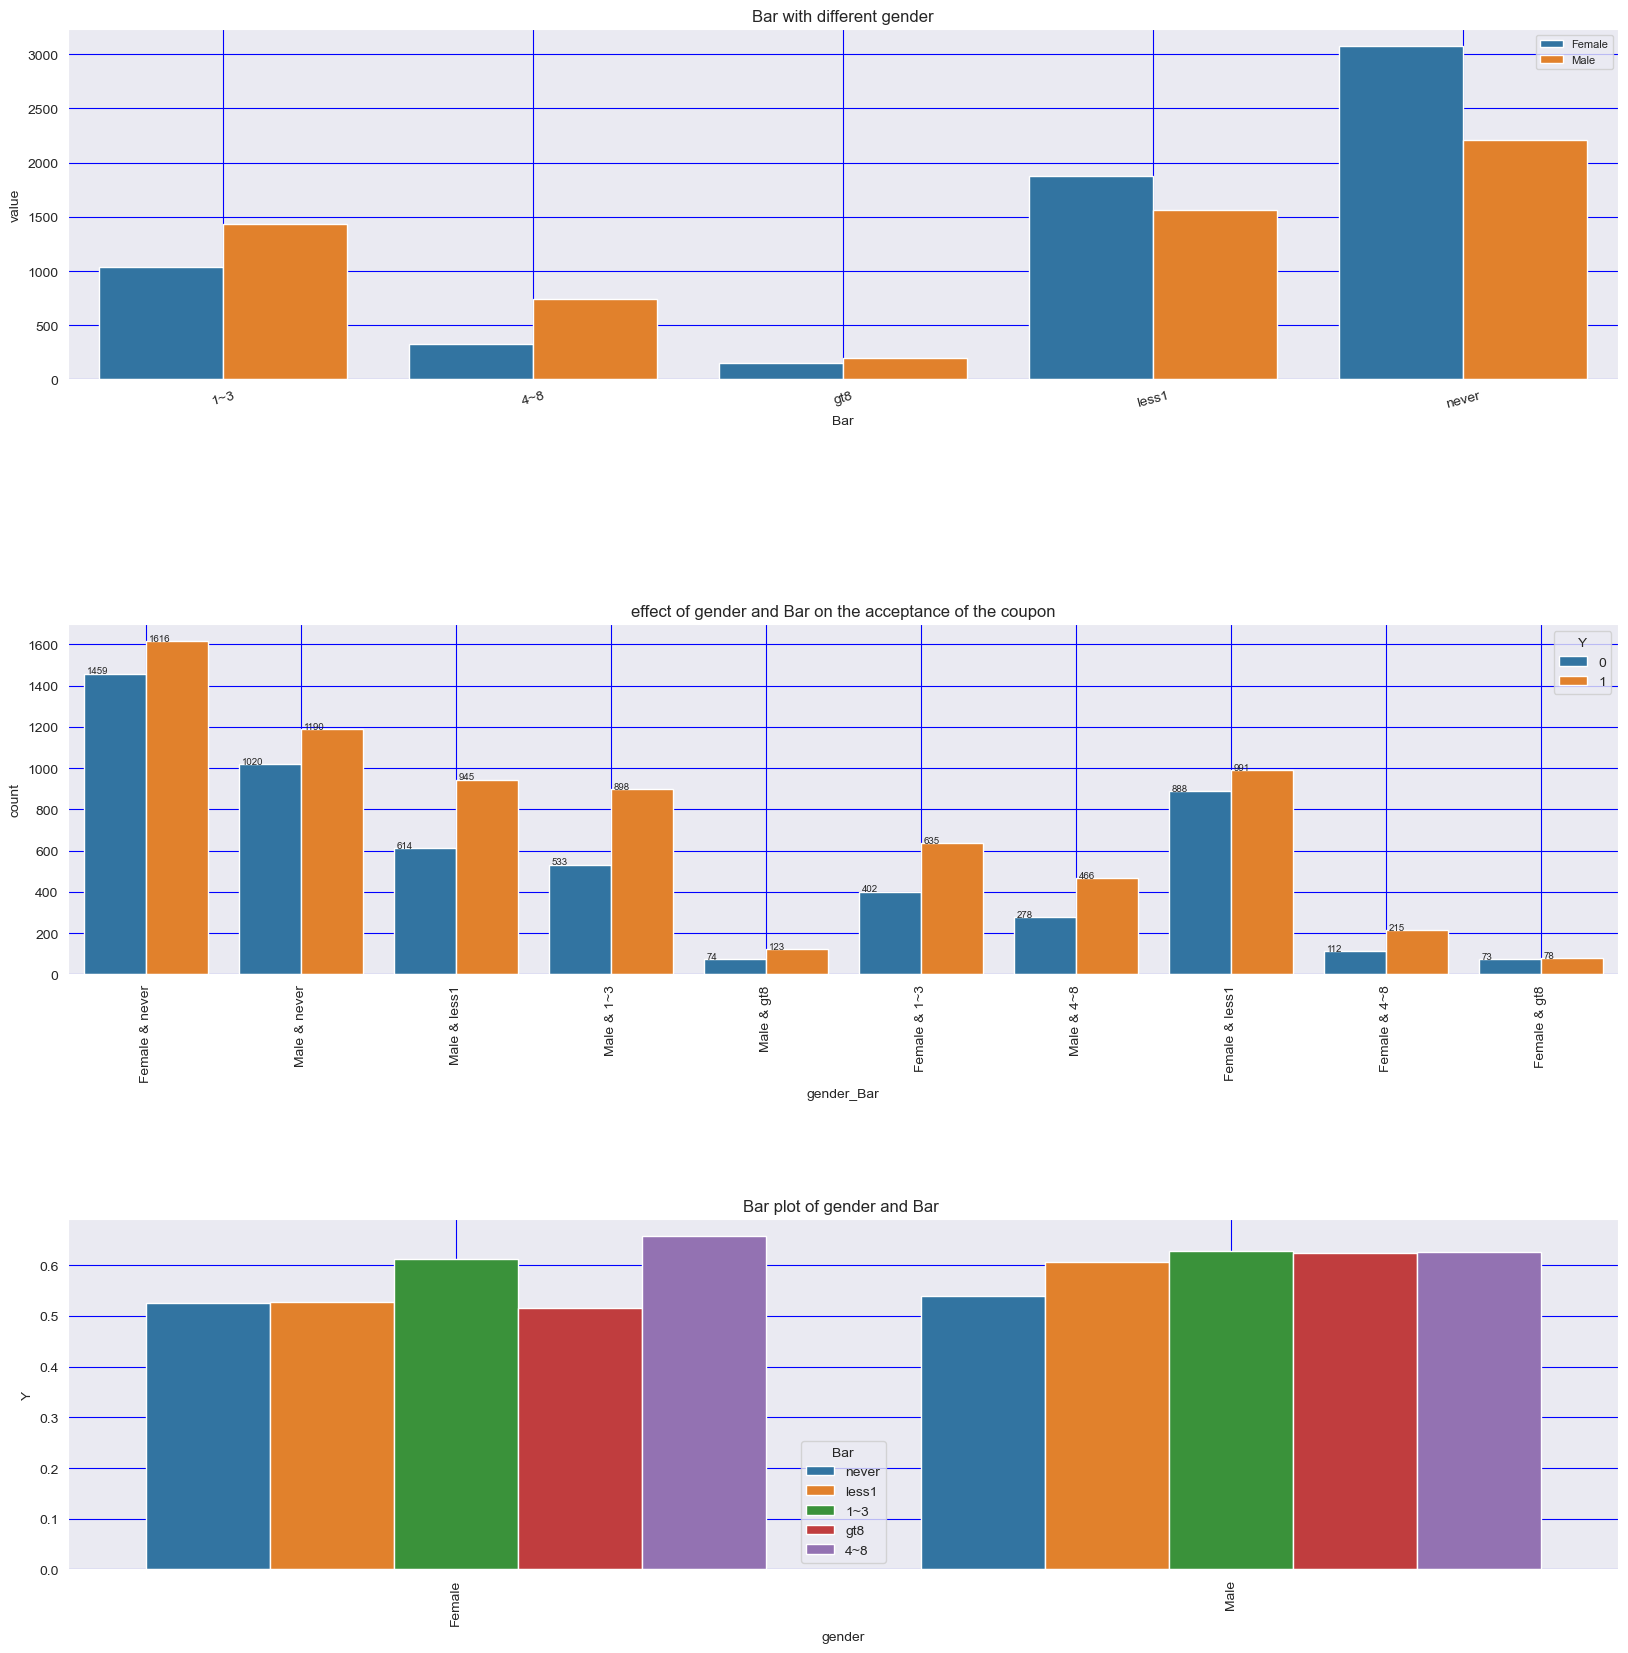

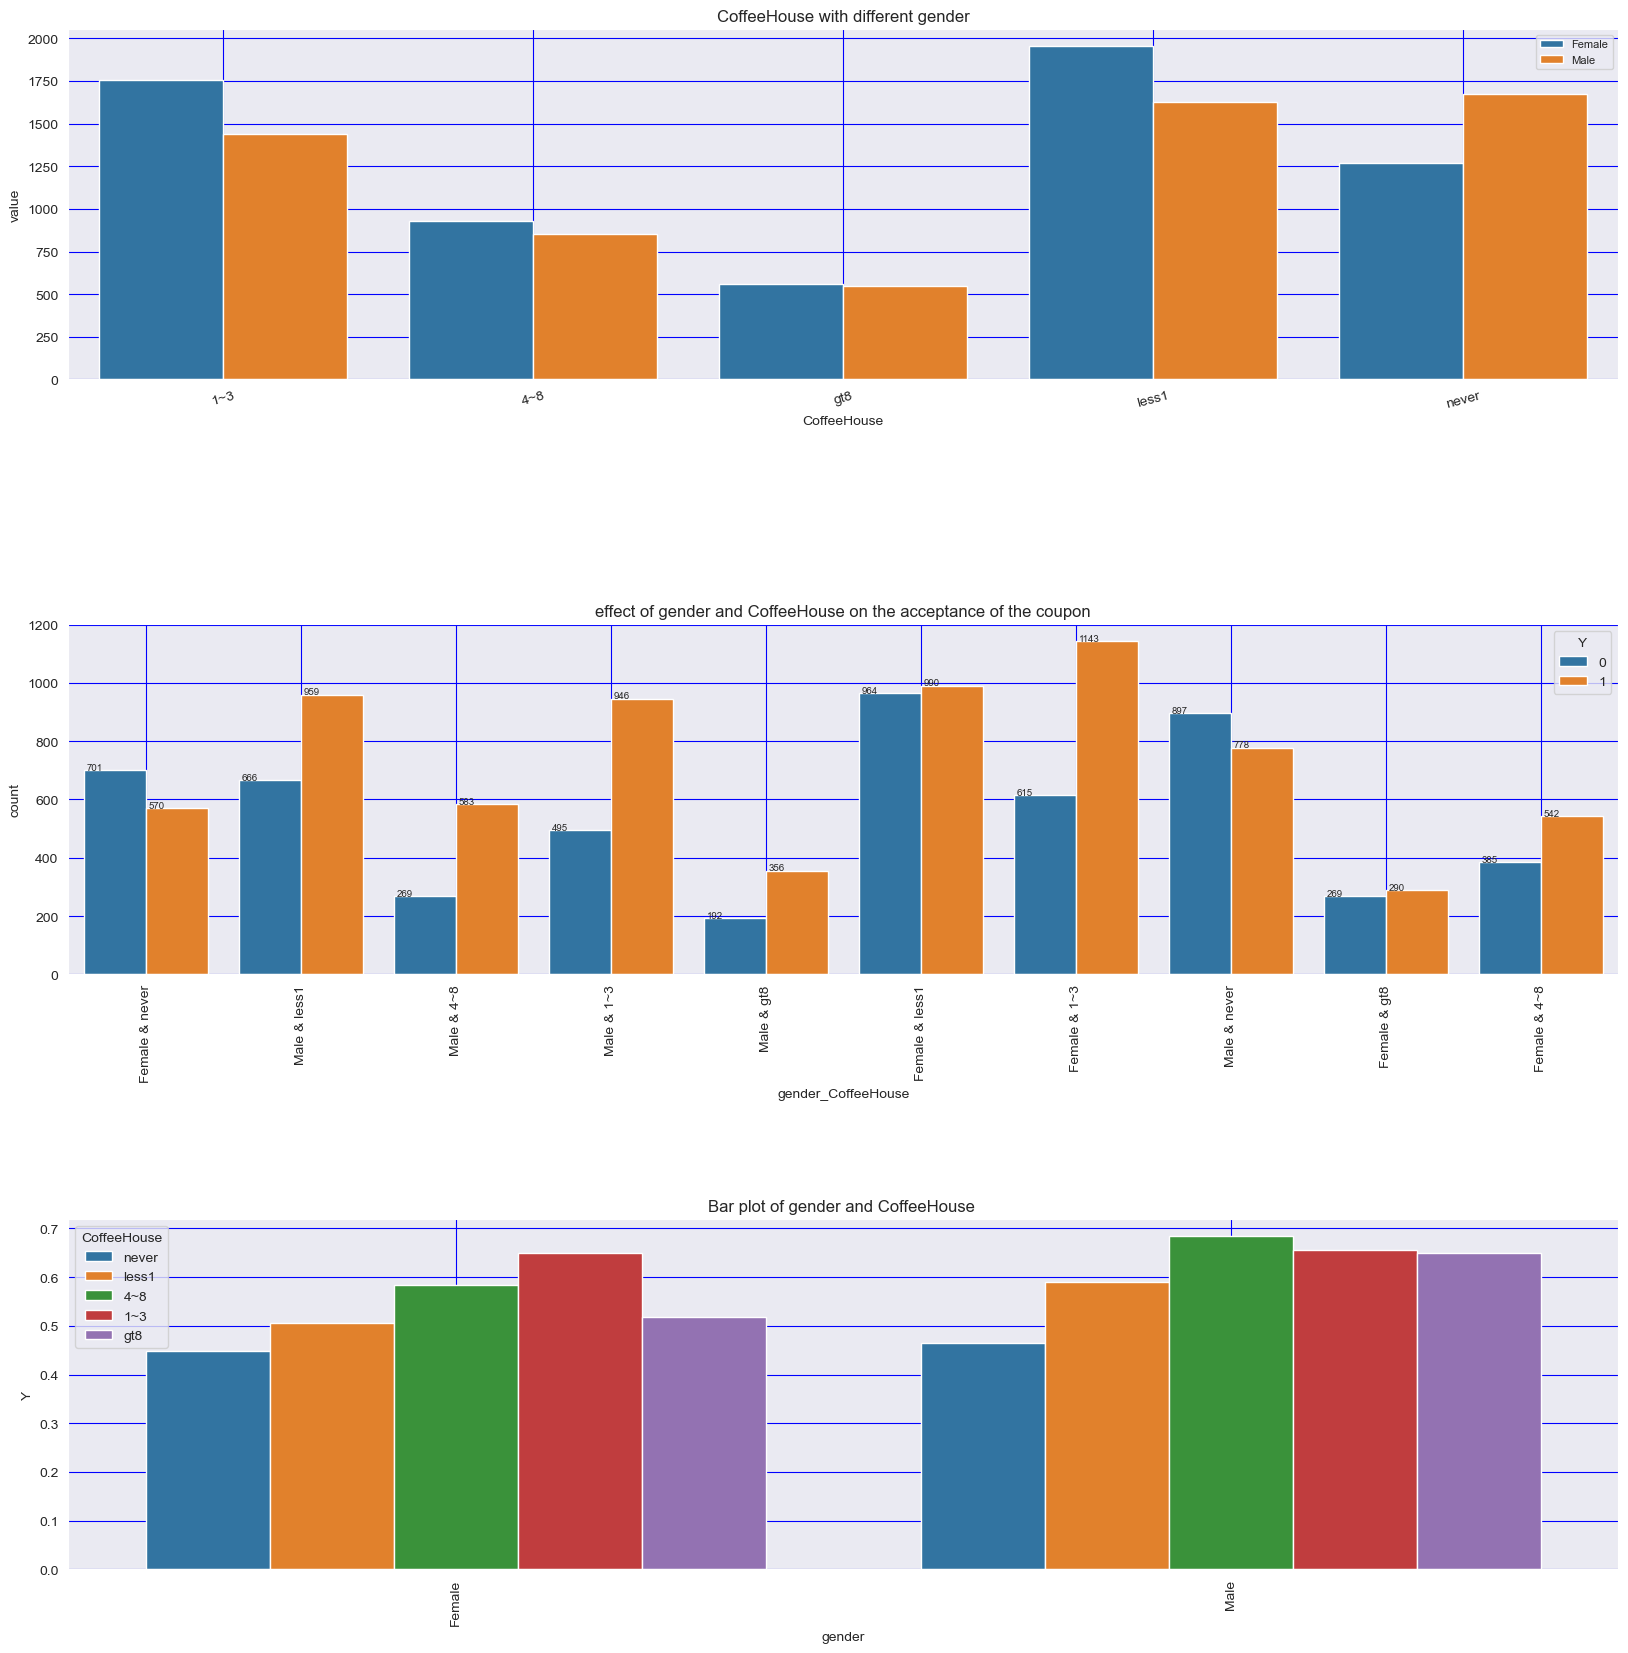

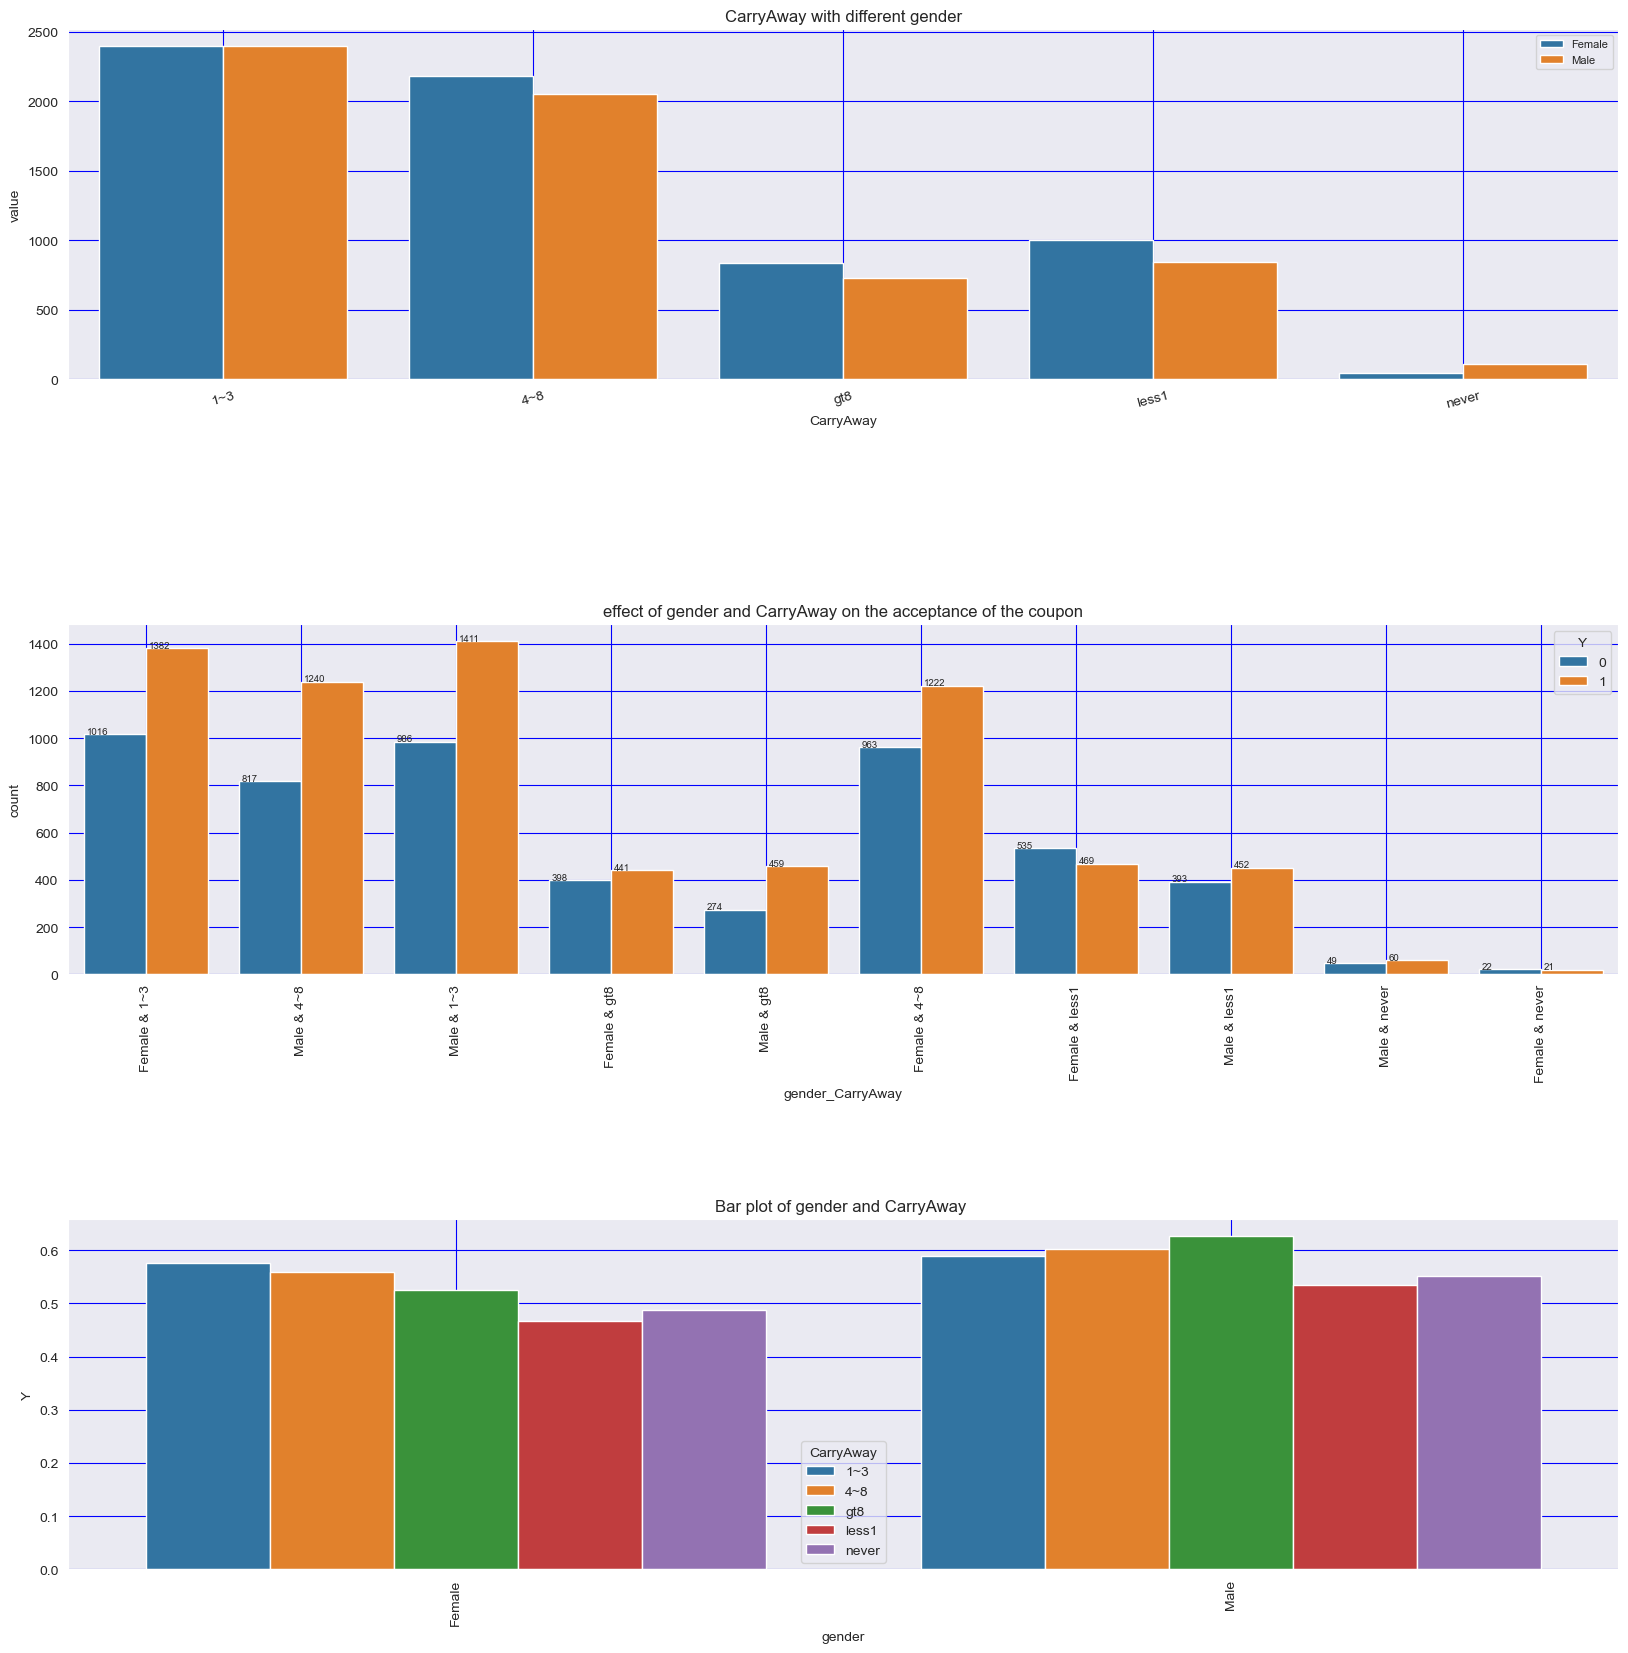

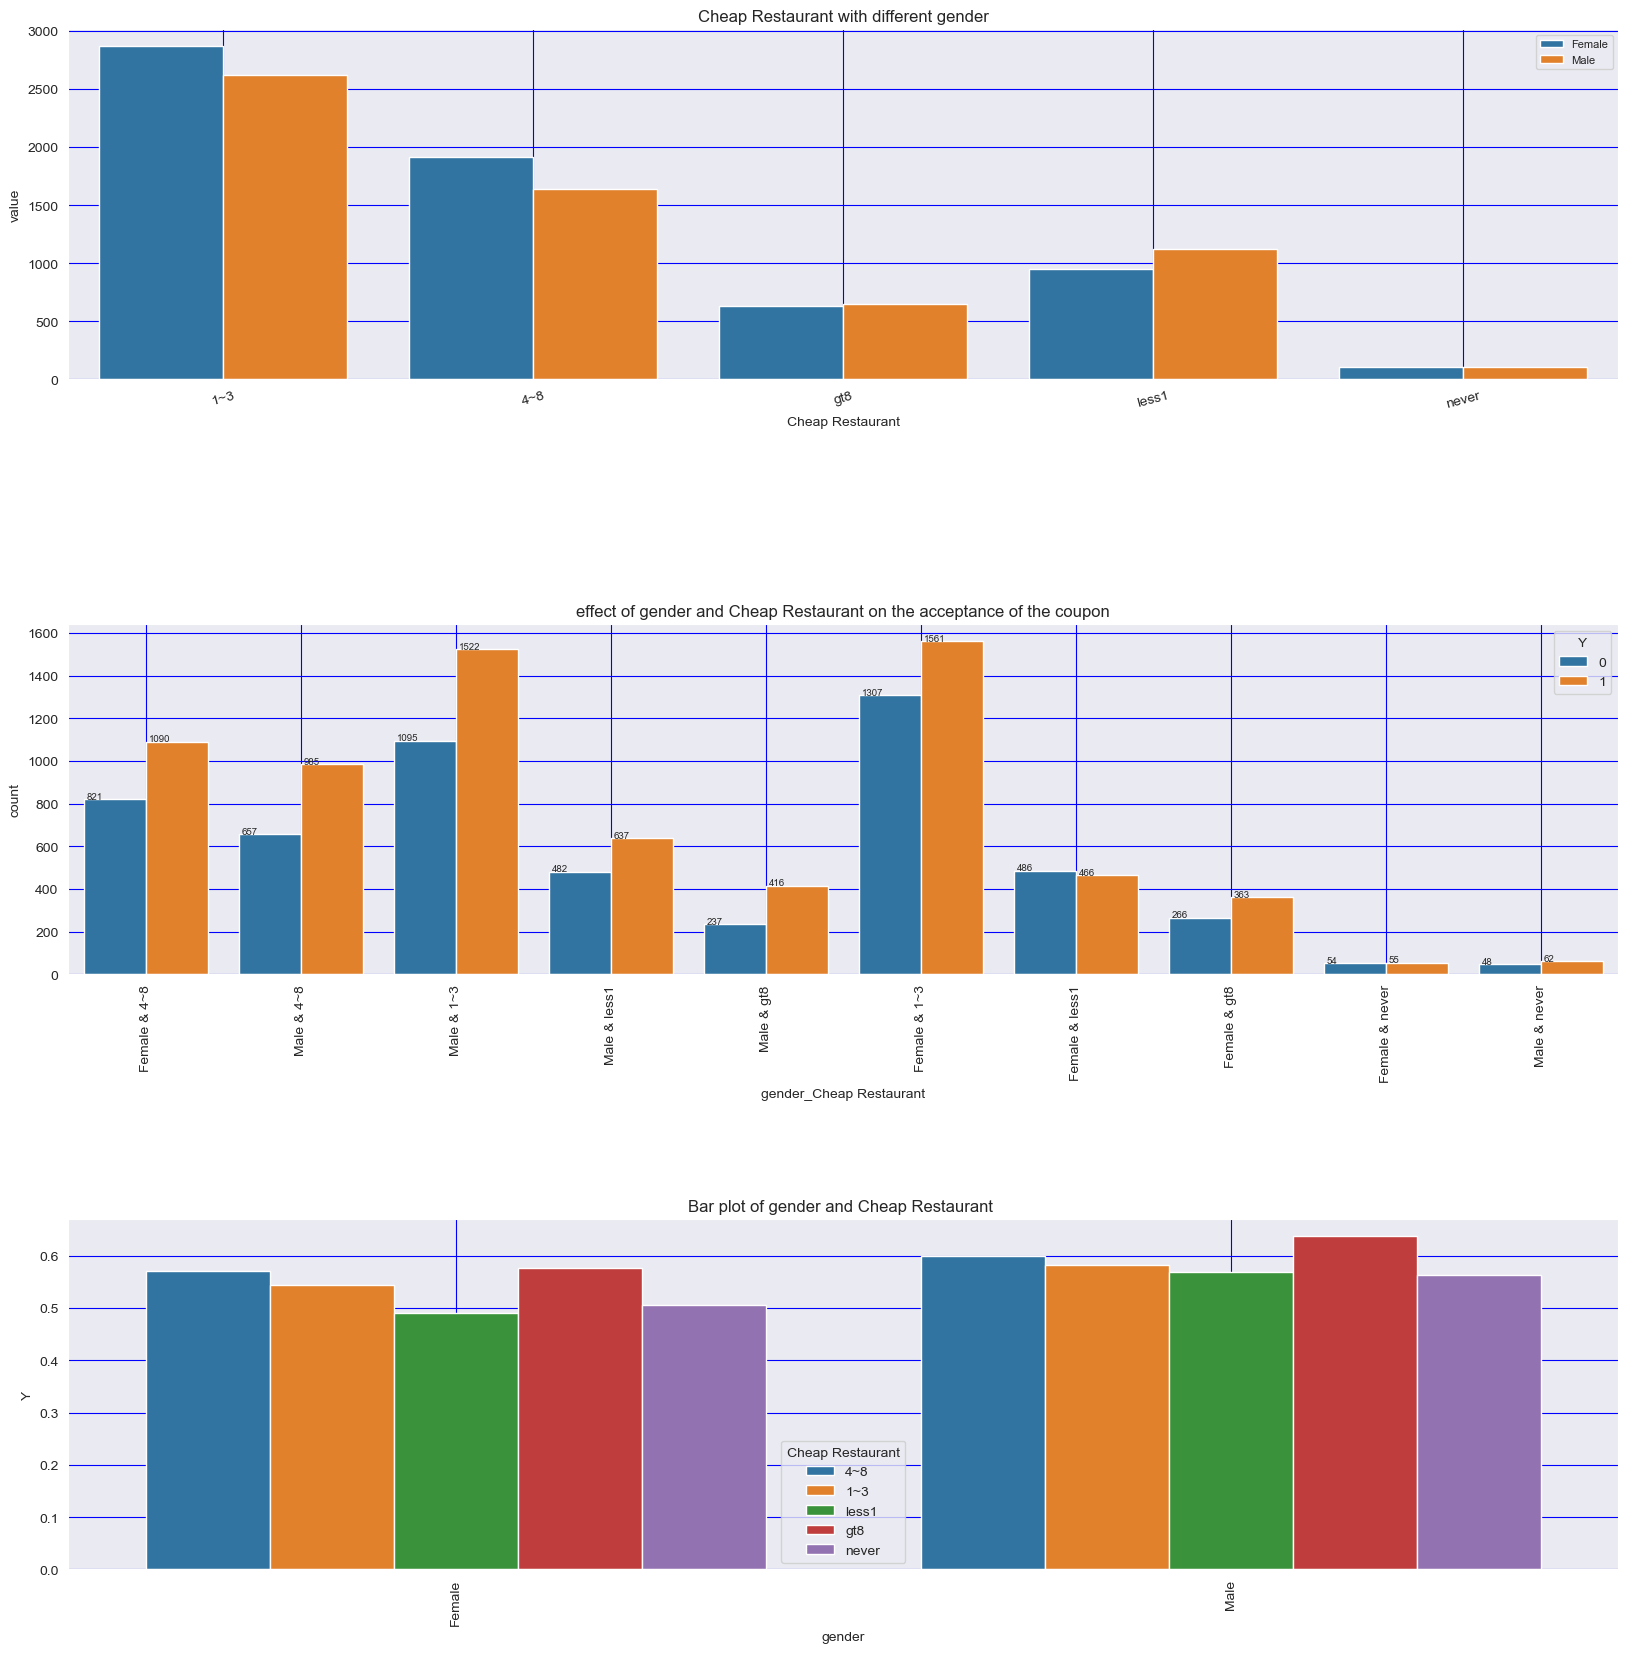

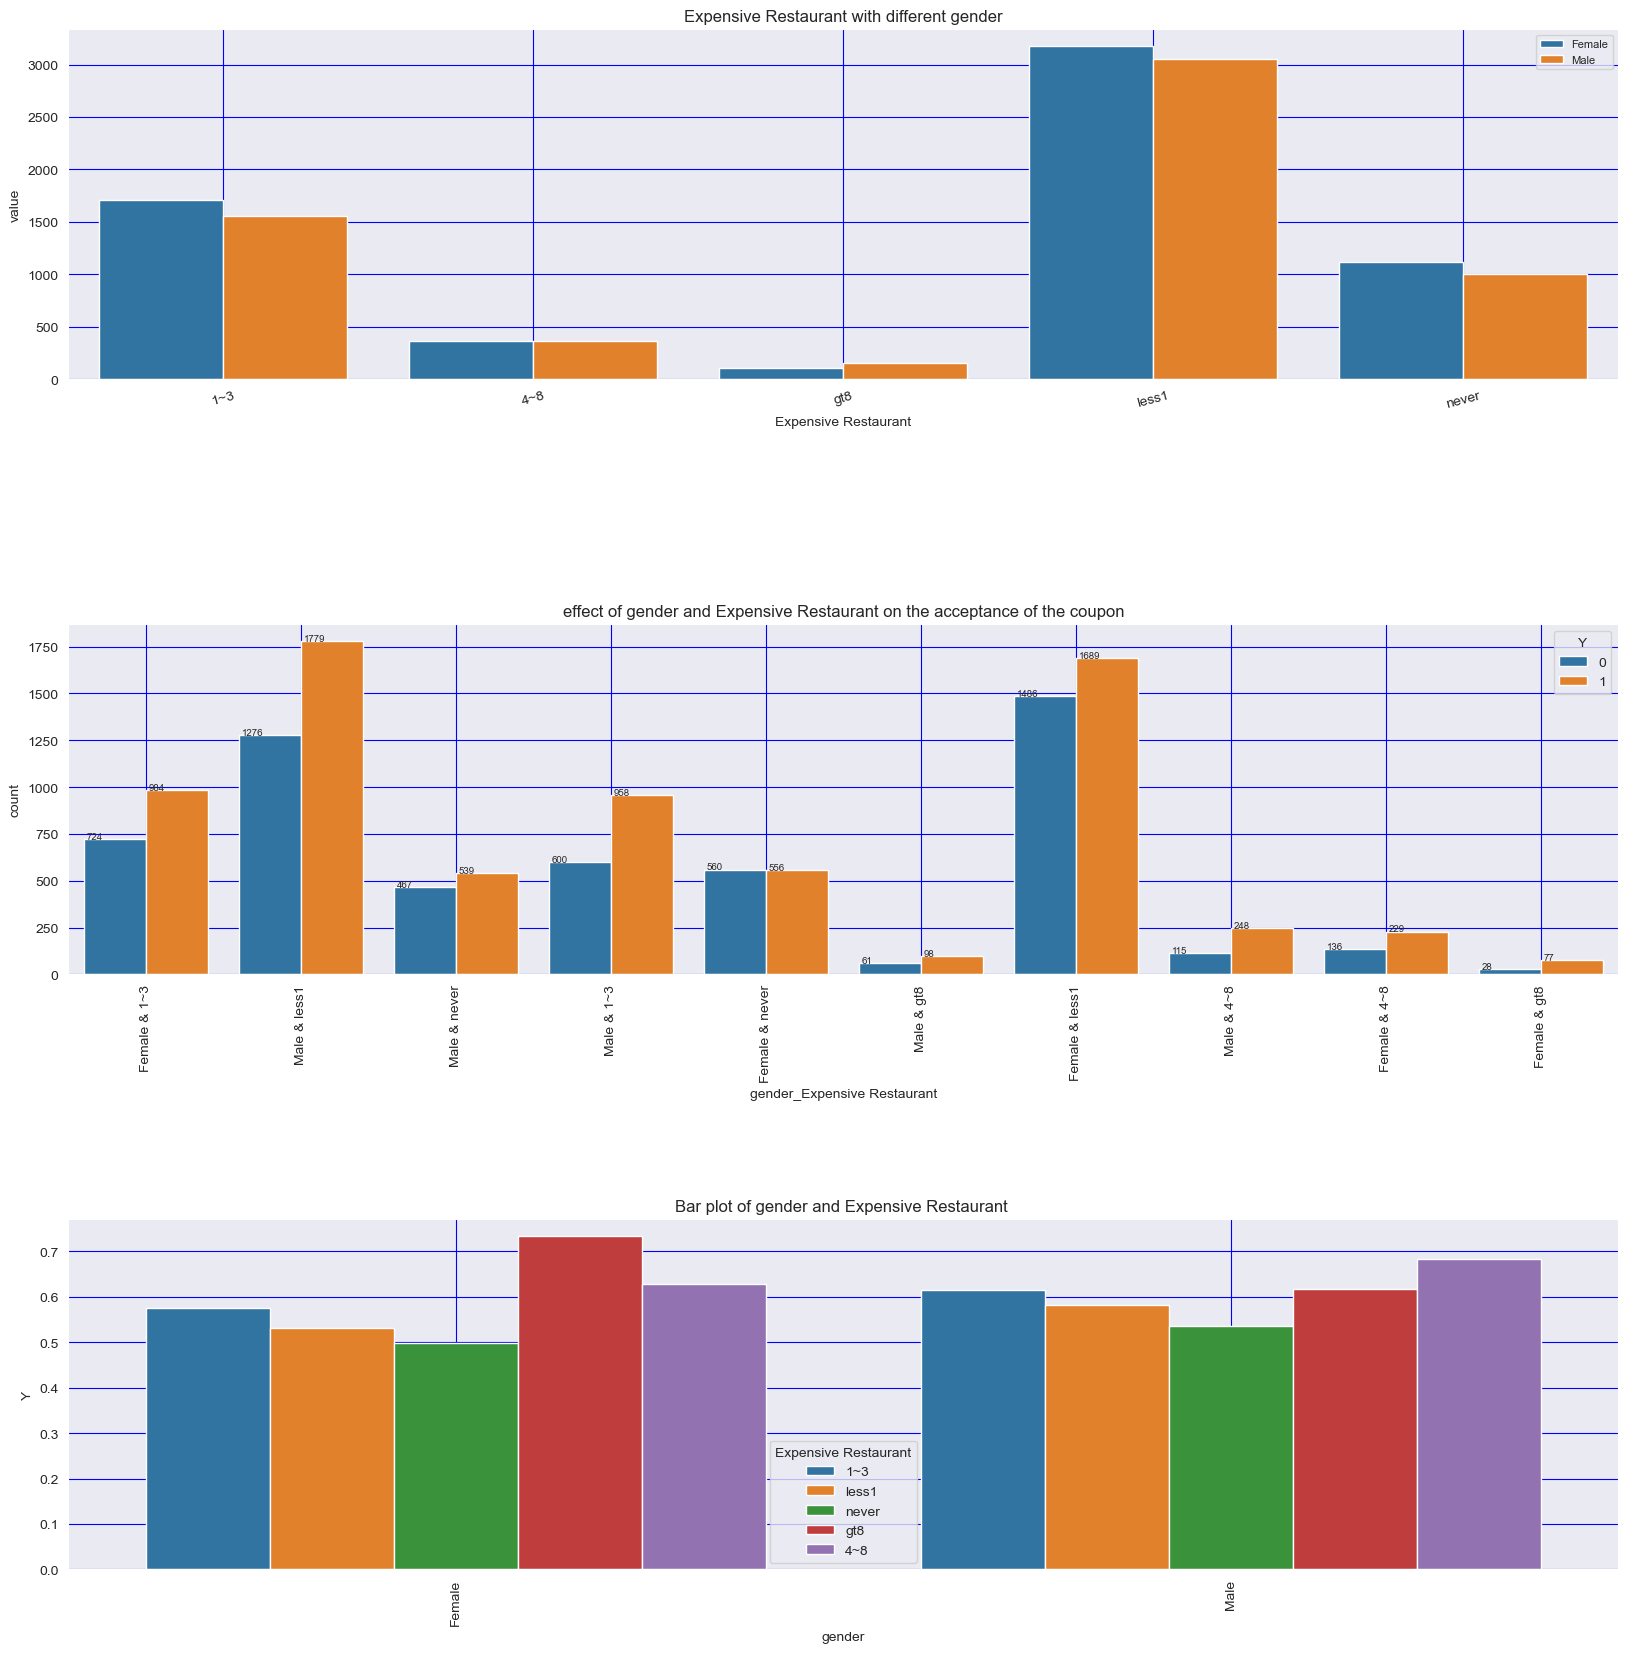

In [58]:
for feature in ['Bar', 'CoffeeHouse','CarryAway', 'Cheap Restaurant', 'Expensive Restaurant']:
    bivariate_analysis('gender',feature,tempdf,'gender',feature,feature + ' with different gender','upper right',rotation1=15,annotation_fontsize=7)
                   

- For every coupon type except fot Bar if someone accepts them frequently they are more likely to accept the coupon as comapred to those who never use that type of coupon
-  For 'Bar' coupon eveen if someone hss never used that coupon he/she has more than 60% chances of accepting the coupon
- There is no drastic difference between the choices of male and female

#### 8 Income and coupon type

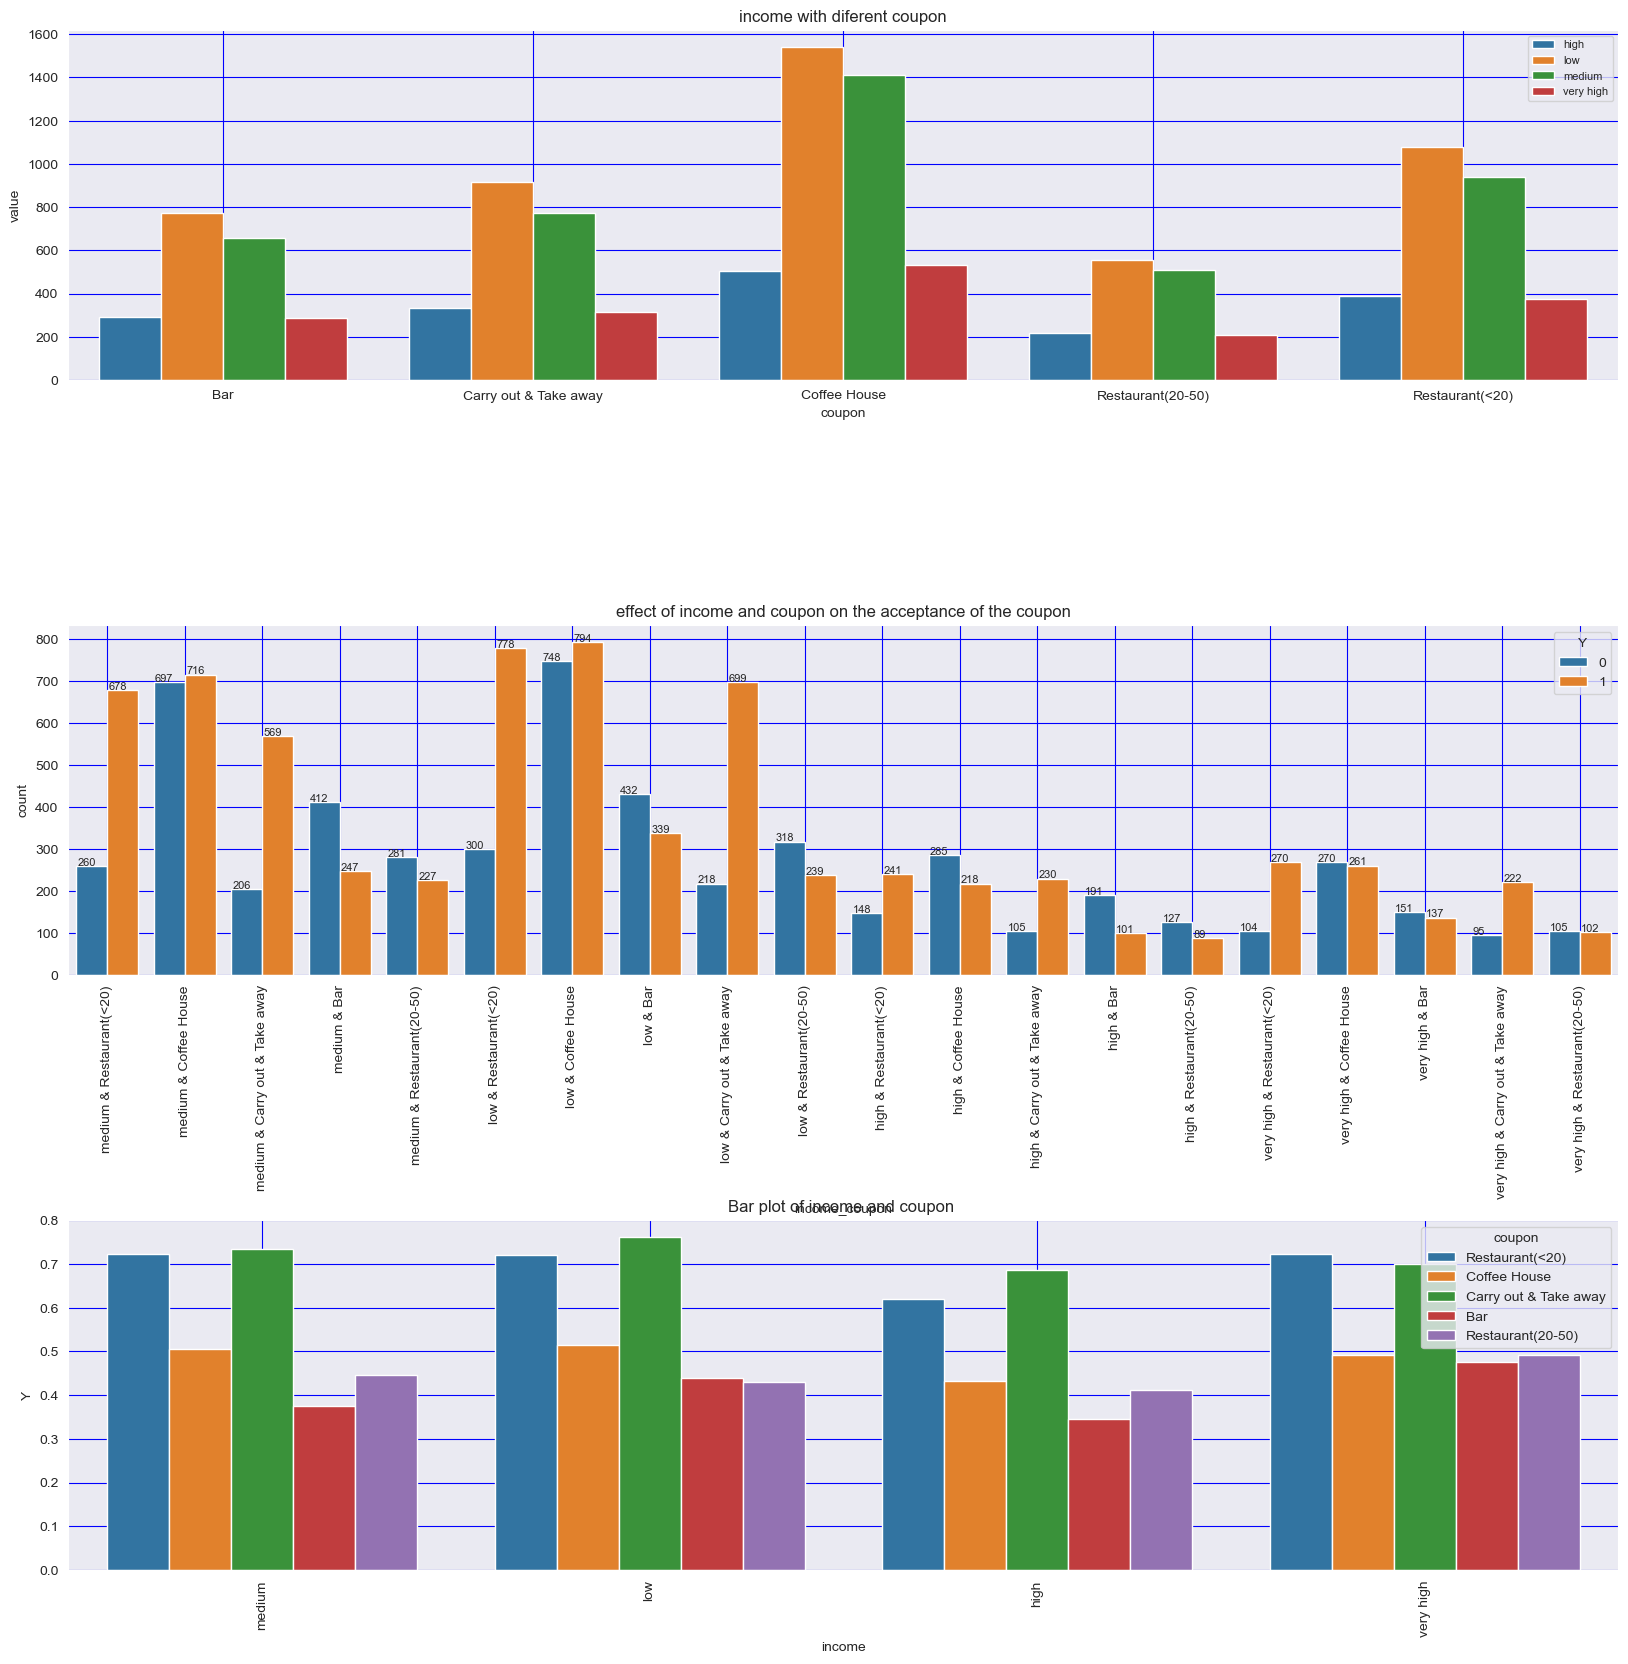

In [59]:
 bivariate_analysis('income','coupon',tempdf,'income','coupon','income with diferent coupon','upper right')

- Usually people dont accept the 'Bar' coupons
- People like carry away and coupons for places which are not far away
- As th time to travel increases the acceptance rate decreases

#### 9 Is there effect of maritalStatusand gender on the coupon acceptance rate ?

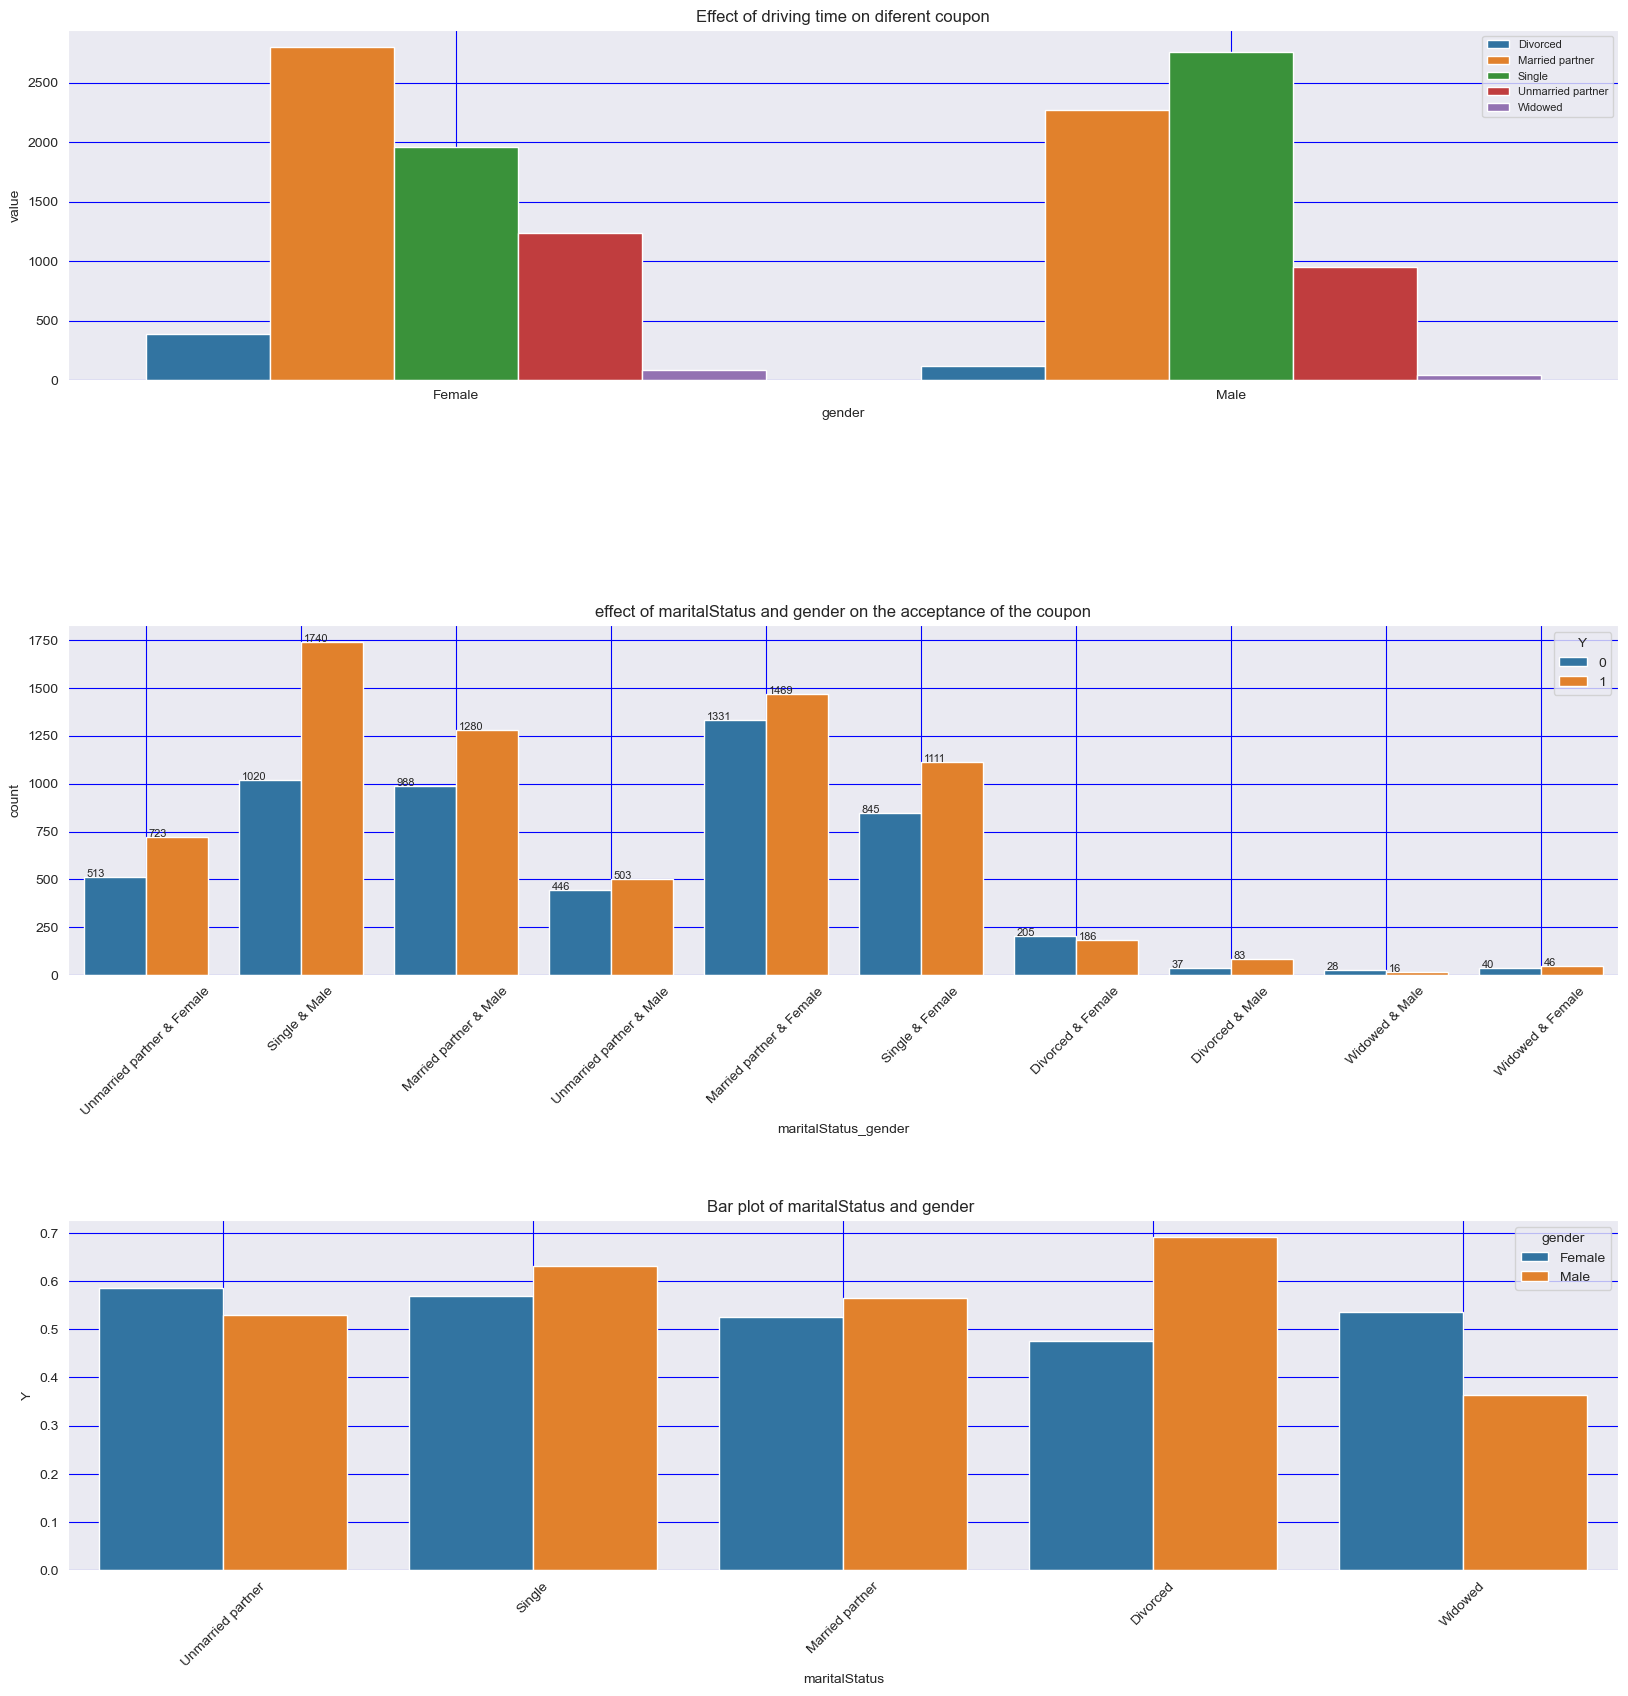

In [60]:
 bivariate_analysis('maritalStatus','gender',tempdf,'maritalStatus','gender','Effect of driving time on diferent coupon','upper right',rotation2=45)

- Single males and females are very likely to accept the couon
- Divorced males have higher acceptance rate than of divorced females
- Widowed and Unmarried Partner females are more likely to accept the coupon 


#### 10 Age and Coupons

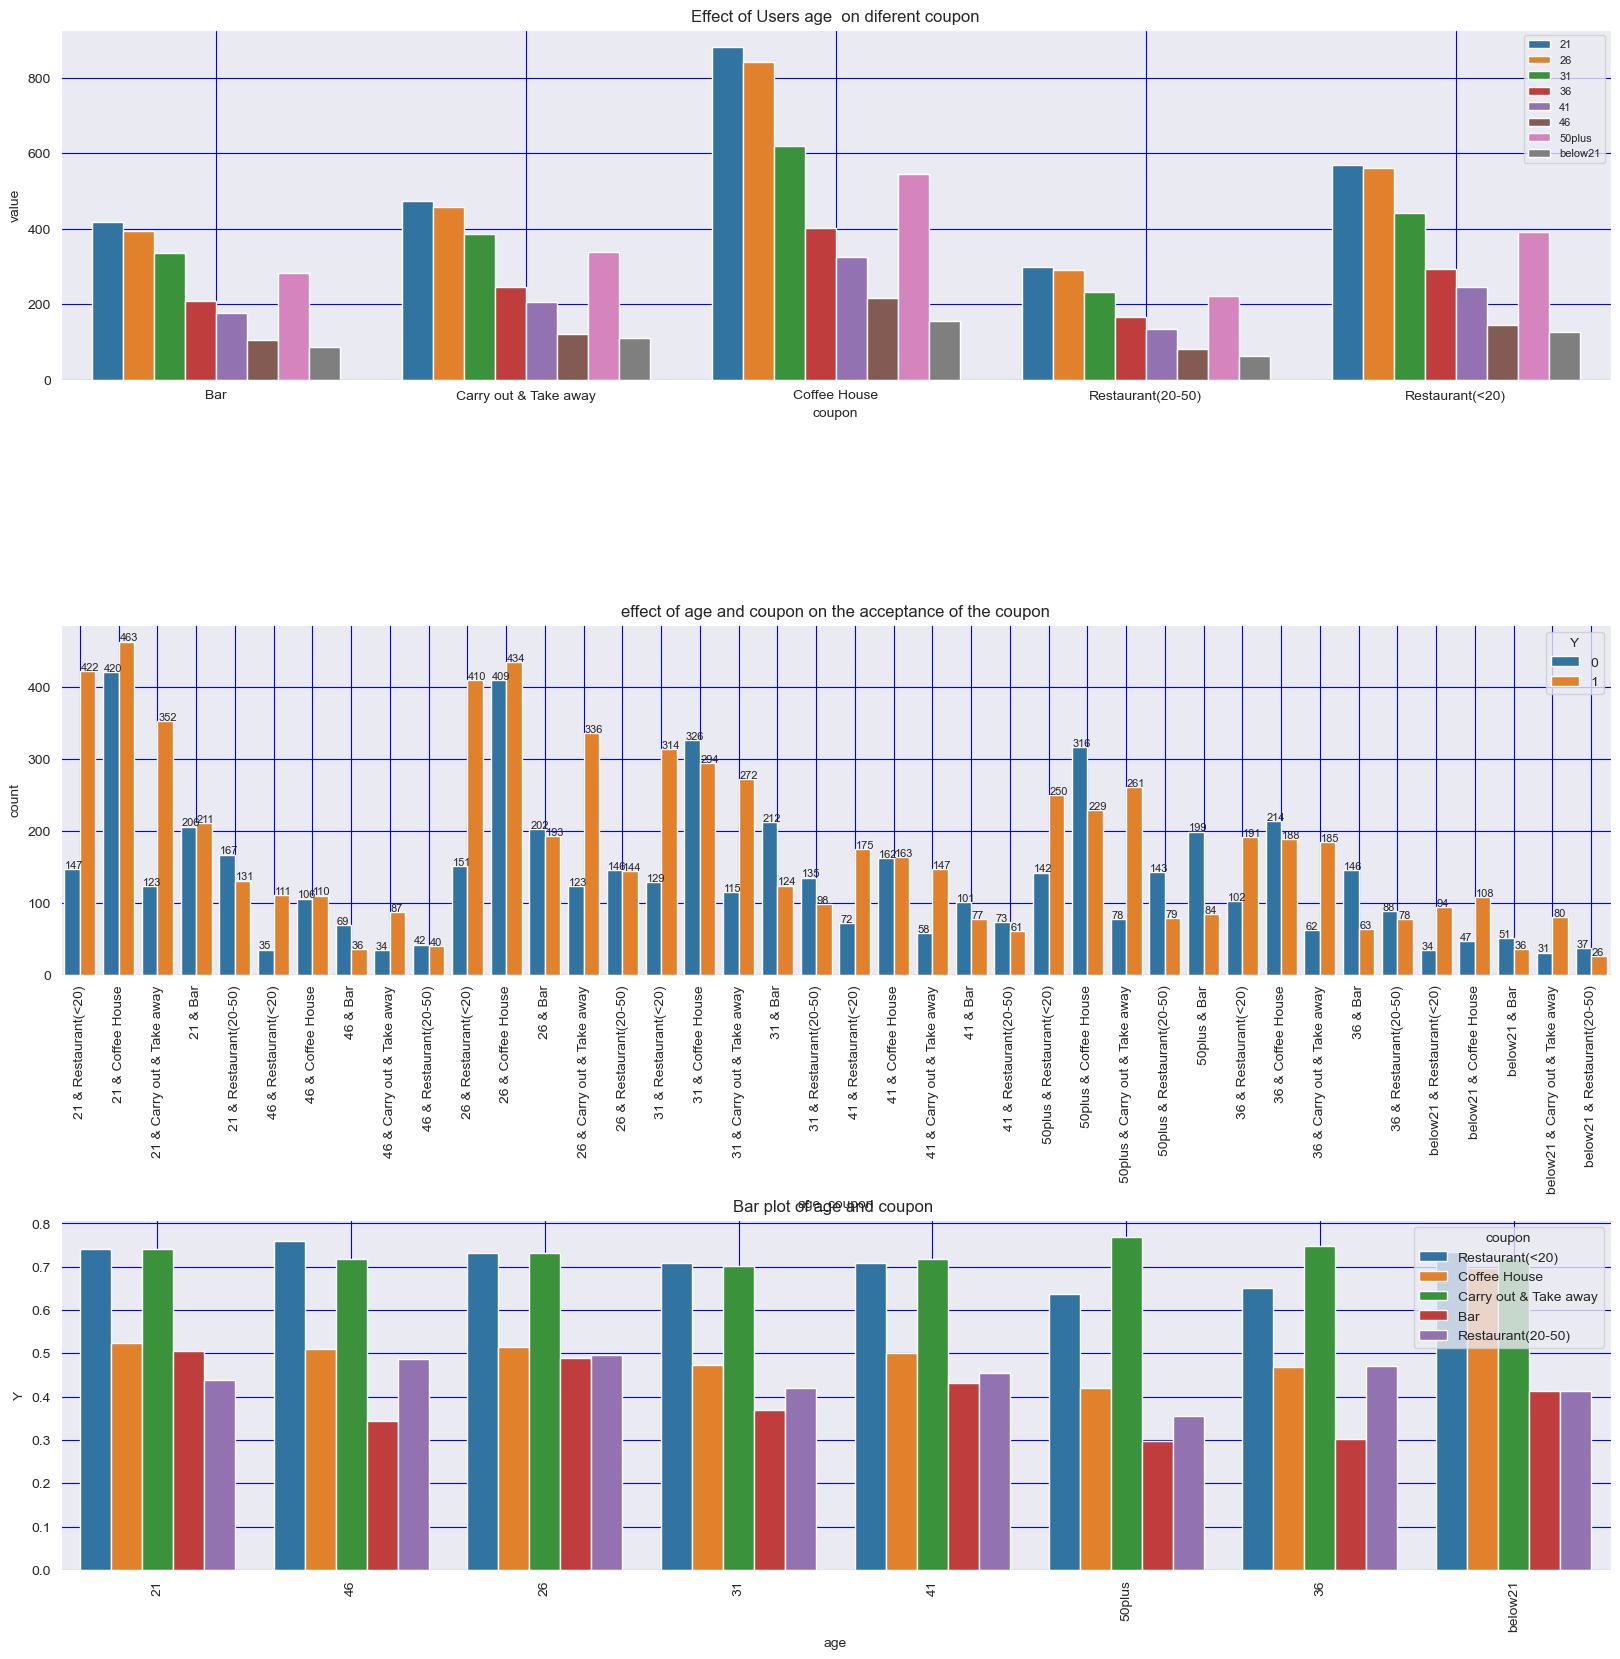

In [61]:
 bivariate_analysis('age','coupon',tempdf,'age','coupon','Effect of Users age  on diferent coupon','upper right',rotation2=90)

-  Reagardless of the Age , CarryAway coupons are very likey to be accepted
- Cheap Restaurants are also very likely to be accepted across all ages
- people below 21 really like theCoffeHouse coupon as comapred to the others
- For most age groups acceptance of 'Bar' and expensive restaurant is less than 50 percent

#### 11 Driving time and coupon

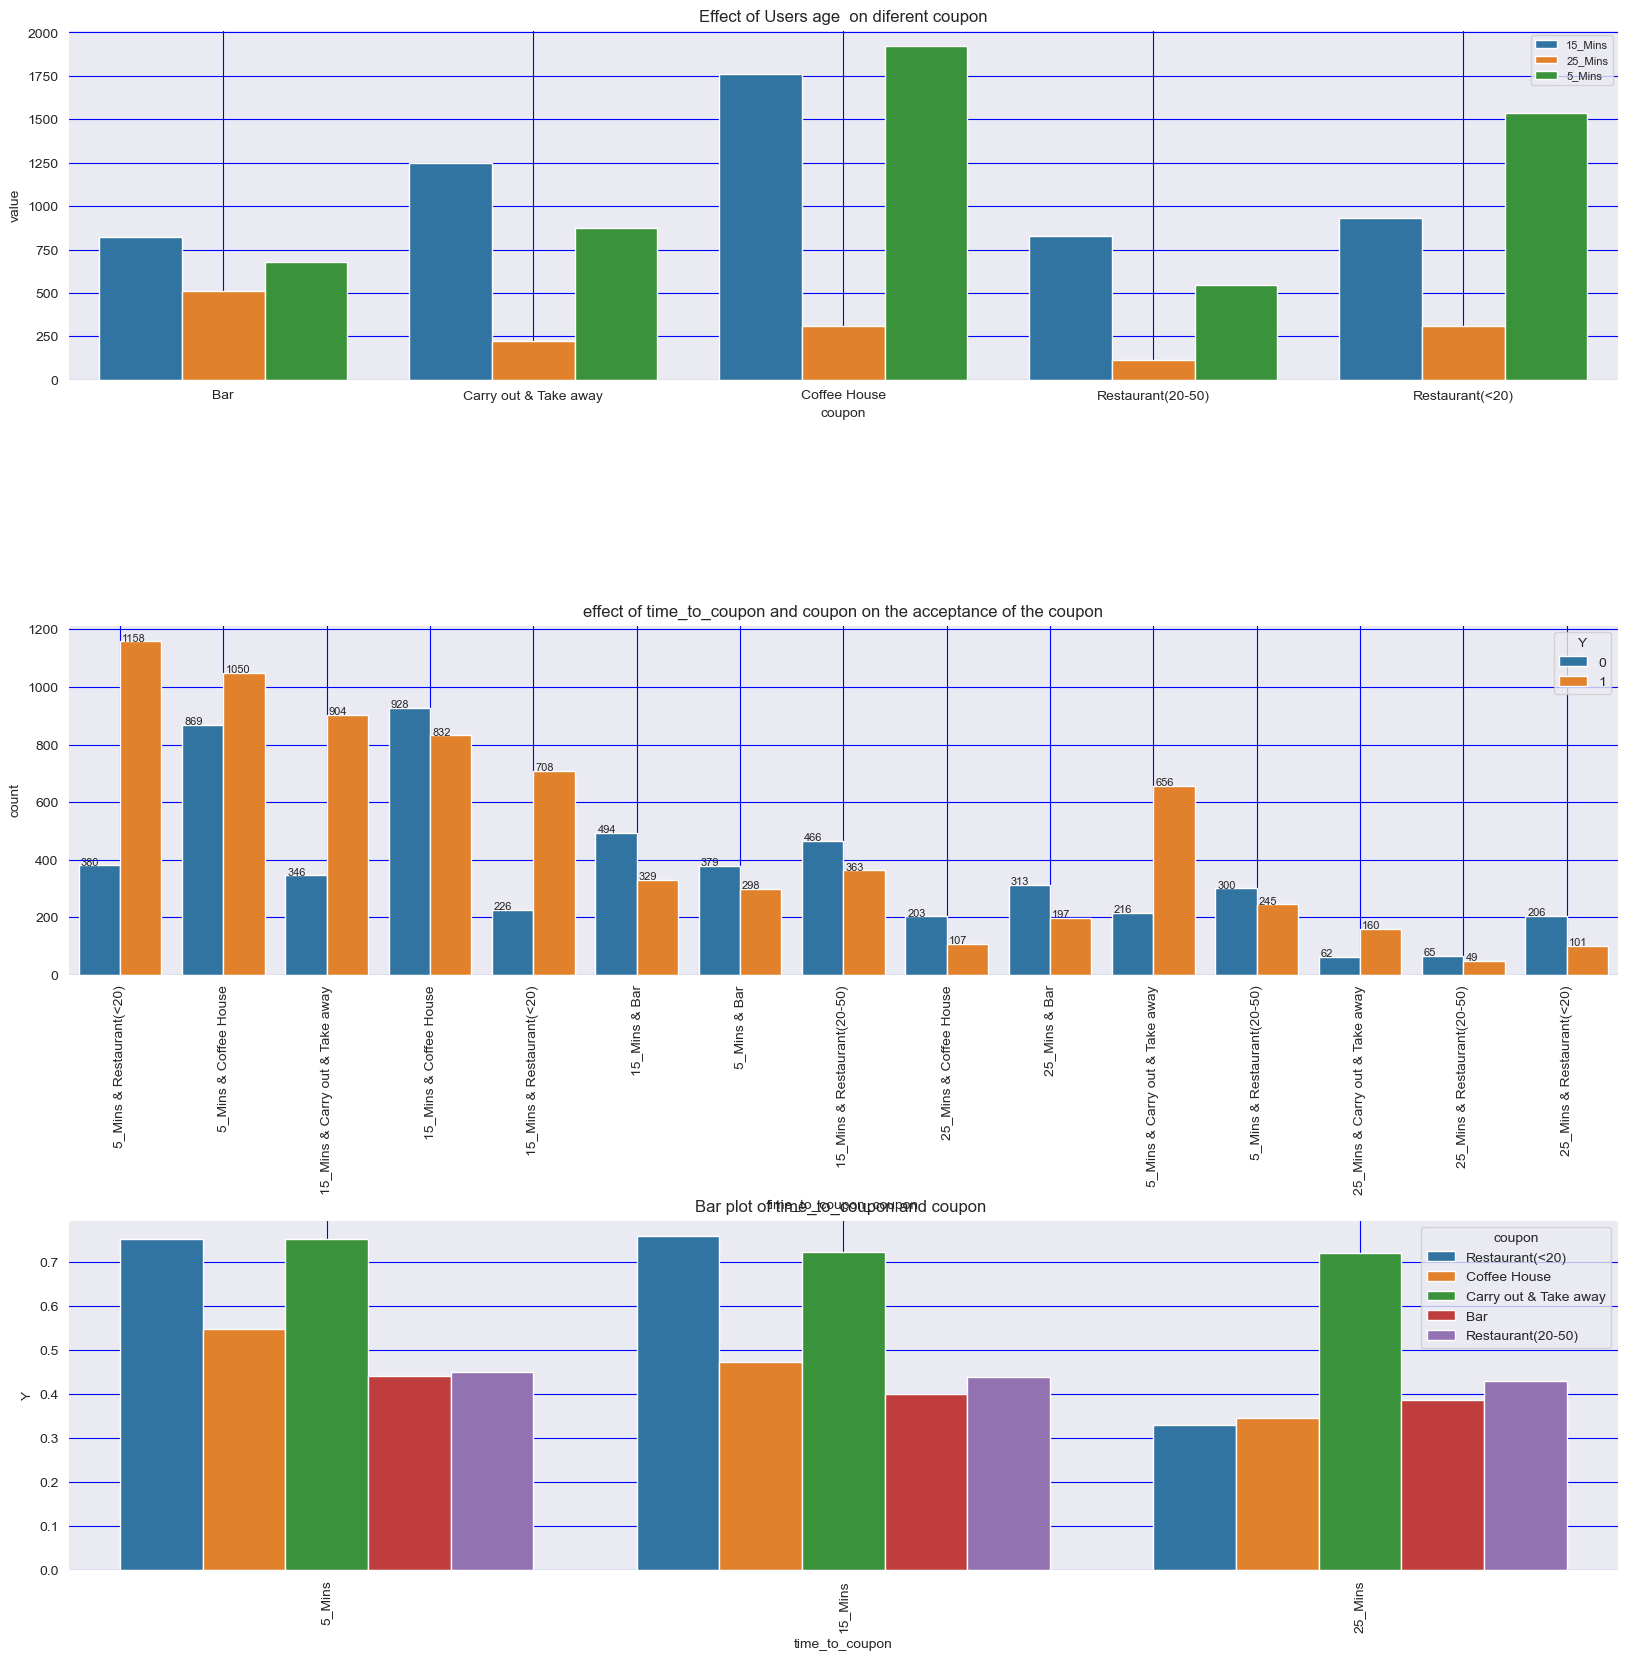

In [63]:
 bivariate_analysis('time_to_coupon','coupon',tempdf,'age','time_to_coupon','Effect of Users age  on diferent coupon','upper right',rotation2=90)

In [64]:
data.to_csv('Clean_data.csv')

In [67]:
tempdf.to_csv('temp_clean_data.csv')